In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import joblib

In [2]:
data = pd.read_csv('./data/low_temp_19_06.csv')
data.head(5)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed actual liquid flow, m3/h","gas_feed actual vapour flow, m3/h",gas_feed mass heat capacity,gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",...,17 mass heat capacity,17 vapour fraction,"17 molar flow, kgmole/h",17 Methane mass frac,17 Ethane mass frac,17 Propane mass frac,17 i-Butane mass frac,17 n-Butane mass frac,17 i-Pentane mass frac,17 n-Pentane mass frac
0,-16.0,4232.0,18878.0,23.886155,72.430533,15.214508,245.421431,2.559543,0.758989,0.219537,...,2.251392,0.005083,0.048132,5.404426e-02,0.036171,0.217006,0.180343,0.452925,0.024123,0.035387
1,1.0,4833.0,7853.0,23.778683,74.311097,5.086837,100.590515,2.656815,0.818161,0.091737,...,2.475215,0.000000,0.015413,3.027299e-02,0.077611,0.109804,0.516098,0.234971,0.014643,0.016601
2,-22.0,4414.0,7030.0,24.589672,90.075960,6.902782,71.142459,2.669121,0.680374,0.079415,...,3.285931,0.000258,0.014639,4.030112e-07,0.057266,0.234016,0.302420,0.376537,0.019800,0.009960
3,-3.0,4493.0,27213.0,22.271846,61.124750,14.281073,430.923204,2.575105,0.862006,0.339405,...,3.117985,0.000000,0.040468,7.377296e-03,0.017134,0.182255,0.258367,0.422353,0.058061,0.054453
4,-13.0,4845.0,15393.0,23.169794,79.132676,11.413371,183.108043,2.667372,0.785855,0.184543,...,2.299467,0.004158,0.035108,4.744479e-02,0.049843,0.185275,0.329214,0.311684,0.026514,0.050026


In [3]:
# Расчитываем дополнительные параметры
data['gas_feed molar flow, kgmole/h'] = data['gas_feed molar flow, kgmole/h'] * 3600

data['gas_feed vapour molar flow, kgmole/h'] = data['gas_feed vapour fraction'] * data['gas_feed molar flow, kgmole/h']
data['gas_feed liquid molar flow, kgmole/h'] = data['gas_feed molar flow, kgmole/h'] - data['gas_feed vapour molar flow, kgmole/h']

data['gas_feed Methane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed Methane mass frac']
data['gas_feed Ethane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed Ethane mass frac']
data['gas_feed Propane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed Propane mass frac']
data['gas_feed i-Butane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed i-Butane mass frac']
data['gas_feed n-Butane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed n-Butane mass frac']
data['gas_feed i-Pentane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed i-Pentane mass frac']
data['gas_feed n-Pentane mass flow, kg/h'] = data['gas_feed mass flow, kg/h'] * data['gas_feed n-Pentane mass frac']

data['gas_feed Methane molar flow, kgmole/h'] = data['gas_feed Methane mass flow, kg/h'] / 16.04
data['gas_feed Ethane molar flow, kgmole/h'] = data['gas_feed Ethane mass flow, kg/h'] / 30
data['gas_feed Propane molar flow, kgmole/h'] = data['gas_feed Propane mass flow, kg/h'] / 44
data['gas_feed i-Butane molar flow, kgmole/h'] = data['gas_feed i-Butane mass flow, kg/h'] / 58.12
data['gas_feed n-Butane molar flow, kgmole/h'] = data['gas_feed n-Butane mass flow, kg/h'] / 58.12
data['gas_feed i-Pentane molar flow, kgmole/h'] = data['gas_feed i-Pentane mass flow, kg/h'] / 72.15
data['gas_feed n-Pentane molar flow, kgmole/h'] = data['gas_feed n-Pentane mass flow, kg/h'] / 72.15

data['1 Methane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 Methane mass frac']
data['1 Ethane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 Ethane mass frac']
data['1 Propane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 Propane mass frac']
data['1 i-Butane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 i-Butane mass frac']
data['1 n-Butane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 n-Butane mass frac']
data['1 i-Pentane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 i-Pentane mass frac']
data['1 n-Pentane mass flow, kg/h'] = data['1 mass flow, kg/h'] * data['1 n-Pentane mass frac']

data['1 Methane molar flow, kgmole/h'] = data['1 Methane mass flow, kg/h'] / 16.04
data['1 Ethane molar flow, kgmole/h'] = data['1 Ethane mass flow, kg/h'] / 30
data['1 Propane molar flow, kgmole/h'] = data['1 Propane mass flow, kg/h'] / 44
data['1 i-Butane molar flow, kgmole/h'] = data['1 i-Butane mass flow, kg/h'] / 58.12
data['1 n-Butane molar flow, kgmole/h'] = data['1 n-Butane mass flow, kg/h'] / 58.12
data['1 i-Pentane molar flow, kgmole/h'] = data['1 i-Pentane mass flow, kg/h'] / 72.15
data['1 n-Pentane molar flow, kgmole/h'] = data['1 n-Pentane mass flow, kg/h'] / 72.15

data['16 Methane mass flow, kg/h'] = data['16 mass flow, kg/h'] * data['16 Methane mass frac']
data['16 Ethane mass flow, kg/h'] = data['16 mass flow, kg/h'] * data['16 Ethane mass frac']
data['16 Propane mass flow, kg/h'] = data['16 mass flow, kg/h'] * data['16 Propane mass frac']
data['16 i-Butane mass flow, kg/h'] = data['16 mass flow, kg/h'] * data['16 i-Butane mass frac']
data['16 n-Butane mass flow, kg/h'] = data['16 mass flow, kg/h'] * data['16 n-Butane mass frac']
data['16 i-Pentane mass flow, kg/h'] = data['16 mass flow, kg/h'] * data['16 i-Pentane mass frac']
data['16 n-Pentane mass flow, kg/h'] = data['16 mass flow, kg/h'] * data['16 n-Pentane mass frac']

data['16 Methane molar flow, kgmole/h'] = data['16 Methane mass flow, kg/h'] / 16.04
data['16 Ethane molar flow, kgmole/h'] = data['16 Ethane mass flow, kg/h'] / 30
data['16 Propane molar flow, kgmole/h'] = data['16 Propane mass flow, kg/h'] / 44
data['16 i-Butane molar flow, kgmole/h'] = data['16 i-Butane mass flow, kg/h'] / 58.12
data['16 n-Butane molar flow, kgmole/h'] = data['16 n-Butane mass flow, kg/h'] / 58.12
data['16 i-Pentane molar flow, kgmole/h'] = data['16 i-Pentane mass flow, kg/h'] / 72.15
data['16 n-Pentane molar flow, kgmole/h'] = data['16 n-Pentane mass flow, kg/h'] / 72.15

data['17 Methane mass flow, kg/h'] = data['17 mass flow, kg/h'] * data['17 Methane mass frac']
data['17 Ethane mass flow, kg/h'] = data['17 mass flow, kg/h'] * data['17 Ethane mass frac']
data['17 Propane mass flow, kg/h'] = data['17 mass flow, kg/h'] * data['17 Propane mass frac']
data['17 i-Butane mass flow, kg/h'] = data['17 mass flow, kg/h'] * data['17 i-Butane mass frac']
data['17 n-Butane mass flow, kg/h'] = data['17 mass flow, kg/h'] * data['17 n-Butane mass frac']
data['17 i-Pentane mass flow, kg/h'] = data['17 mass flow, kg/h'] * data['17 i-Pentane mass frac']
data['17 n-Pentane mass flow, kg/h'] = data['17 mass flow, kg/h'] * data['17 n-Pentane mass frac']

data['17 Methane molar flow, kgmole/h'] = data['17 Methane mass flow, kg/h'] / 16.04
data['17 Ethane molar flow, kgmole/h'] = data['17 Ethane mass flow, kg/h'] / 30
data['17 Propane molar flow, kgmole/h'] = data['17 Propane mass flow, kg/h'] / 44
data['17 i-Butane molar flow, kgmole/h'] = data['17 i-Butane mass flow, kg/h'] / 58.12
data['17 n-Butane molar flow, kgmole/h'] = data['17 n-Butane mass flow, kg/h'] / 58.12
data['17 i-Pentane molar flow, kgmole/h'] = data['17 i-Pentane mass flow, kg/h'] / 72.15
data['17 n-Pentane molar flow, kgmole/h'] = data['17 n-Pentane mass flow, kg/h'] / 72.15

In [76]:
def plot_scatter_with_ideal_line(y_pred, y_test):
    """
    Визуализирует диаграмму разброса с линией идеального соответствия для y_pred и y_test.
    
    Args:
    y_pred (array-like): Предсказанные значения модели.
    y_test (array-like): Истинные значения.

    """
    # Преобразуем y_test в массив numpy, если это pandas Series
    if isinstance(y_test, pd.Series):
        y_test = y_test.values
    
    # Создаем диаграмму разброса
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    
    # Добавляем линию идеального соответствия
    max_value = np.max([np.max(y_test), np.max(y_pred)])
    min_value = np.min([np.min(y_test), np.min(y_pred)])
    plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Идеальное соответствие')
    
    # Добавляем подписи и заголовок
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Диаграмма разброса: Истинные значения vs. Предсказанные значения')
    plt.legend()
    
    # Показываем график
    plt.show()


# Определяем плотность сырьевого газа

In [8]:
gas_feed_dens_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Mass density, kg/m3',
]]

In [9]:
gas_feed_dens_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,"gas_feed Mass density, kg/m3"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,719.365460,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,74.084199
std,10.275480,404.079523,7214.000778,2.113006,303.963663,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,18.272784
min,-25.000000,3500.000000,5000.000000,17.914715,164.014283,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,32.152684
25%,-17.000000,3861.000000,11270.000000,23.020770,459.266317,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,60.824100
50%,-9.000000,4214.000000,17512.000000,24.479015,714.255561,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,71.535329
75%,0.000000,4560.000000,23749.750000,25.973181,969.084648,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,84.574906
max,10.000000,4900.000000,30000.000000,31.365853,1617.505790,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,202.689706


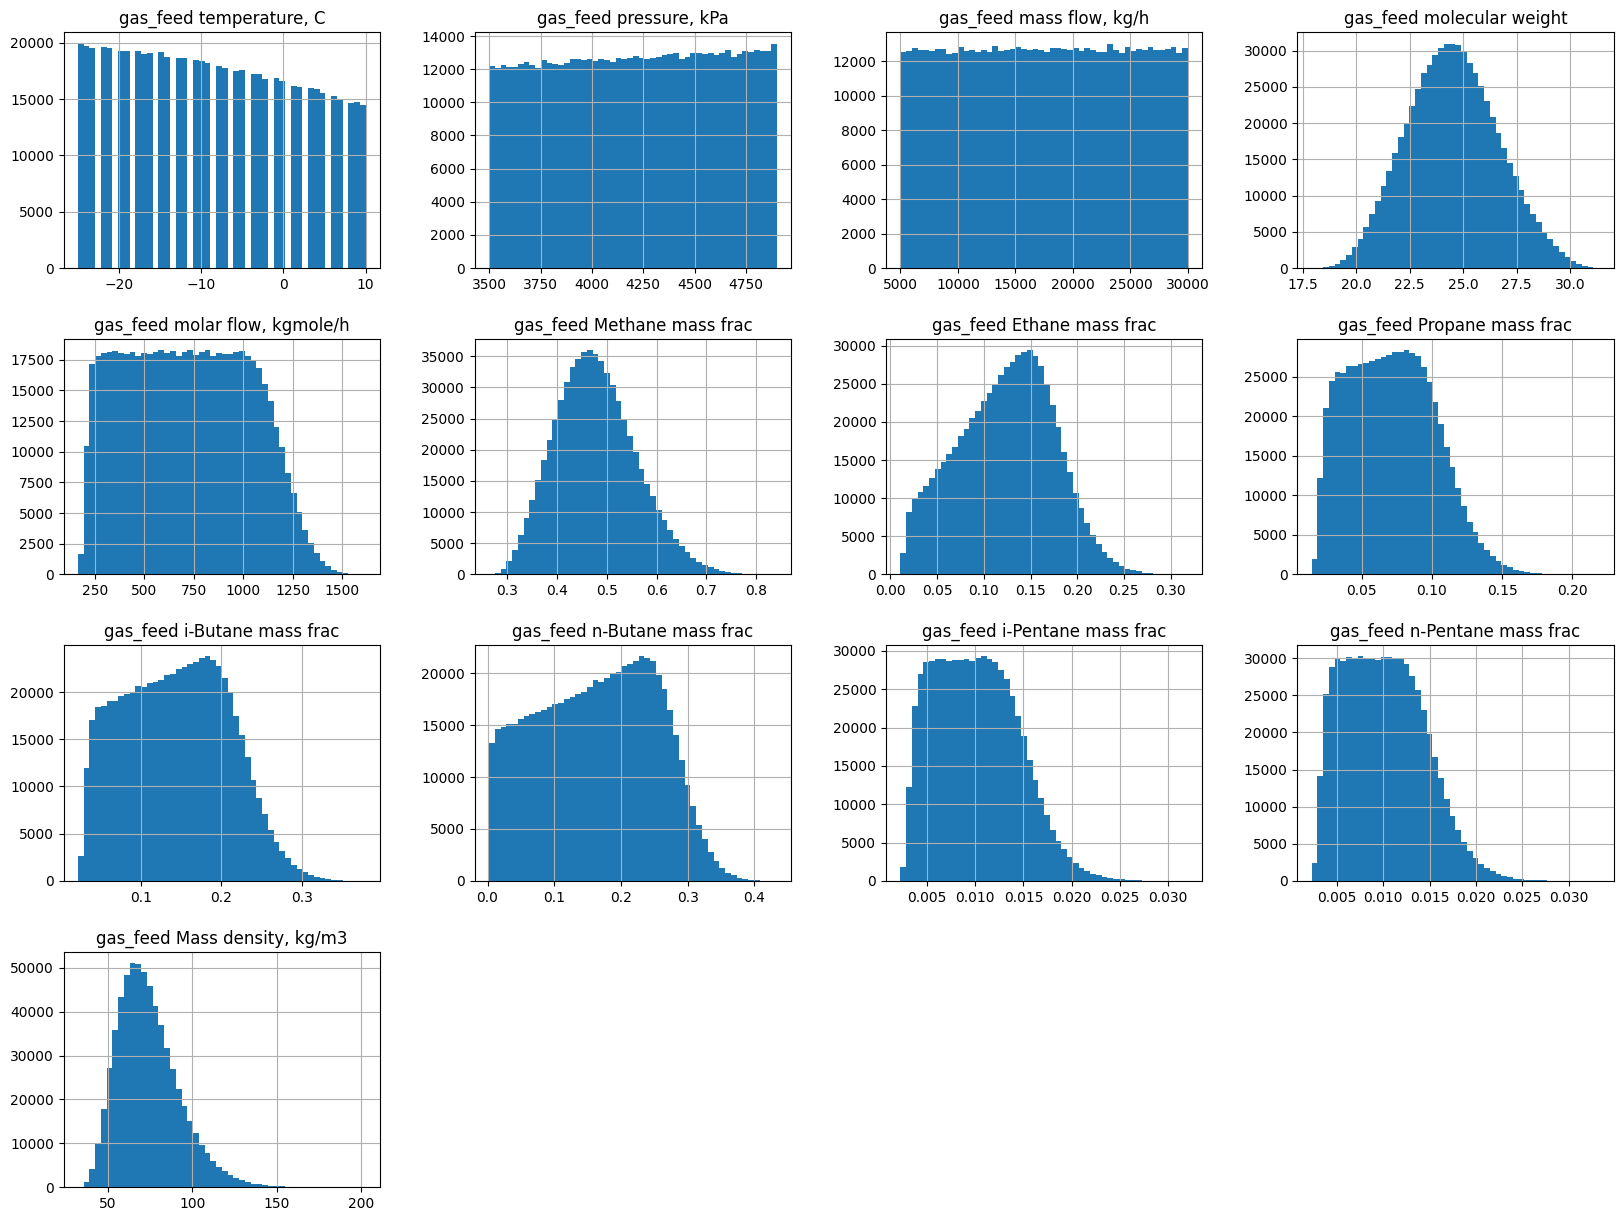

In [10]:
gas_feed_dens_data.hist(bins=50, figsize=(20, 15));

In [11]:
corr_matrix = gas_feed_dens_data.corr()

corr_matrix['gas_feed Mass density, kg/m3'].sort_values(ascending=False)

gas_feed Mass density, kg/m3     1.000000
gas_feed molecular weight        0.739884
gas_feed pressure, kPa           0.507707
gas_feed n-Butane mass frac      0.470699
gas_feed i-Butane mass frac      0.259472
gas_feed Ethane mass frac        0.012255
gas_feed Propane mass frac       0.011486
gas_feed mass flow, kg/h         0.001205
gas_feed n-Pentane mass frac    -0.103936
gas_feed i-Pentane mass frac    -0.104715
gas_feed molar flow, kgmole/h   -0.148174
gas_feed temperature, C         -0.365481
gas_feed Methane mass frac      -0.713992
Name: gas_feed Mass density, kg/m3, dtype: float64

In [12]:
gas_dens_mini_data = gas_feed_dens_data.sample(frac=0.5)

In [15]:
## Тестовая и обучающая выборки
X = gas_dens_mini_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_dens_mini_data[[
    'gas_feed Mass density, kg/m3',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/gas_feed_dens_transformer.pkl')

X_train_normal.shape, y_train.shape

((253300, 12), (253300, 1))

In [118]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_0 = gas_feed_dens_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.7367 - mae: 1.7367
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2469 - mae: 0.2469
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2081 - mae: 0.2081
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1871 - mae: 0.1871
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1770 - mae: 0.1770
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1657 - mae: 0.1657
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1484 - mae: 0.1484
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1354 - mae: 0.1354
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1307 - mae: 0.1307
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1249 - mae: 0.1249
Epoch 11/20
7916/7916 [======

In [119]:
gas_feed_dens_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 962us/step - loss: 0.0806 - mae: 0.0806


[0.08064509183168411, 0.08064509183168411]

In [120]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_1 = gas_feed_dens_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 11s 1ms/step - loss: 1.3465 - mae: 1.3465
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2769 - mae: 0.2769
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2540 - mae: 0.2540
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2468 - mae: 0.2468
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2434 - mae: 0.2434
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2264 - mae: 0.2264
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2225 - mae: 0.2225
Epoch 8/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.2187 - mae: 0.2187
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2137 - mae: 0.2137
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.2074 - mae: 0.2074
Epoch 11/20
7916/79

In [121]:
gas_feed_dens_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 944us/step - loss: 0.0702 - mae: 0.0702


[0.07019557803869247, 0.07019557803869247]

In [122]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_2 = gas_feed_dens_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 1.0436 - mae: 1.0436
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.5855 - mae: 0.5855
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.5125 - mae: 0.5125
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.4530 - mae: 0.4530
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4146 - mae: 0.4146
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3992 - mae: 0.3992
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3689 - mae: 0.3689
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3631 - mae: 0.3631
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3261 - mae: 0.3261
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3272 - mae: 0.3272
Epoch 11/20
7916/7916 [==

In [123]:
gas_feed_dens_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 896us/step - loss: 0.1224 - mae: 0.1224


[0.1224314272403717, 0.1224314272403717]

In [124]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_3 = gas_feed_dens_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 10.7852 - mae: 10.7852
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.4334 - mae: 1.4334
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.6514 - mae: 0.6514
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4315 - mae: 0.4315
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.3305 - mae: 0.3305
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2617 - mae: 0.2617
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2176 - mae: 0.2176
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1939 - mae: 0.1939
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1801 - mae: 0.1801
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1690 - mae: 0.1690
Epoch 11/20
7916/7916 [

In [125]:
gas_feed_dens_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 909us/step - loss: 0.1187 - mae: 0.1187


[0.11871270090341568, 0.11871270090341568]

In [126]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_4 = gas_feed_dens_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 2.1909 - mae: 2.1909
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3092 - mae: 0.3092
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2542 - mae: 0.2542
Epoch 4/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2329 - mae: 0.2329
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2236 - mae: 0.2236
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2169 - mae: 0.2169
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2163 - mae: 0.2163
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2152 - mae: 0.2152
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2134 - mae: 0.2134
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2100 - mae: 0.2100
Epoch 11/20
7916/7916 [=

In [127]:
gas_feed_dens_model_4.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 863us/step - loss: 0.1812 - mae: 0.1812


[0.18116572499275208, 0.18116572499275208]

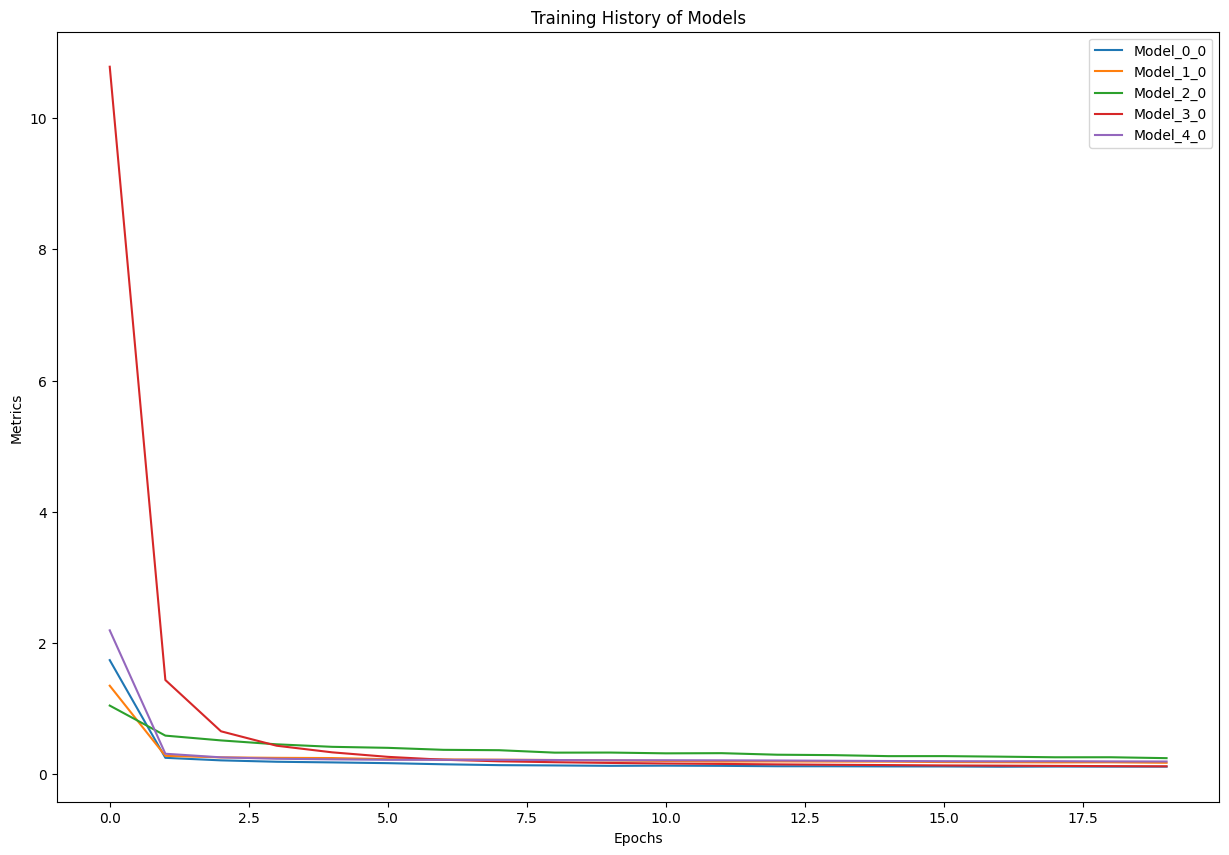

In [128]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(gas_feed_dens_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(gas_feed_dens_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(gas_feed_dens_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(gas_feed_dens_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(gas_feed_dens_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения плотности сырьевого потока

In [129]:
## Тестовая и обучающая выборки
X = gas_feed_dens_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_dens_data[[
    'gas_feed Mass density, kg/m3',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 12), (506600, 1))

In [130]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history = gas_feed_dens_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.9799 - mae: 0.9799
Epoch 2/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.2072 - mae: 0.2072
Epoch 3/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1943 - mae: 0.1943
Epoch 4/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.1725 - mae: 0.1725
Epoch 5/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1475 - mae: 0.1475
Epoch 6/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1363 - mae: 0.1363
Epoch 7/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1299 - mae: 0.1299
Epoch 8/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1268 - mae: 0.1268
Epoch 9/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1217 - mae: 0.1217
Epoch 10/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.1198 - mae: 0.1198

In [131]:
gas_feed_dens_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 874us/step - loss: 0.0652 - mae: 0.0652


[0.06520134955644608, 0.06520134955644608]

In [132]:
y_pred = gas_feed_dens_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 743us/step


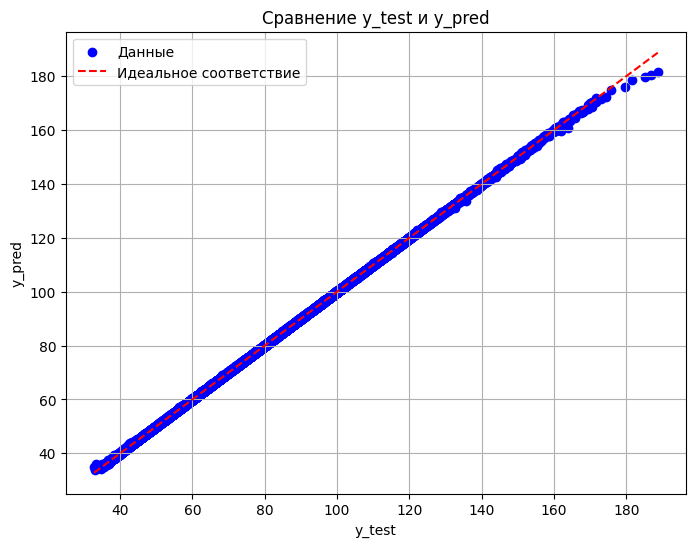

In [133]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
X_test

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac
340638,-10.0,3540.0,16899.0,26.585286,635.652378,0.394813,0.150543,0.047168,0.106947,0.276140,0.011994,0.012395
314613,-21.0,3790.0,24089.0,23.603790,1020.556431,0.483130,0.198344,0.045978,0.185918,0.063712,0.005943,0.016975
219439,5.0,4817.0,18631.0,26.997583,690.098817,0.375571,0.175129,0.023803,0.032971,0.376260,0.007249,0.009018
374434,-6.0,4064.0,14592.0,26.462820,551.415162,0.436700,0.022114,0.111973,0.142956,0.259062,0.013591,0.013606
313146,-7.0,4728.0,10758.0,24.838100,433.124916,0.442039,0.185710,0.039654,0.283748,0.021875,0.006065,0.020908
...,...,...,...,...,...,...,...,...,...,...,...,...
239029,-9.0,3620.0,10158.0,27.353418,371.361269,0.376289,0.129417,0.070583,0.135993,0.260531,0.014595,0.012593
417657,10.0,4873.0,25420.0,21.950612,1158.054292,0.554916,0.202507,0.022506,0.090826,0.110154,0.007720,0.011371
162767,-9.0,3681.0,20358.0,24.790149,821.213306,0.458476,0.126134,0.081317,0.186522,0.139816,0.003728,0.004006
343861,3.0,4545.0,12090.0,22.807115,530.097739,0.519934,0.195279,0.022154,0.051258,0.188030,0.011978,0.011366


In [148]:
X_test.iloc[3]

gas_feed temperature, C             -6.000000
gas_feed pressure, kPa            4064.000000
gas_feed mass flow, kg/h         14592.000000
gas_feed molecular weight           26.462820
gas_feed molar flow, kgmole/h      551.415162
gas_feed Methane mass frac           0.436700
gas_feed Ethane mass frac            0.022114
gas_feed Propane mass frac           0.111973
gas_feed i-Butane mass frac          0.142956
gas_feed n-Butane mass frac          0.259062
gas_feed i-Pentane mass frac         0.013591
gas_feed n-Pentane mass frac         0.013606
Name: 374434, dtype: float64

In [149]:
y_test

,"gas_feed Mass density, kg/m3"
340638,69.584825
314613,66.185900
219439,94.822776
374434,77.162589
313146,86.363934
...,...
239029,75.632742
417657,60.264275
162767,62.468973
343861,62.678720


In [157]:
test_data = pd.DataFrame({
    'gas_feed temperature, C': [3],
    'gas_feed pressure, kPa': [3500],
    'gas_feed mass flow, kg/h': [25000], 
    'gas_feed molecular weight': [30.53],
    'gas_feed molar flow, kgmole/h': [819.0],
    'gas_feed Methane mass frac': [0.2792],
    'gas_feed Ethane mass frac': [0.1236],
    'gas_feed Propane mass frac': [0.1820],
    'gas_feed i-Butane mass frac': [0.2253],
    'gas_feed n-Butane mass frac': [0.1820],
    'gas_feed i-Pentane mass frac': [0.0056],
    'gas_feed n-Pentane mass frac': [0.0023]
}, index=[0])

# test_arr = np.array(test_data)

# min_val = np.min(test_arr)
# max_val = np.max(test_arr)

# test_norm = (test_arr - min_val) / (max_val - min_val)
# test_norm

In [158]:
test_data_norm = ct.transform(test_data)
test_data_norm

array([[8.00000000e-01, 0.00000000e+00, 8.00000000e-01, 9.37860076e-01,
        4.50153197e-01, 2.43160974e-02, 3.66695278e-01, 8.18371963e-01,
        5.69352586e-01, 4.22396581e-01, 1.12530183e-01, 7.00748505e-04]])

In [159]:
dens = gas_feed_dens_model.predict(test_data_norm)
dens[0][0]

1/1 [==============================] - 0s 19ms/step


88.66691

In [156]:
gas_feed_dens_model.save('./models/low_temp_dist_19_06/gas_feed_dens_model.h5')

# Определяем мольную долю пара в сырьевом потоке

In [26]:
gas_feed_vap_fr_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour fraction',
]]

In [27]:
gas_feed_vap_fr_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,gas_feed vapour fraction
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,719.365460,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,0.763452
std,10.275480,404.079523,7214.000778,2.113006,18.272784,303.963663,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,0.104859
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,164.014283,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,0.312539
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,459.266317,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,0.692753
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,714.255561,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,0.766630
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,969.084648,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,0.838392
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1617.505790,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,1.000000


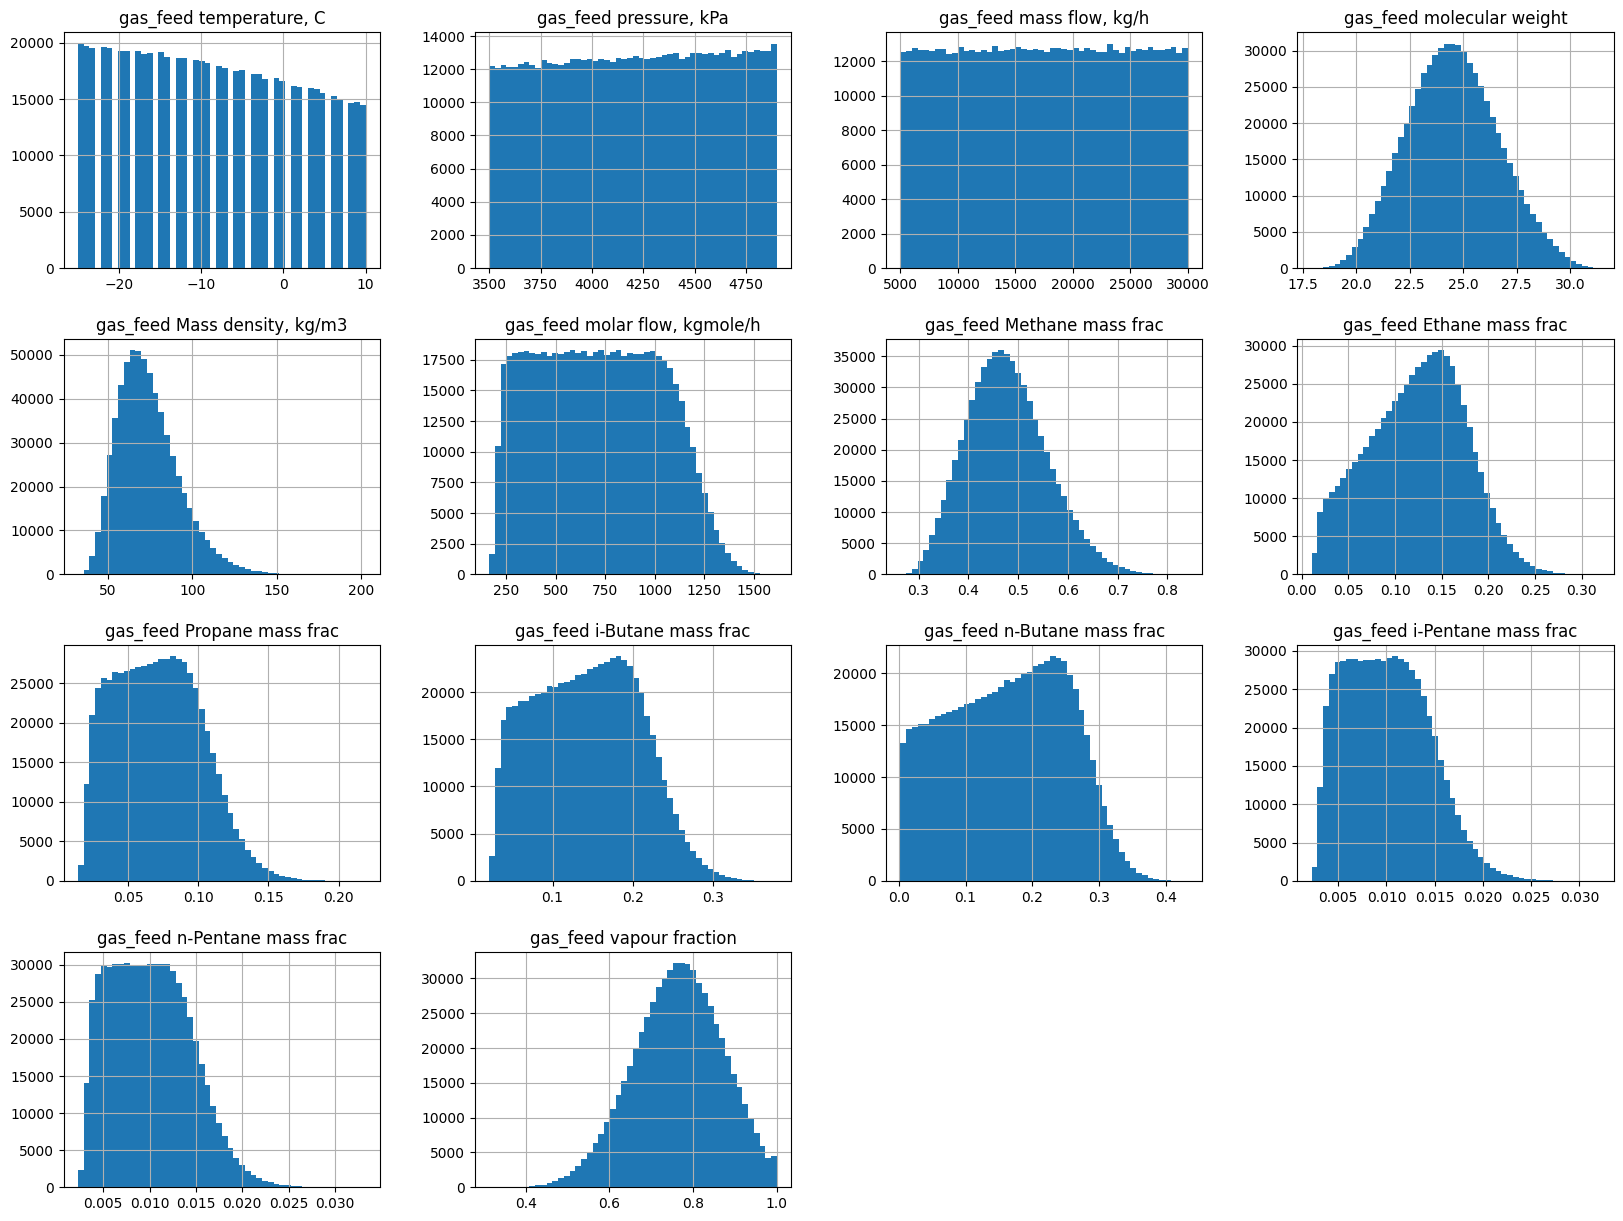

In [28]:
gas_feed_vap_fr_data.hist(bins=50, figsize=(20, 15));

In [29]:
corr_matrix = gas_feed_vap_fr_data.corr()

corr_matrix['gas_feed vapour fraction'].sort_values(ascending=False)

gas_feed vapour fraction         1.000000
gas_feed Methane mass frac       0.859235
gas_feed temperature, C          0.387047
gas_feed molar flow, kgmole/h    0.182043
gas_feed i-Pentane mass frac     0.133693
gas_feed n-Pentane mass frac     0.132885
gas_feed Ethane mass frac        0.054279
gas_feed Propane mass frac       0.001568
gas_feed mass flow, kg/h        -0.001075
gas_feed pressure, kPa          -0.138282
gas_feed i-Butane mass frac     -0.314929
gas_feed n-Butane mass frac     -0.611127
gas_feed molecular weight       -0.895929
gas_feed Mass density, kg/m3    -0.906108
Name: gas_feed vapour fraction, dtype: float64

In [30]:
gas_feed_vap_fr_data_mini = gas_feed_vap_fr_data.sample(frac=0.5)
gas_feed_vap_fr_data_mini.head(10)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,gas_feed vapour fraction
166727,-9.0,3707.0,9413.0,23.902645,58.942986,393.805788,0.475312,0.171456,0.084122,0.144929,0.115003,0.003168,0.006010,0.809050
628263,-8.0,4560.0,23338.0,22.515598,66.861220,1036.525883,0.555356,0.116364,0.059142,0.195873,0.059916,0.007811,0.005538,0.847704
120526,-11.0,3646.0,17076.0,25.007365,63.946145,682.838839,0.457043,0.090682,0.145280,0.221033,0.058285,0.008932,0.018746,0.751957
153110,-10.0,3829.0,22929.0,28.051727,88.684573,817.382825,0.344544,0.171405,0.037327,0.157024,0.271649,0.014559,0.003492,0.614599
477028,-15.0,4181.0,28388.0,23.204476,68.226638,1223.384681,0.513838,0.139340,0.098156,0.191093,0.036099,0.005399,0.016075,0.798977
432620,-18.0,4731.0,7574.0,26.265421,109.817579,288.363932,0.404818,0.141910,0.070751,0.167678,0.195264,0.010871,0.008708,0.608571
61734,2.0,4100.0,19131.0,27.070646,77.704605,706.706433,0.399723,0.081626,0.084494,0.178990,0.232556,0.010993,0.011617,0.700729
388218,10.0,3980.0,29497.0,27.067545,70.934605,1089.755286,0.373694,0.166841,0.043648,0.122498,0.281059,0.006276,0.005985,0.740340
531308,-20.0,3605.0,24525.0,24.817279,67.200360,988.222777,0.454603,0.150576,0.038549,0.158611,0.181686,0.007590,0.008386,0.730363
129695,-16.0,4111.0,24619.0,23.692805,69.909586,1039.091818,0.505827,0.094639,0.135632,0.084179,0.153975,0.018990,0.006758,0.768584


In [31]:
## Тестовая и обучающая выборки
X = gas_feed_vap_fr_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_vap_fr_data_mini[[
    'gas_feed vapour fraction',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/gas_feed_vap_fr_transformer.pkl')

X_train_normal.shape, y_train.shape

((253300, 13), (253300, 1))

In [174]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history_0 = gas_feed_vap_fr_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0083 - mae: 0.0083
Epoch 2/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0021 - mae: 0.0021
Epoch 3/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 4/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0018 - mae: 0.0018
Epoch 5/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0013 - mae: 0.0013
Epoch 11/20
7916/7916 [=====

In [175]:
gas_feed_vap_fr_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 938us/step - loss: 9.6222e-04 - mae: 9.6222e-04


[0.0009622150682844222, 0.0009622150682844222]

In [176]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history_1 = gas_feed_vap_fr_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 0.0081 - mae: 0.0081
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0024 - mae: 0.0024
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0021 - mae: 0.0021
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0018 - mae: 0.0018
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 11/20
7916/79

In [177]:
gas_feed_vap_fr_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 6.9641e-04 - mae: 6.9641e-04


[0.0006964107742533088, 0.0006964107742533088]

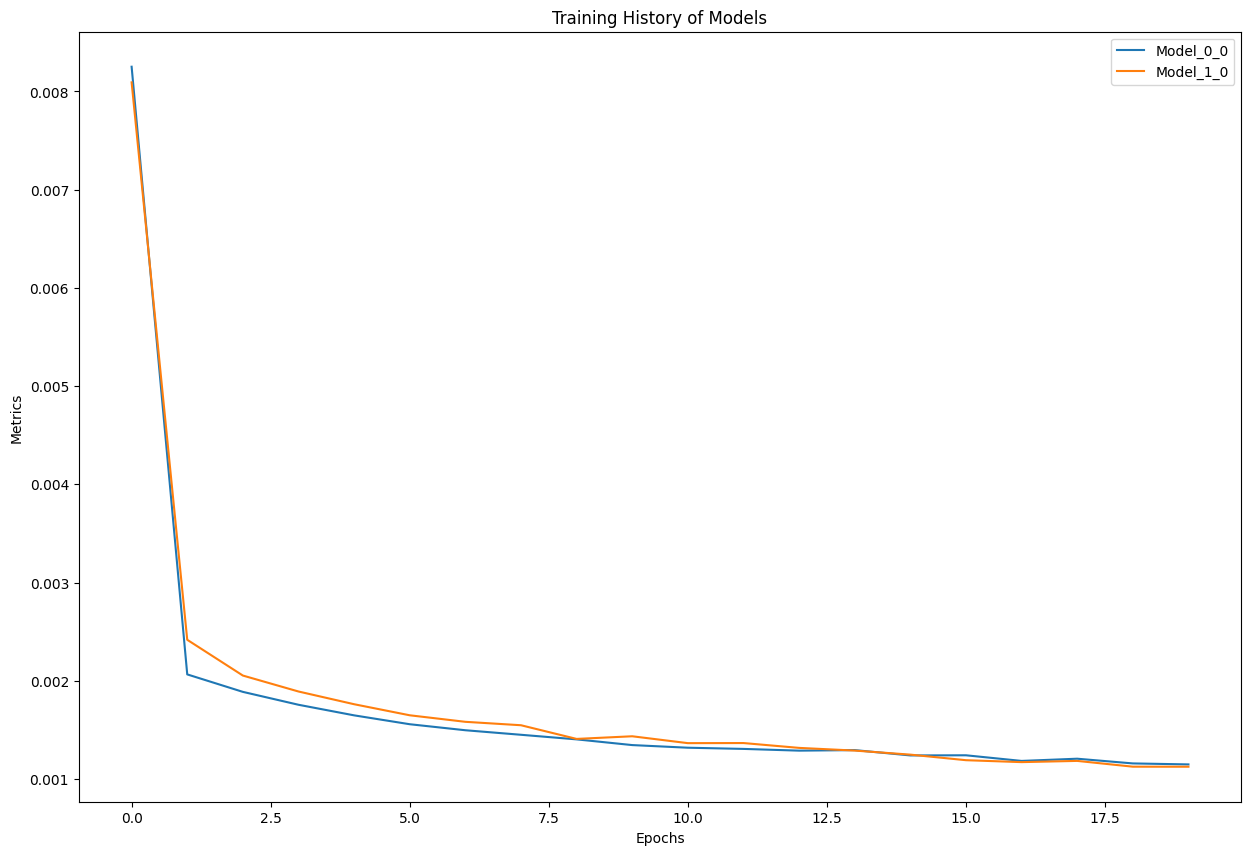

In [178]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(gas_feed_vap_fr_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(gas_feed_vap_fr_history_1.history['loss']).add_prefix('Model_1_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения доли пара

In [214]:
## Тестовая и обучающая выборки
X = gas_feed_vap_fr_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_feed_vap_fr_data[[
    'gas_feed vapour fraction',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 13), (506600, 1))

In [180]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_vap_fr_model = tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_vap_fr_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_vap_fr_history = gas_feed_vap_fr_model.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0048 - mae: 0.0048
Epoch 2/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0019 - mae: 0.0019
Epoch 3/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0016 - mae: 0.0016
Epoch 4/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0015 - mae: 0.0015
Epoch 5/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0014 - mae: 0.0014
Epoch 6/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0013 - mae: 0.0013
Epoch 7/20
15832/15832 [==============================] - 17s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 8/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 9/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0012 - mae: 0.0012
Epoch 10/20
15832/15832 [==============================] - 18s 1ms/step - loss: 0.0011 - mae: 0.0011

In [181]:
gas_feed_vap_fr_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 907us/step - loss: 6.1636e-04 - mae: 6.1636e-04


[0.0006163616781122983, 0.0006163616781122983]

In [183]:
y_pred = gas_feed_vap_fr_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 751us/step


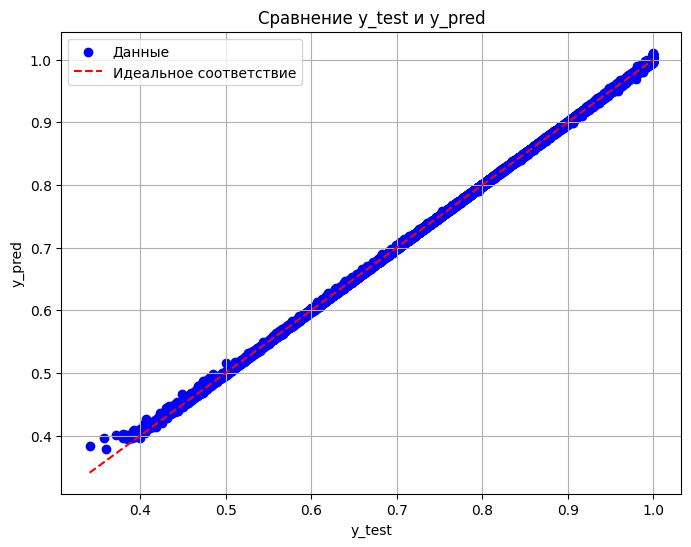

In [184]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [218]:
test_data = pd.DataFrame({
    'gas_feed temperature, C': [-10],
    'gas_feed pressure, kPa': [4000],
    'gas_feed mass flow, kg/h': [25000], 
    'gas_feed molecular weight': [30.53],
    'gas_feed Mass density, kg/m3': [123.6],
    'gas_feed molar flow, kgmole/h': [819.0],
    'gas_feed Methane mass frac': [0.2792],
    'gas_feed Ethane mass frac': [0.1236],
    'gas_feed Propane mass frac': [0.1820],
    'gas_feed i-Butane mass frac': [0.2253],
    'gas_feed n-Butane mass frac': [0.1820],
    'gas_feed i-Pentane mass frac': [0.0056],
    'gas_feed n-Pentane mass frac': [0.0023]
}, index=[0])

In [219]:
test_data_norm = ct.transform(test_data)
test_data_norm

array([[4.28571429e-01, 3.57142857e-01, 8.00000000e-01, 9.37860076e-01,
        5.36231459e-01, 4.50153197e-01, 2.43160974e-02, 3.66695278e-01,
        8.18371963e-01, 5.69352586e-01, 4.22396581e-01, 1.12530183e-01,
        7.00748505e-04]])

In [220]:
vap_fr = gas_feed_vap_fr_model.predict(test_data_norm)
vap_fr[0][0]

1/1 [==============================] - 0s 22ms/step


0.46335655

In [221]:
gas_feed_vap_fr_model.save('./models/low_temp_dist_19_06/gas_feed_vap_fr_model.h5')

# Определение массового расхода пара из сепаратора

In [34]:
sep_vap_mass_flow_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction', '1 mass flow, kg/h'
]]

In [35]:
sep_vap_mass_flow_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h","gas_feed vapour molar flow, kgmole/h","gas_feed liquid molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,...,"gas_feed n-Pentane mass flow, kg/h","gas_feed Methane molar flow, kgmole/h","gas_feed Ethane molar flow, kgmole/h","gas_feed Propane molar flow, kgmole/h","gas_feed i-Butane molar flow, kgmole/h","gas_feed n-Butane molar flow, kgmole/h","gas_feed i-Pentane molar flow, kgmole/h","gas_feed n-Pentane molar flow, kgmole/h",gas_feed vapour fraction,"1 mass flow, kg/h"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,...,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,719.365460,555.003651,164.361809,0.478100,0.123451,...,177.089787,521.856793,72.068694,28.425303,43.131686,49.303638,2.455704,2.454467,0.763452,10712.431423
std,10.275480,404.079523,7214.000778,2.113006,18.272784,303.963663,263.121333,95.856721,0.080897,0.051093,...,109.035376,235.191165,43.877957,17.573898,27.483898,34.884778,1.511052,1.511232,0.104859,5162.592892
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,164.014283,56.688257,0.000000,0.263626,0.010702,...,12.704687,89.412526,2.079377,1.909704,2.064457,0.251074,0.173227,0.176087,0.312539,1034.439396
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,459.266317,339.657061,88.251201,0.419969,0.085843,...,92.200717,326.174079,36.782681,14.593052,21.174918,21.462512,1.278634,1.277903,0.692753,6513.165916
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,714.255561,528.789015,148.461811,0.472891,0.126745,...,151.972914,507.099865,63.870318,24.436784,36.925108,41.799937,2.108255,2.106347,0.766630,10149.633666
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,969.084648,737.211186,226.409495,0.530332,0.160758,...,241.271267,694.158344,100.572114,39.032780,60.302306,71.589470,3.347614,3.344023,0.838392,14213.364740
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1617.505790,1617.505790,625.241457,0.841226,0.318581,...,931.419441,1500.604067,305.446234,134.065145,180.561015,204.949783,12.523596,12.909486,1.000000,29995.000000


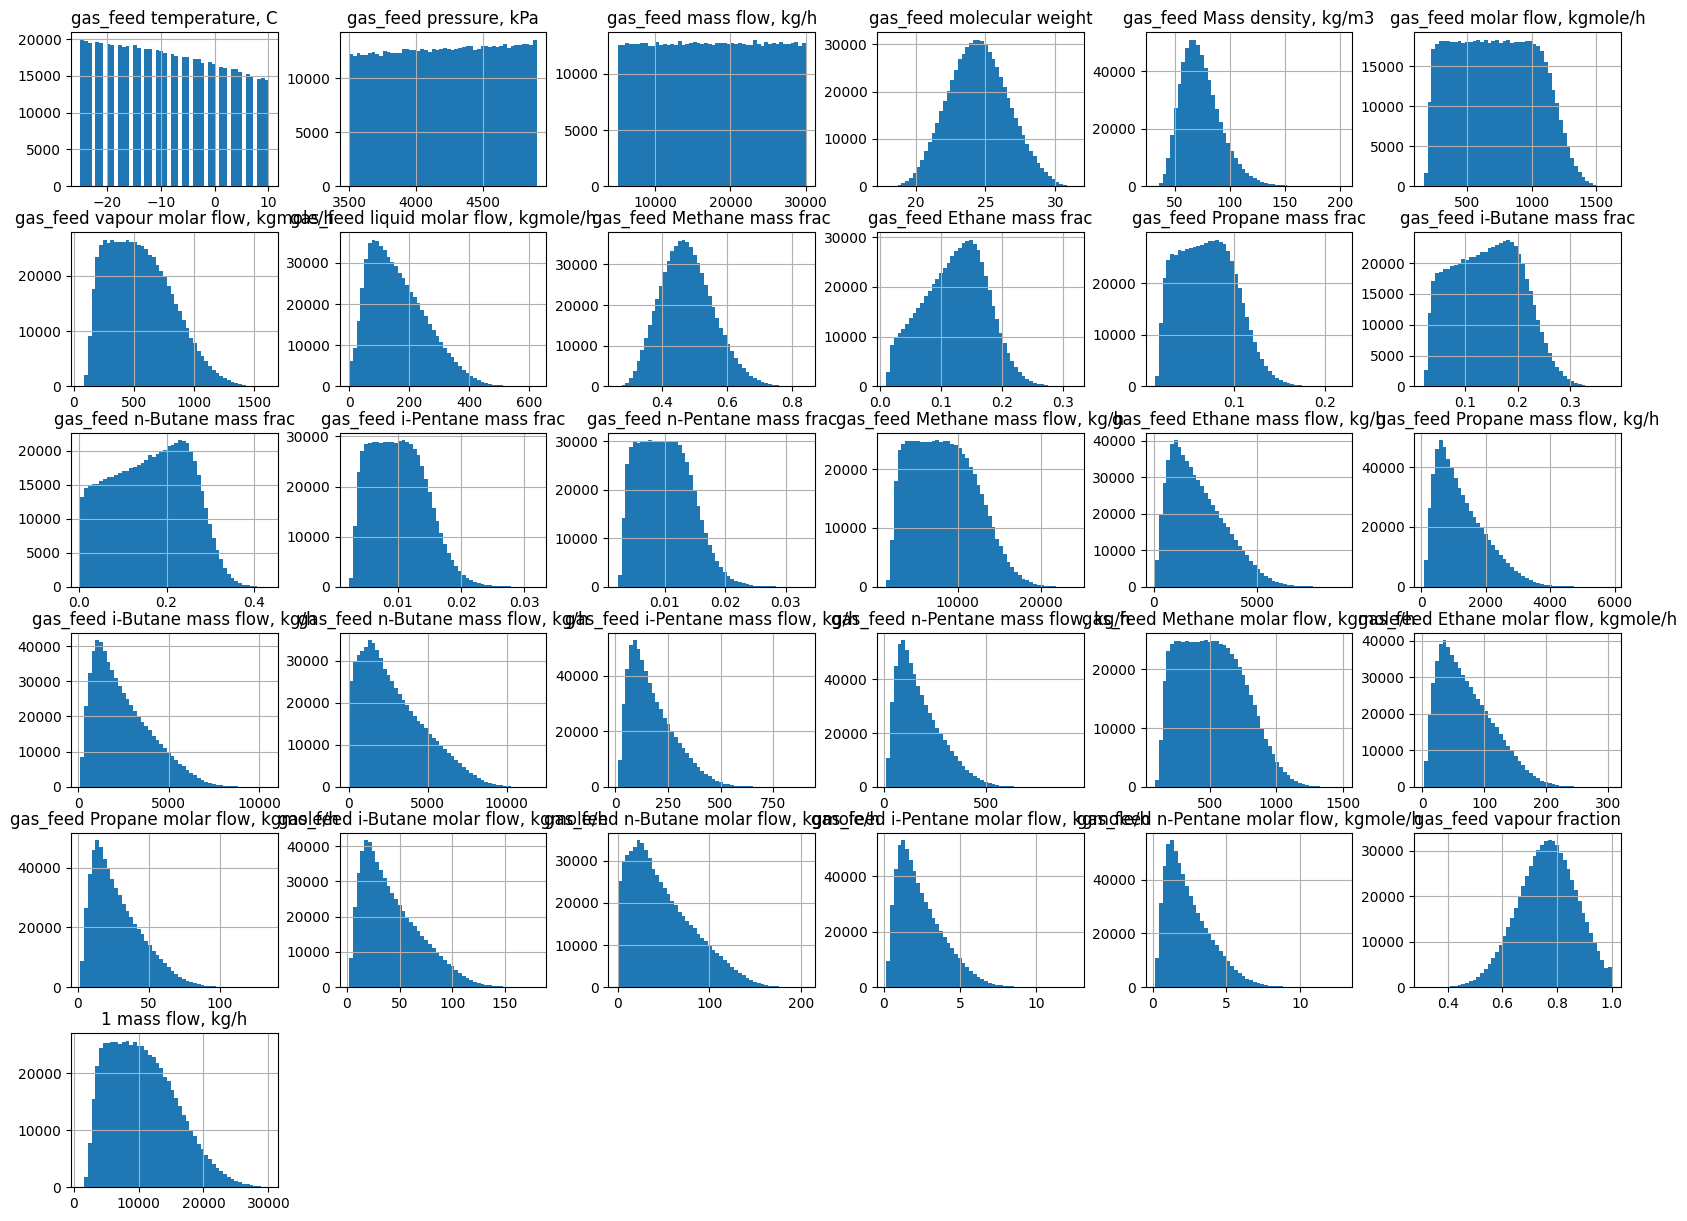

In [36]:
sep_vap_mass_flow_data.hist(bins=50, figsize=(20, 15));

In [37]:
corr_matrix = sep_vap_mass_flow_data.corr()

corr_matrix['1 mass flow, kg/h'].sort_values(ascending=False)

1 mass flow, kg/h                          1.000000
gas_feed vapour molar flow, kgmole/h       0.994241
gas_feed Methane mass flow, kg/h           0.958824
gas_feed Methane molar flow, kgmole/h      0.958824
gas_feed molar flow, kgmole/h              0.936814
gas_feed mass flow, kg/h                   0.854814
gas_feed Ethane molar flow, kgmole/h       0.634690
gas_feed Ethane mass flow, kg/h            0.634690
gas_feed n-Pentane mass flow, kg/h         0.623470
gas_feed n-Pentane molar flow, kgmole/h    0.623470
gas_feed i-Pentane mass flow, kg/h         0.623361
gas_feed i-Pentane molar flow, kgmole/h    0.623361
gas_feed Propane mass flow, kg/h           0.584282
gas_feed Propane molar flow, kgmole/h      0.584282
gas_feed vapour fraction                   0.472509
gas_feed i-Butane molar flow, kgmole/h     0.422764
gas_feed i-Butane mass flow, kg/h          0.422764
gas_feed Methane mass frac                 0.402991
gas_feed liquid molar flow, kgmole/h       0.241520
gas_feed n-B

In [38]:
sep_vap_mass_flow_data_mini = sep_vap_mass_flow_data.sample(frac=0.5)

In [39]:
## Тестовая и обучающая выборки
X = sep_vap_mass_flow_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
]]

y = sep_vap_mass_flow_data_mini[[
     '1 mass flow, kg/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/sep_vap_mass_flow_data_transformer.pkl')

X_train_normal.shape, y_train.shape

((253300, 30), (253300, 1))

In [47]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_0 = sep_vap_mass_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 781.7456 - mae: 781.7456
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 65.9686 - mae: 65.9686
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 52.8347 - mae: 52.8347
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 42.5649 - mae: 42.5649
Epoch 5/20
7916/7916 [==============================] - 8s 1ms/step - loss: 35.3869 - mae: 35.3869
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 30.6641 - mae: 30.6641
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 28.0053 - mae: 28.0053
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 26.6528 - mae: 26.6528
Epoch 9/20
7916/7916 [==============================] - 8s 1ms/step - loss: 25.9932 - mae: 25.9932
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 24.9816 - mae: 24.9816
Epoch 

In [48]:
sep_vap_mass_flow_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 1s 662us/step - loss: 24.6781 - mae: 24.6781


[24.678071975708008, 24.678071975708008]

In [52]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_1 = sep_vap_mass_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 590.9440 - mae: 590.9440
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 41.6348 - mae: 41.6348
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 28.3907 - mae: 28.3907
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 25.1536 - mae: 25.1536
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 23.1665 - mae: 23.1665
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 21.3202 - mae: 21.3202
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 19.8394 - mae: 19.8394
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 18.7854 - mae: 18.7854
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 17.7861 - mae: 17.7861
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 17.1260 - mae: 17.1260
Ep

In [53]:
sep_vap_mass_flow_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 760us/step - loss: 12.7924 - mae: 12.7924


[12.79236888885498, 12.79236888885498]

In [54]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_2 = sep_vap_mass_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 337.1648 - mae: 337.1648
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 36.1064 - mae: 36.1064
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 32.0637 - mae: 32.0637
Epoch 4/20
7916/7916 [==============================] - 10s 1ms/step - loss: 29.6591 - mae: 29.6591
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 28.0572 - mae: 28.0572
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 26.4069 - mae: 26.4069
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 24.7621 - mae: 24.7621
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 24.1996 - mae: 24.1996
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 23.6801 - mae: 23.6801
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 22.8331 - mae: 22.8331


In [55]:
sep_vap_mass_flow_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 814us/step - loss: 15.9216 - mae: 15.9216


[15.921638488769531, 15.921638488769531]

In [56]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_3 = sep_vap_mass_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 276.5862 - mae: 276.5862
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 36.1153 - mae: 36.1153
Epoch 3/20
7916/7916 [==============================] - 11s 1ms/step - loss: 29.2642 - mae: 29.2642
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 27.2492 - mae: 27.2492
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 25.7214 - mae: 25.7214
Epoch 6/20
7916/7916 [==============================] - 11s 1ms/step - loss: 25.0249 - mae: 25.0249
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.9112 - mae: 24.9112
Epoch 8/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.7323 - mae: 24.7323
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.6317 - mae: 24.6317
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 24.6681 - mae: 24.6681

In [58]:
sep_vap_mass_flow_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 1s 715us/step - loss: 47.9792 - mae: 47.9792


[47.97915267944336, 47.97915267944336]

In [59]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history_4 = sep_vap_mass_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 253.4411 - mae: 253.4411
Epoch 2/20
7916/7916 [==============================] - 12s 2ms/step - loss: 46.8787 - mae: 46.8787
Epoch 3/20
7916/7916 [==============================] - 12s 1ms/step - loss: 37.3872 - mae: 37.3872
Epoch 4/20
7916/7916 [==============================] - 12s 2ms/step - loss: 34.5845 - mae: 34.5845
Epoch 5/20
7916/7916 [==============================] - 12s 1ms/step - loss: 32.3100 - mae: 32.3100
Epoch 6/20
7916/7916 [==============================] - 12s 1ms/step - loss: 30.1102 - mae: 30.1102
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 29.1728 - mae: 29.1728
Epoch 8/20
7916/7916 [==============================] - 13s 2ms/step - loss: 28.9871 - mae: 28.9871
Epoch 9/20
7916/7916 [==============================] - 12s 2ms/step - loss: 27.9479 - mae: 27.9479
Epoch 10/20
7916/7916 [==============================] - 12s 1ms/step - loss: 27.9141 - mae: 27.91

In [60]:
sep_vap_mass_flow_model_4.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 1s 682us/step - loss: 62.7754 - mae: 62.7754


[62.77540969848633, 62.77540969848633]

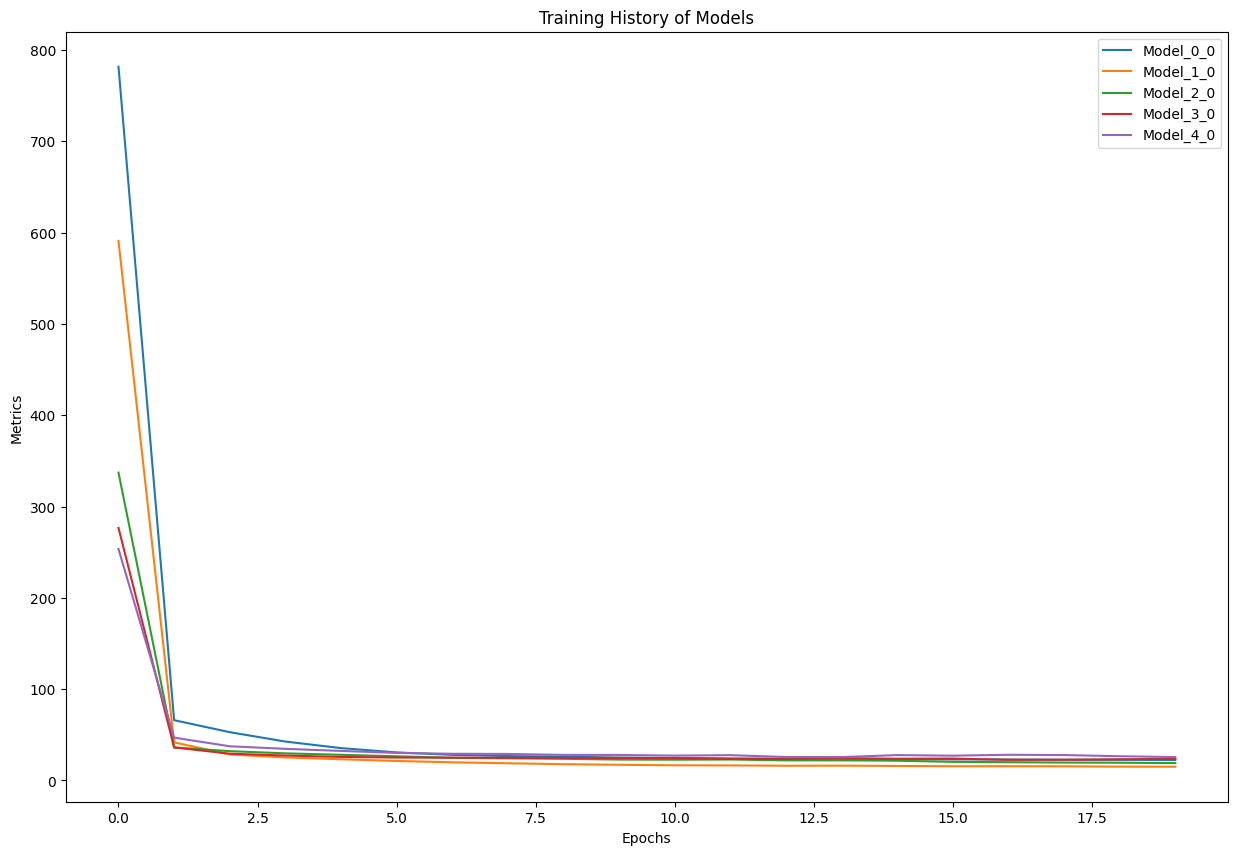

In [61]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(sep_vap_mass_flow_history_0.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(sep_vap_mass_flow_history_1.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(sep_vap_mass_flow_history_2.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(sep_vap_mass_flow_history_3.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(sep_vap_mass_flow_history_4.history['loss']).add_prefix('Model_4_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения массового расхода пара из сепаратора

In [31]:
## Тестовая и обучающая выборки
X = sep_vap_mass_flow_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
]]

y = sep_vap_mass_flow_data[[
     '1 mass flow, kg/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',  'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass frac', 'gas_feed Ethane mass frac',
    'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
    'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
    'gas_feed n-Pentane mass flow, kg/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    'gas_feed vapour fraction',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 30), (506600, 1))

In [34]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_mass_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
sep_vap_mass_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_mass_flow_history = sep_vap_mass_flow_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
15832/15832 [==============================] - 17s 1ms/step - loss: 311.3322 - mae: 311.3322
Epoch 2/50
15832/15832 [==============================] - 17s 1ms/step - loss: 24.9365 - mae: 24.9365
Epoch 3/50
15832/15832 [==============================] - 18s 1ms/step - loss: 20.5406 - mae: 20.5406
Epoch 4/50
15832/15832 [==============================] - 19s 1ms/step - loss: 18.2606 - mae: 18.2606
Epoch 5/50
15832/15832 [==============================] - 17s 1ms/step - loss: 17.0768 - mae: 17.0768
Epoch 6/50
15832/15832 [==============================] - 19s 1ms/step - loss: 16.1212 - mae: 16.1212
Epoch 7/50
15832/15832 [==============================] - 18s 1ms/step - loss: 15.2649 - mae: 15.2649
Epoch 8/50
15832/15832 [==============================] - 18s 1ms/step - loss: 14.7334 - mae: 14.7334
Epoch 9/50
15832/15832 [==============================] - 18s 1ms/step - loss: 14.0383 - mae: 14.0383
Epoch 10/50
15832/15832 [==============================] - 19s 1ms/step - loss: 

In [35]:
sep_vap_mass_flow_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 895us/step - loss: 8.3606 - mae: 8.3606


[8.360551834106445, 8.360551834106445]

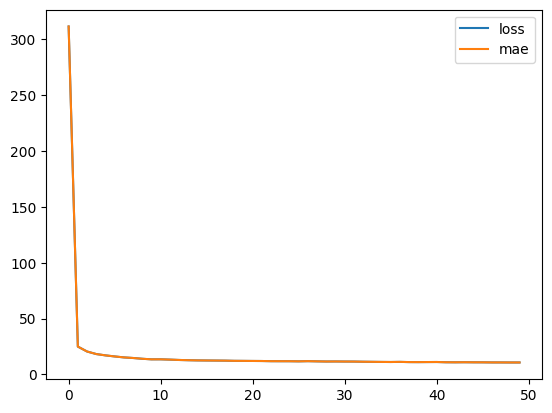

In [36]:
pd.DataFrame(sep_vap_mass_flow_history.history).plot();

In [37]:
y_pred = sep_vap_mass_flow_model.predict(X_test_normal)

3958/3958 [==============================] - 4s 830us/step


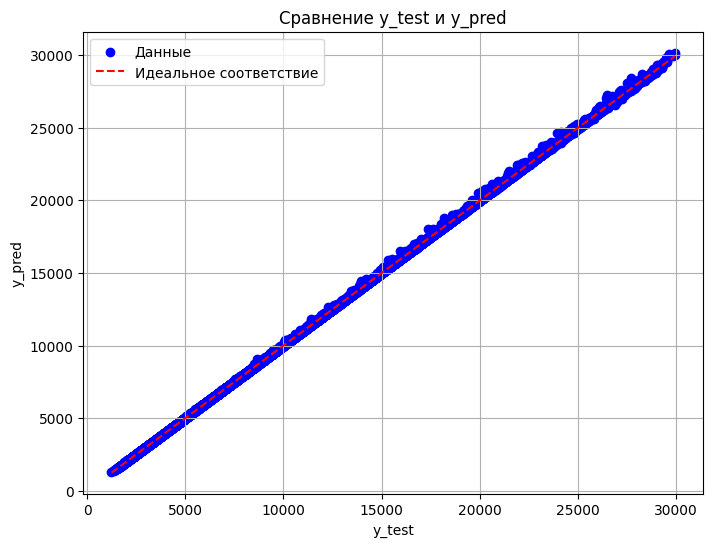

In [38]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
sep_vap_mass_flow_model.save('./models/low_temp_dist_19_06/sep_vap_mass_flow_model.h5')

In [40]:
y_pred

array([[ 8554.665],
       [14969.926],
       [ 9482.754],
       ...,
       [12265.5  ],
       [ 9375.567],
       [14826.192]], dtype=float32)

In [44]:
y_test

,"1 mass flow, kg/h"
340638,8552.076281
314613,14971.730370
219439,9469.603517
374434,7163.115685
313146,6342.474990
...,...
239029,4764.131919
417657,22702.653959
162767,12260.316641
343861,9357.991128


In [43]:
test = np.array(X_test['gas_feed mass flow, kg/h']).reshape((126650, 1))
val = test - y_pred

In [42]:
negative_count = np.sum(val < 0)
negative_count

385

## Определение состава паров сепаратора

In [66]:
sep_vap_composition_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
    '1 Methane mass flow, kg/h', '1 Ethane mass flow, kg/h', '1 Propane mass flow, kg/h',
    '1 i-Butane mass flow, kg/h', '1 n-Butane mass flow, kg/h', '1 i-Pentane mass flow, kg/h',
    '1 n-Pentane mass flow, kg/h',
]]

In [67]:
sep_vap_composition_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3",gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,...,"1 temperature, C","1 pressure, kPa","1 mass flow, kg/h","1 Methane mass flow, kg/h","1 Ethane mass flow, kg/h","1 Propane mass flow, kg/h","1 i-Butane mass flow, kg/h","1 n-Butane mass flow, kg/h","1 i-Pentane mass flow, kg/h","1 n-Pentane mass flow, kg/h"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,...,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,0.763452,719.365460,0.478100,0.123451,0.071425,...,-8.453983,4209.143296,10712.431423,7635.534278,1458.510318,518.405872,590.153528,472.195102,20.834707,16.797618
std,10.275480,404.079523,7214.000778,2.113006,18.272784,0.104859,303.963663,0.080897,0.051093,0.030432,...,10.275480,404.079523,5162.592892,3618.546024,991.702656,426.086991,502.043603,385.744805,30.027946,26.599237
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,0.312539,164.014283,0.263626,0.010702,0.014382,...,-25.000000,3500.000000,1034.439396,806.043814,28.095102,11.638494,9.212848,1.547543,0.199177,0.131949
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,0.692753,459.266317,0.419969,0.085843,0.046374,...,-17.000000,3861.000000,6513.165916,4675.887612,701.612139,222.432593,242.618624,196.118483,5.732289,4.311244
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,0.766630,714.255561,0.472891,0.126745,0.070364,...,-9.000000,4214.000000,10149.633666,7279.611415,1232.206002,396.216766,441.620776,364.767431,11.586948,8.839895
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,0.838392,969.084648,0.530332,0.160758,0.093590,...,0.000000,4560.000000,14213.364740,10139.320722,1990.965690,680.084162,774.294816,634.261008,23.706356,18.485985
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1.000000,1617.505790,0.841226,0.318581,0.219201,...,10.000000,4900.000000,29995.000000,24069.689237,8742.041315,4859.550840,5767.519308,3857.770293,683.083815,678.297606


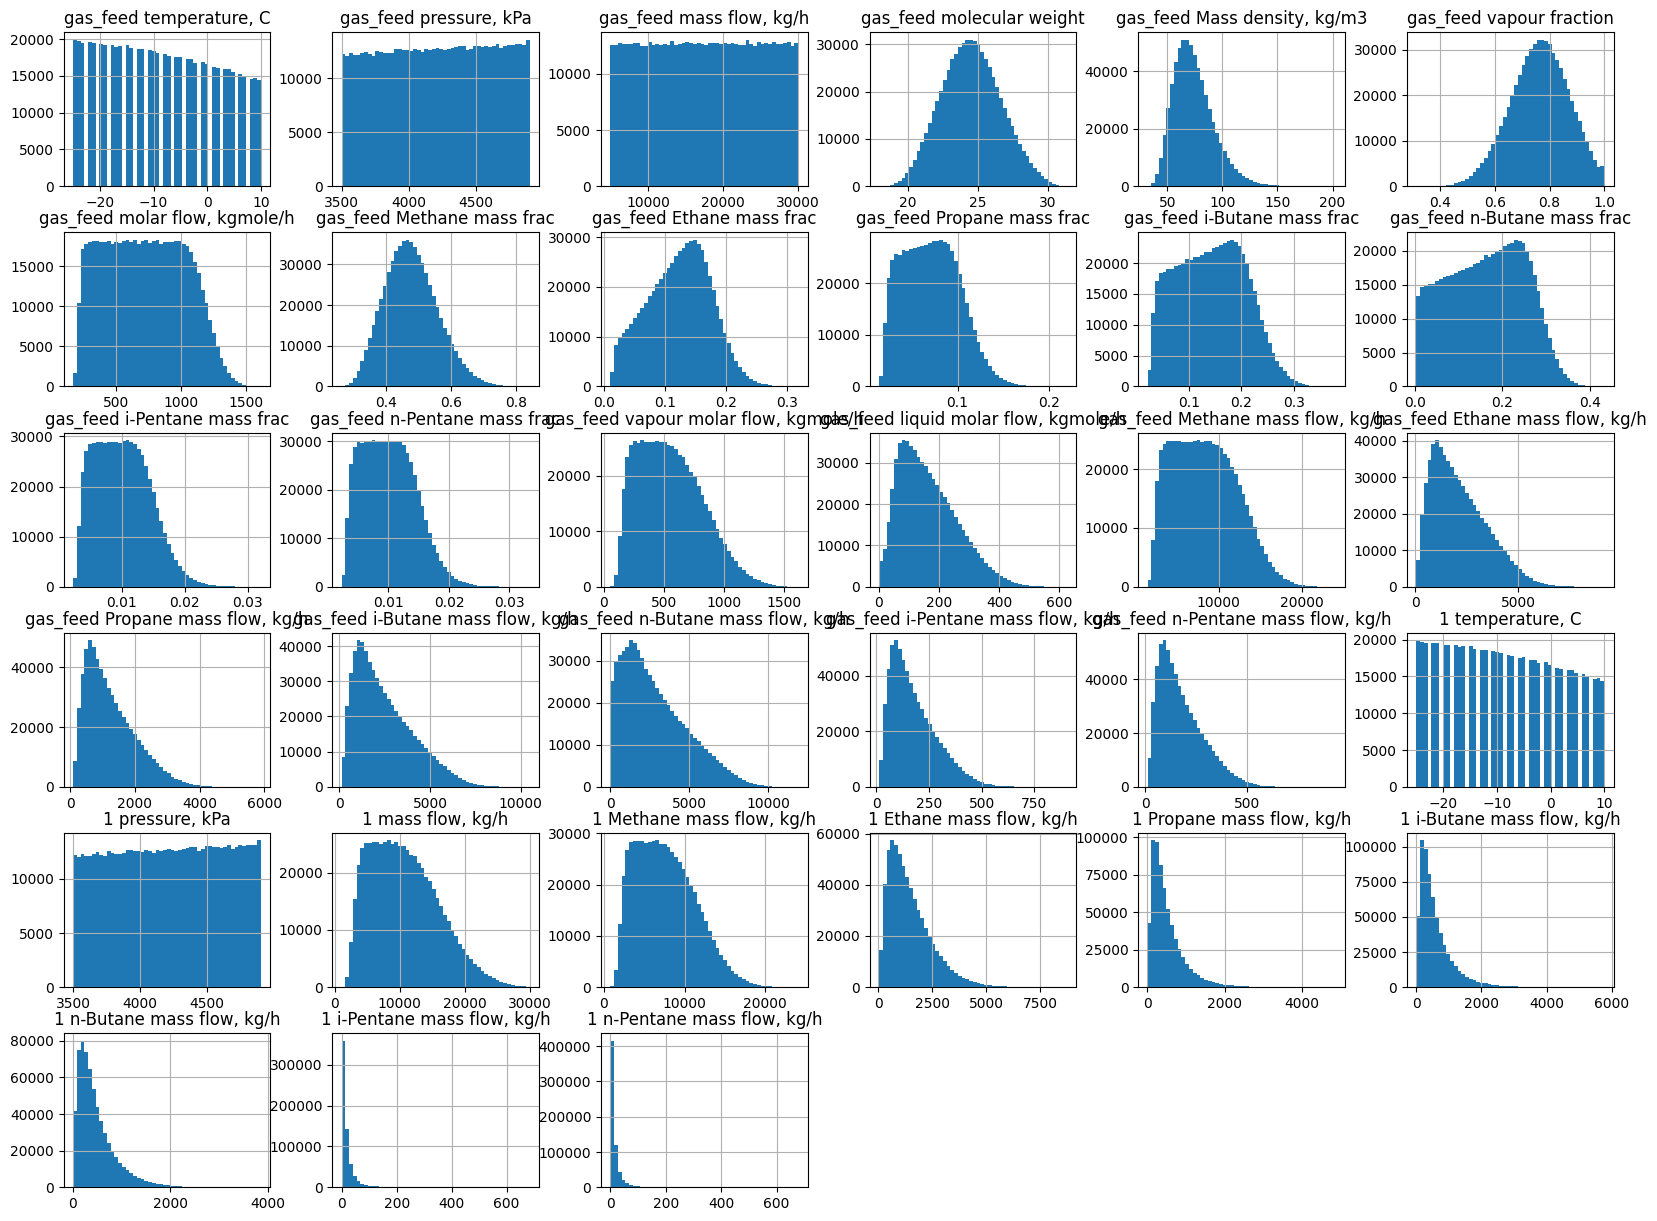

In [68]:
sep_vap_composition_data.hist(bins=50, figsize=(20, 15));

In [69]:
corr_matrix = sep_vap_composition_data.corr()

corr_matrix['1 Methane mass flow, kg/h'].sort_values(ascending=False)

1 Methane mass flow, kg/h               1.000000
gas_feed vapour molar flow, kgmole/h    0.992873
gas_feed Methane mass flow, kg/h        0.992624
1 mass flow, kg/h                       0.975567
gas_feed molar flow, kgmole/h           0.954326
gas_feed mass flow, kg/h                0.868976
1 Propane mass flow, kg/h               0.658400
gas_feed n-Pentane mass flow, kg/h      0.635497
gas_feed i-Pentane mass flow, kg/h      0.635202
1 Ethane mass flow, kg/h                0.619230
1 i-Butane mass flow, kg/h              0.598667
gas_feed Propane mass flow, kg/h        0.575700
gas_feed Ethane mass flow, kg/h         0.533227
1 i-Pentane mass flow, kg/h             0.516516
1 n-Butane mass flow, kg/h              0.503692
1 n-Pentane mass flow, kg/h             0.485631
gas_feed Methane mass frac              0.450526
gas_feed i-Butane mass flow, kg/h       0.436788
gas_feed vapour fraction                0.421682
gas_feed liquid molar flow, kgmole/h    0.300808
gas_feed n-Butane ma

In [70]:
sep_vap_composition_data_mini = sep_vap_composition_data.sample(frac=0.5)

In [71]:
## Тестовая и обучающая выборки
X = sep_vap_composition_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
]]

y = sep_vap_composition_data_mini[[
    '1 Methane mass flow, kg/h', '1 Ethane mass flow, kg/h', '1 Propane mass flow, kg/h',
    '1 i-Butane mass flow, kg/h', '1 n-Butane mass flow, kg/h', '1 i-Pentane mass flow, kg/h',
    '1 n-Pentane mass flow, kg/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/sep_vap_comp_transformer.pkl')

X_train_normal.shape, y_train.shape

((253300, 26), (253300, 7))

In [72]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_0_history = sep_vap_comp_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 240.0900 - mae: 240.0900
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 123.6980 - mae: 123.6980
Epoch 3/20
7916/7916 [==============================] - 11s 1ms/step - loss: 108.7925 - mae: 108.7925
Epoch 4/20
7916/7916 [==============================] - 13s 2ms/step - loss: 89.3869 - mae: 89.3869
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 67.7785 - mae: 67.7785
Epoch 6/20
7916/7916 [==============================] - 12s 1ms/step - loss: 54.8423 - mae: 54.8423
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 46.3553 - mae: 46.3553
Epoch 8/20
7916/7916 [==============================] - 12s 2ms/step - loss: 31.0751 - mae: 31.0751
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 25.7595 - mae: 25.7595
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 23.6063 - mae: 23

In [73]:
sep_vap_comp_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 849us/step - loss: 16.0476 - mae: 16.0476


[16.04764747619629, 16.04764747619629]

In [74]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_1_history = sep_vap_comp_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 11s 1ms/step - loss: 204.8575 - mae: 204.8575
Epoch 2/20
7916/7916 [==============================] - 11s 1ms/step - loss: 116.5658 - mae: 116.5658
Epoch 3/20
7916/7916 [==============================] - 11s 1ms/step - loss: 106.2546 - mae: 106.2546
Epoch 4/20
7916/7916 [==============================] - 12s 1ms/step - loss: 84.6432 - mae: 84.6432
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 78.0502 - mae: 78.0502
Epoch 6/20
7916/7916 [==============================] - 11s 1ms/step - loss: 59.6042 - mae: 59.6042
Epoch 7/20
7916/7916 [==============================] - 11s 1ms/step - loss: 47.7182 - mae: 47.7182
Epoch 8/20
7916/7916 [==============================] - 12s 1ms/step - loss: 45.2783 - mae: 45.2783
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 37.9422 - mae: 37.9422
Epoch 10/20
7916/7916 [==============================] - 11s 1ms/step - loss: 22.8359 - mae: 2

In [75]:
sep_vap_comp_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 979us/step - loss: 12.9211 - mae: 12.9211


[12.92111587524414, 12.92111587524414]

In [76]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_2_history = sep_vap_comp_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 13s 2ms/step - loss: 183.5887 - mae: 183.5887
Epoch 2/20
7916/7916 [==============================] - 11s 1ms/step - loss: 112.6098 - mae: 112.6098
Epoch 3/20
7916/7916 [==============================] - 12s 2ms/step - loss: 83.7960 - mae: 83.7960
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 77.1509 - mae: 77.1509
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 60.0174 - mae: 60.0174
Epoch 6/20
7916/7916 [==============================] - 12s 1ms/step - loss: 42.4846 - mae: 42.4846
Epoch 7/20
7916/7916 [==============================] - 12s 1ms/step - loss: 21.0238 - mae: 21.0238
Epoch 8/20
7916/7916 [==============================] - 12s 1ms/step - loss: 17.1754 - mae: 17.1754
Epoch 9/20
7916/7916 [==============================] - 17s 2ms/step - loss: 15.6822 - mae: 15.6822
Epoch 10/20
7916/7916 [==============================] - 12s 1ms/step - loss: 14.6470 - mae: 14.

In [77]:
sep_vap_comp_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 8.1047 - mae: 8.1047


[8.104706764221191, 8.104706764221191]

In [78]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_3_history = sep_vap_comp_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 16s 2ms/step - loss: 211.6676 - mae: 211.6676
Epoch 2/20
7916/7916 [==============================] - 13s 2ms/step - loss: 169.7931 - mae: 169.7931
Epoch 3/20
7916/7916 [==============================] - 14s 2ms/step - loss: 109.8051 - mae: 109.8051
Epoch 4/20
7916/7916 [==============================] - 16s 2ms/step - loss: 80.1500 - mae: 80.1500
Epoch 5/20
7916/7916 [==============================] - 15s 2ms/step - loss: 68.1634 - mae: 68.1634
Epoch 6/20
7916/7916 [==============================] - 14s 2ms/step - loss: 31.9759 - mae: 31.9759
Epoch 7/20
7916/7916 [==============================] - 14s 2ms/step - loss: 18.0052 - mae: 18.0052
Epoch 8/20
7916/7916 [==============================] - 14s 2ms/step - loss: 16.0172 - mae: 16.0172
Epoch 9/20
7916/7916 [==============================] - 13s 2ms/step - loss: 15.1926 - mae: 15.1926
Epoch 10/20
7916/7916 [==============================] - 13s 2ms/step - loss: 14.3723 - mae: 1

In [79]:
sep_vap_comp_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 996us/step - loss: 9.1517 - mae: 9.1517


[9.151700973510742, 9.151700973510742]

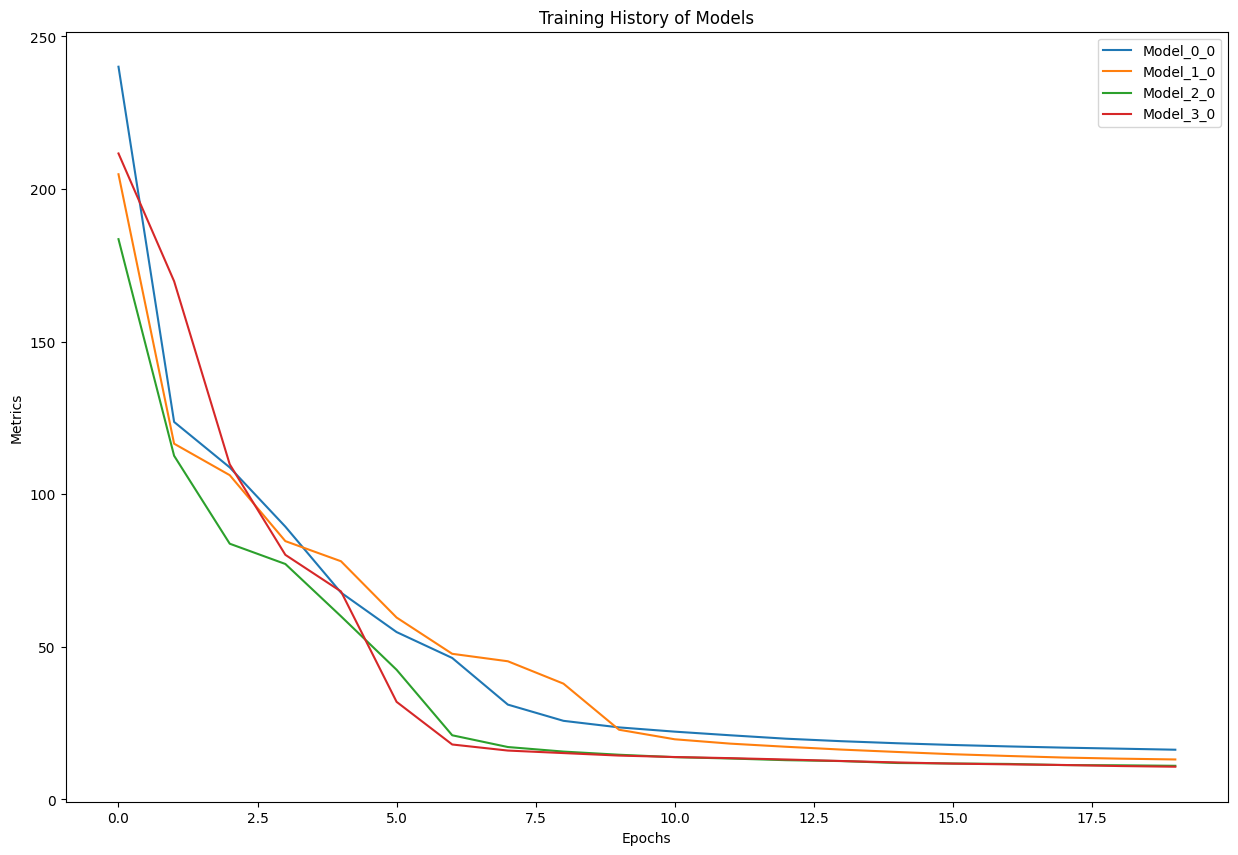

In [80]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(sep_vap_comp_model_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(sep_vap_comp_model_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(sep_vap_comp_model_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(sep_vap_comp_model_3_history.history['loss']).add_prefix('Model_3_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

# Основная модель для определения состава пара сепаратора

In [81]:
## Тестовая и обучающая выборки
X = sep_vap_composition_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
]]

y = sep_vap_composition_data[[
    '1 Methane mass flow, kg/h', '1 Ethane mass flow, kg/h', '1 Propane mass flow, kg/h',
    '1 i-Butane mass flow, kg/h', '1 n-Butane mass flow, kg/h', '1 i-Pentane mass flow, kg/h',
    '1 n-Pentane mass flow, kg/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    '1 temperature, C', '1 pressure, kPa', '1 mass flow, kg/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 26), (506600, 7))

In [82]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_model_history = sep_vap_comp_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 24s 1ms/step - loss: 139.3418 - mae: 139.3418
Epoch 2/30
15832/15832 [==============================] - 28s 2ms/step - loss: 79.1670 - mae: 79.1670
Epoch 3/30
15832/15832 [==============================] - 27s 2ms/step - loss: 34.3151 - mae: 34.3151
Epoch 4/30
15832/15832 [==============================] - 27s 2ms/step - loss: 16.8445 - mae: 16.8445
Epoch 5/30
15832/15832 [==============================] - 28s 2ms/step - loss: 15.0006 - mae: 15.0006
Epoch 6/30
15832/15832 [==============================] - 28s 2ms/step - loss: 13.7301 - mae: 13.7301
Epoch 7/30
15832/15832 [==============================] - 29s 2ms/step - loss: 12.7947 - mae: 12.7947
Epoch 8/30
15832/15832 [==============================] - 28s 2ms/step - loss: 12.0446 - mae: 12.0446
Epoch 9/30
15832/15832 [==============================] - 27s 2ms/step - loss: 11.5670 - mae: 11.5670
Epoch 10/30
15832/15832 [==============================] - 28s 2ms/step - loss: 

In [83]:
sep_vap_comp_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 889us/step - loss: 6.0053 - mae: 6.0053


[6.005265712738037, 6.005265712738037]

In [84]:
y_pred = sep_vap_comp_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 828us/step


In [85]:
x = 6321
y_pred[x]

array([8350.884   , 1421.8716  , 1448.7988  ,  969.12476 ,  622.3567  ,
         55.061565,   32.4081  ], dtype=float32)

In [86]:
mass_frac = (y_pred[x] / sum(y_pred[x])) * 100
mass_frac

array([64.733     , 11.021829  , 11.230559  ,  7.5123014 ,  4.8242817 ,
        0.42681712,  0.25121576], dtype=float32)

In [87]:
y_test.iloc[x]

1 Methane mass flow, kg/h      8363.735689
1 Ethane mass flow, kg/h       1423.491353
1 Propane mass flow, kg/h      1427.165492
1 i-Butane mass flow, kg/h      964.897784
1 n-Butane mass flow, kg/h      619.504035
1 i-Pentane mass flow, kg/h      61.722869
1 n-Pentane mass flow, kg/h      32.288602
Name: 463125, dtype: float64

In [88]:
slice1 = y_test.iloc[x].values
mass_frac_test = (slice1 / sum(slice1)) * 100
mass_frac_test

array([64.87133835, 11.04097411, 11.0694717 ,  7.48400152,  4.80503657,
        0.47873884,  0.25043891])

In [75]:
def plot_scatter_with_ideal_line(y_pred, y_test):
    """
    Визуализирует диаграмму разброса с линией идеального соответствия для y_pred и y_test.
    
    Args:
    y_pred (array-like): Предсказанные значения модели.
    y_test (array-like): Истинные значения.

    """
    # Преобразуем y_test в массив numpy, если это pandas Series
    if isinstance(y_test, pd.Series):
        y_test = y_test.values
    
    # Создаем диаграмму разброса
    plt.scatter(y_test, y_pred, color='blue', label='Предсказания')
    
    # Добавляем линию идеального соответствия
    max_value = np.max([np.max(y_test), np.max(y_pred)])
    min_value = np.min([np.min(y_test), np.min(y_pred)])
    plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Идеальное соответствие')
    
    # Добавляем подписи и заголовок
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Диаграмма разброса: Истинные значения vs. Предсказанные значения')
    plt.legend()
    
    # Показываем график
    plt.show()

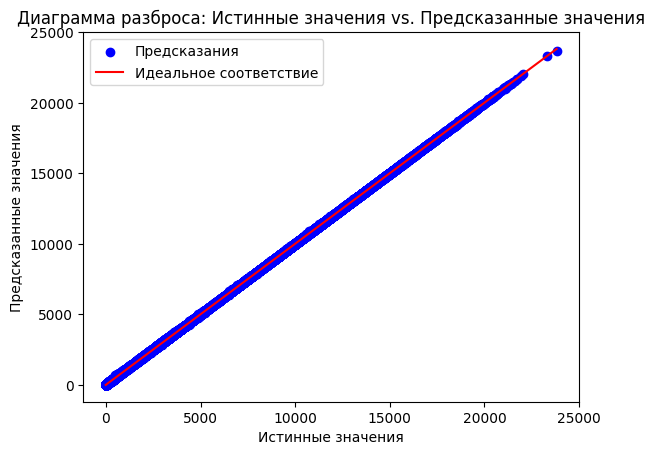

In [90]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [91]:
sep_vap_comp_model.save('./models/low_temp_dist_19_06/sep_vap_comp_model.h5')

# Определение мольных расходов компонентов паров сепаратора без массового расхода паров сепаратора

In [100]:
sep_vap_comp_molar_flow_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac', 
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
    '1 Methane molar flow, kgmole/h', '1 Ethane molar flow, kgmole/h', '1 Propane molar flow, kgmole/h',
    '1 i-Butane molar flow, kgmole/h', '1 n-Butane molar flow, kgmole/h', '1 i-Pentane molar flow, kgmole/h',
    '1 n-Pentane molar flow, kgmole/h',
]]

In [101]:
sep_vap_comp_molar_flow_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3",gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,...,"gas_feed n-Butane molar flow, kgmole/h","gas_feed i-Pentane molar flow, kgmole/h","gas_feed n-Pentane molar flow, kgmole/h","1 Methane molar flow, kgmole/h","1 Ethane molar flow, kgmole/h","1 Propane molar flow, kgmole/h","1 i-Butane molar flow, kgmole/h","1 n-Butane molar flow, kgmole/h","1 i-Pentane molar flow, kgmole/h","1 n-Pentane molar flow, kgmole/h"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,...,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,0.763452,719.365460,0.478100,0.123451,0.071425,...,49.303638,2.455704,2.454467,476.030815,48.617011,11.781952,10.154052,8.124486,0.288769,0.232815
std,10.275480,404.079523,7214.000778,2.113006,18.272784,0.104859,303.963663,0.080897,0.051093,0.030432,...,34.884778,1.511052,1.511232,225.595139,33.056755,9.683795,8.638052,6.637041,0.416188,0.368666
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,0.312539,164.014283,0.263626,0.010702,0.014382,...,0.251074,0.173227,0.176087,50.252108,0.936503,0.264511,0.158514,0.026627,0.002761,0.001829
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,0.692753,459.266317,0.419969,0.085843,0.046374,...,21.462512,1.278634,1.277903,291.514190,23.387071,5.055286,4.174443,3.374372,0.079450,0.059754
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,0.766630,714.255561,0.472891,0.126745,0.070364,...,41.799937,2.108255,2.106347,453.841111,41.073533,9.004927,7.598430,6.276109,0.160595,0.122521
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,0.838392,969.084648,0.530332,0.160758,0.093590,...,71.589470,3.347614,3.344023,632.127227,66.365523,15.456458,13.322347,10.912956,0.328570,0.256216
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1.000000,1617.505790,0.841226,0.318581,0.219201,...,204.949783,12.523596,12.909486,1500.604067,291.401377,110.444337,99.234675,66.375951,9.467551,9.401214


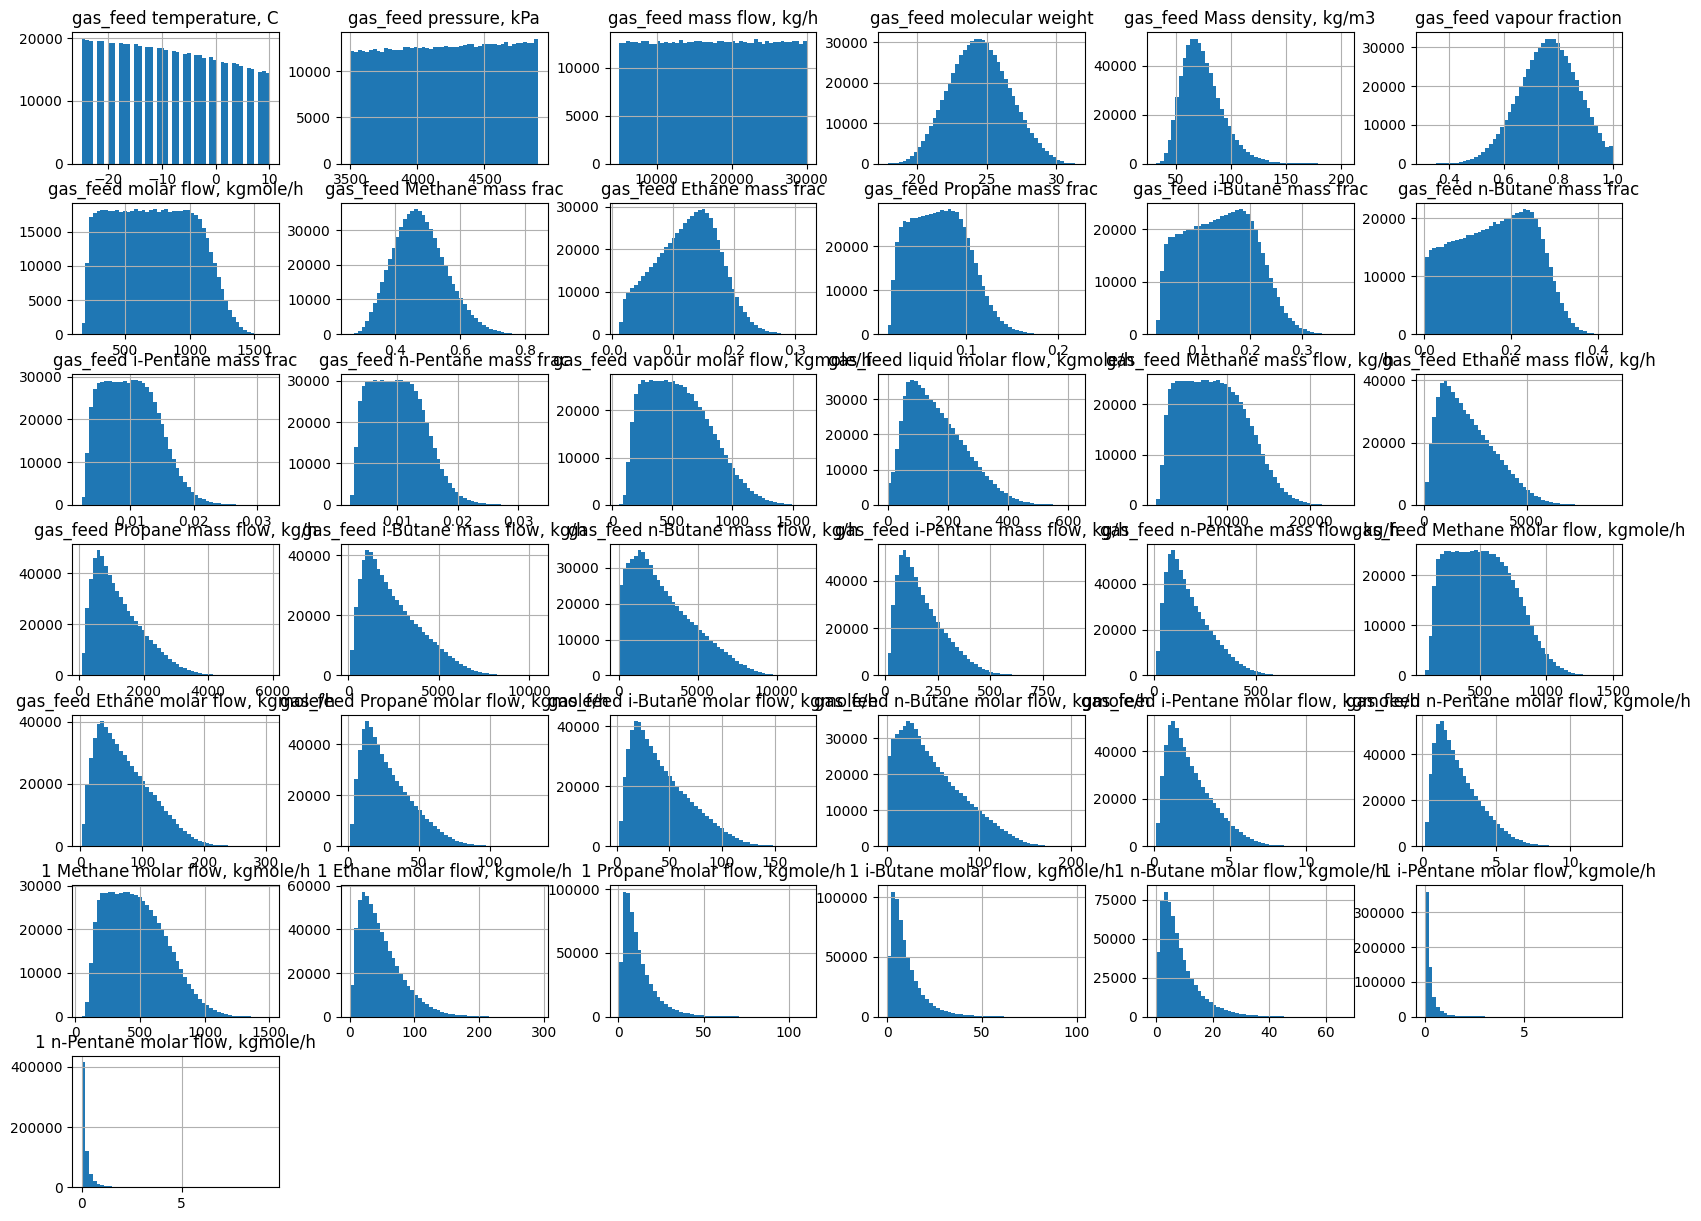

In [102]:
sep_vap_comp_molar_flow_data.hist(bins=50, figsize=(20, 15));

In [103]:
sep_vap_comp_molar_flow_data_mini = sep_vap_comp_molar_flow_data.sample(frac=0.45)

In [175]:
## Тестовая и обучающая выборки
X = sep_vap_comp_molar_flow_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac', 
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
]]

y = sep_vap_comp_molar_flow_data_mini[[
    '1 Methane molar flow, kgmole/h', '1 Ethane molar flow, kgmole/h', '1 Propane molar flow, kgmole/h',
    '1 i-Butane molar flow, kgmole/h', '1 n-Butane molar flow, kgmole/h', '1 i-Pentane molar flow, kgmole/h',
    '1 n-Pentane molar flow, kgmole/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac', 
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/sep_vap_comp_molar_transformer.pkl')

X_train_normal.shape, y_train.shape

((227969, 30), (227969, 7))

In [105]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_molar_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_molar_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_molar_flow_0_history = sep_vap_comp_molar_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 8s 1ms/step - loss: 6.1561 - mae: 6.1561
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 1.7058 - mae: 1.7058
Epoch 3/20
7125/7125 [==============================] - 8s 1ms/step - loss: 1.2072 - mae: 1.2072
Epoch 4/20
7125/7125 [==============================] - 9s 1ms/step - loss: 1.0145 - mae: 1.0145
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.9717 - mae: 0.9717
Epoch 6/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.9381 - mae: 0.9381
Epoch 7/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.9059 - mae: 0.9059
Epoch 8/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.8731 - mae: 0.8731
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.8450 - mae: 0.8450
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.8002 - mae: 0.8002
Epoch 11/20
7125/7125 [=====

In [106]:
sep_vap_comp_molar_flow_model_0.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 858us/step - loss: 0.7720 - mae: 0.7720


[0.7720393538475037, 0.7720393538475037]

In [108]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_molar_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_molar_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_molar_flow_1_history = sep_vap_comp_molar_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 9s 1ms/step - loss: 5.3136 - mae: 5.3136
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 1.1249 - mae: 1.1249
Epoch 3/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.8940 - mae: 0.8940
Epoch 4/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.7296 - mae: 0.7296
Epoch 5/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.6497 - mae: 0.6497
Epoch 6/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5897 - mae: 0.5897
Epoch 7/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.5419 - mae: 0.5419
Epoch 8/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5152 - mae: 0.5152
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4956 - mae: 0.4956
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4831 - mae: 0.4831
Epoch 11/20
7125/7125 [======

In [109]:
sep_vap_comp_molar_flow_model_1.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 817us/step - loss: 0.4552 - mae: 0.4552


[0.4551781713962555, 0.4551781713962555]

In [110]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_molar_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_molar_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_molar_flow_2_history = sep_vap_comp_molar_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 9s 1ms/step - loss: 4.1691 - mae: 4.1691
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.9591 - mae: 0.9591
Epoch 3/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.7114 - mae: 0.7114
Epoch 4/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.6043 - mae: 0.6043
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5490 - mae: 0.5490
Epoch 6/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.5085 - mae: 0.5085
Epoch 7/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.4849 - mae: 0.4849
Epoch 8/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4636 - mae: 0.4636
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4526 - mae: 0.4526
Epoch 10/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.4371 - mae: 0.4371
Epoch 11/20
7125/7125 [=

In [111]:
sep_vap_comp_molar_flow_model_2.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 887us/step - loss: 0.5667 - mae: 0.5667


[0.5667027235031128, 0.5667027235031128]

In [112]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_molar_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_molar_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_molar_flow_3_history = sep_vap_comp_molar_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 10s 1ms/step - loss: 4.2861 - mae: 4.2861
Epoch 2/20
7125/7125 [==============================] - 9s 1ms/step - loss: 1.2499 - mae: 1.2499
Epoch 3/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.8121 - mae: 0.8121
Epoch 4/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.7536 - mae: 0.7536
Epoch 5/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.7050 - mae: 0.7050
Epoch 6/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.6910 - mae: 0.6910
Epoch 7/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.6481 - mae: 0.6481
Epoch 8/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.6300 - mae: 0.6300
Epoch 9/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.6300 - mae: 0.6300
Epoch 10/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.5752 - mae: 0.5752
Epoch 11/20
7125/712

In [113]:
sep_vap_comp_molar_flow_model_3.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 827us/step - loss: 0.4166 - mae: 0.4166


[0.41658496856689453, 0.41658496856689453]

In [114]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_molar_flow_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_molar_flow_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_molar_flow_4_history = sep_vap_comp_molar_flow_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 12s 2ms/step - loss: 3.8815 - mae: 3.8815
Epoch 2/20
7125/7125 [==============================] - 11s 2ms/step - loss: 1.0622 - mae: 1.0622
Epoch 3/20
7125/7125 [==============================] - 13s 2ms/step - loss: 0.8068 - mae: 0.8068
Epoch 4/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.7481 - mae: 0.7481
Epoch 5/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.6963 - mae: 0.6963
Epoch 6/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.6671 - mae: 0.6671
Epoch 7/20
7125/7125 [==============================] - 13s 2ms/step - loss: 0.6365 - mae: 0.6365
Epoch 8/20
7125/7125 [==============================] - 13s 2ms/step - loss: 0.6090 - mae: 0.6090
Epoch 9/20
7125/7125 [==============================] - 13s 2ms/step - loss: 0.5950 - mae: 0.5950
Epoch 10/20
7125/7125 [==============================] - 14s 2ms/step - loss: 0.5704 - mae: 0.5704
Epoch 11/20
7125/71

In [115]:
sep_vap_comp_molar_flow_model_4.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 909us/step - loss: 0.6460 - mae: 0.6460


[0.6460116505622864, 0.6460116505622864]

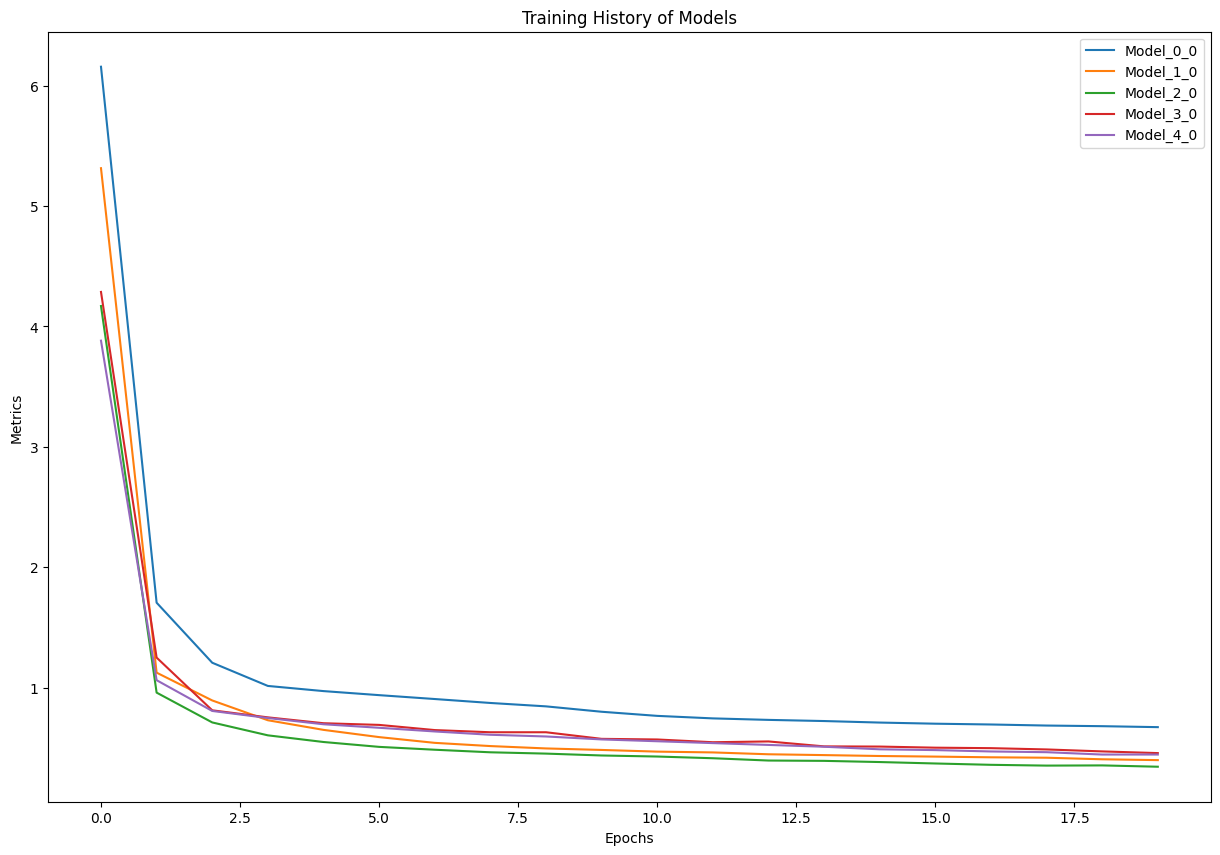

In [116]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(sep_vap_comp_molar_flow_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(sep_vap_comp_molar_flow_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(sep_vap_comp_molar_flow_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(sep_vap_comp_molar_flow_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(sep_vap_comp_molar_flow_4_history.history['loss']).add_prefix('Model_4_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

# Основная модель для определения молярного расхода компонентов пара с верха сепаратора

In [117]:
## Тестовая и обучающая выборки
X = sep_vap_comp_molar_flow_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac', 
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
]]

y = sep_vap_comp_molar_flow_data[[
    '1 Methane molar flow, kgmole/h', '1 Ethane molar flow, kgmole/h', '1 Propane molar flow, kgmole/h',
    '1 i-Butane molar flow, kgmole/h', '1 n-Butane molar flow, kgmole/h', '1 i-Pentane molar flow, kgmole/h',
    '1 n-Pentane molar flow, kgmole/h',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac', 
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 30), (506600, 7))

In [118]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
sep_vap_comp_molar_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
sep_vap_comp_molar_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
sep_vap_comp_molar_flow_history = sep_vap_comp_molar_flow_model.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
15832/15832 [==============================] - 19s 1ms/step - loss: 2.3187 - mae: 2.3187
Epoch 2/20
15832/15832 [==============================] - 19s 1ms/step - loss: 0.6590 - mae: 0.6590
Epoch 3/20
15832/15832 [==============================] - 20s 1ms/step - loss: 0.5413 - mae: 0.5413
Epoch 4/20
15832/15832 [==============================] - 22s 1ms/step - loss: 0.4785 - mae: 0.4785
Epoch 5/20
15832/15832 [==============================] - 20s 1ms/step - loss: 0.4394 - mae: 0.4394
Epoch 6/20
15832/15832 [==============================] - 19s 1ms/step - loss: 0.4021 - mae: 0.4021
Epoch 7/20
15832/15832 [==============================] - 21s 1ms/step - loss: 0.3769 - mae: 0.3769
Epoch 8/20
15832/15832 [==============================] - 21s 1ms/step - loss: 0.3573 - mae: 0.3573
Epoch 9/20
15832/15832 [==============================] - 22s 1ms/step - loss: 0.3440 - mae: 0.3440
Epoch 10/20
15832/15832 [==============================] - 21s 1ms/step - loss: 0.3286 - mae: 0.3286

In [119]:
sep_vap_comp_molar_flow_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 863us/step - loss: 0.3010 - mae: 0.3010


[0.30099934339523315, 0.30099934339523315]

In [120]:
y_pred = sep_vap_comp_molar_flow_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 761us/step


In [129]:
x = 9830
y_pred[x]

array([4.4715811e+02, 2.2146732e+01, 8.6797371e+00, 4.0161753e+00,
       3.9286697e+00, 6.2689289e-02, 2.1240555e-01], dtype=float32)

In [130]:
y_test.iloc[x]

1 Methane molar flow, kgmole/h      448.386286
1 Ethane molar flow, kgmole/h        22.170095
1 Propane molar flow, kgmole/h        8.552301
1 i-Butane molar flow, kgmole/h       3.846736
1 n-Butane molar flow, kgmole/h       3.918905
1 i-Pentane molar flow, kgmole/h      0.078758
1 n-Pentane molar flow, kgmole/h      0.180962
Name: 36531, dtype: float64

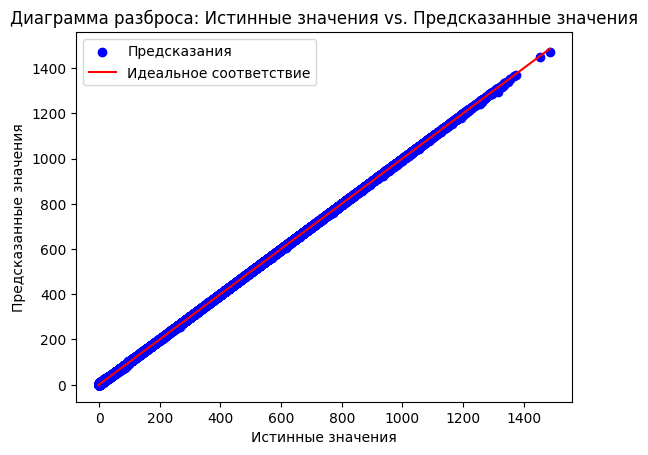

In [134]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test));

In [135]:
sep_vap_comp_molar_flow_model.save('./models/low_temp_dist_19_06/sep_vap_comp_molar_flow_model.h5')

# Определяем состав потока 2

In [118]:
stream_1_comp_mass_flow = sep_vap_comp_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 783us/step


In [132]:
x = 76

In [133]:
stream_1_comp_mass_flow[x]

array([13473.034  ,   730.9953 ,  1182.5673 ,  1270.1038 ,  1458.5431 ,
         204.9519 ,    86.04673], dtype=float32)

In [134]:
gas_feed_comp_mass_flow = np.array(
    X_test[[
        'gas_feed Methane mass flow, kg/h', 'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h',
        'gas_feed i-Butane mass flow, kg/h', 'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h',
        'gas_feed n-Pentane mass flow, kg/h',
    ]]
)[x]

gas_feed_comp_mass_flow

array([13569.64183278,   757.9055864 ,  1364.73902522,  1704.71856806,
        2052.54998919,   399.39865183,   171.04634653])

In [135]:
stream_2_comp_mass_flow = gas_feed_comp_mass_flow - stream_1_comp_mass_flow[x]
stream_2_comp_mass_flow[stream_2_comp_mass_flow < 0] = 0
stream_2_comp_mass_flow

array([ 96.60765309,  26.91028611, 182.17176447, 434.6148083 ,
       594.00689837, 194.44674753,  84.99961649])

In [131]:
count = np.sum(stream_2_comp_mass_flow < 0)
count

0

# Определение температуры потока 3

In [137]:
expander_gas_temp_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3',  'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
    '3 temperature, C', '3 pressure, kPa',
]]

In [138]:
expander_gas_temp_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3",gas_feed vapour fraction,"gas_feed molar flow, kgmole/h","gas_feed Methane molar flow, kgmole/h","gas_feed Ethane molar flow, kgmole/h","gas_feed Propane molar flow, kgmole/h","gas_feed i-Butane molar flow, kgmole/h","gas_feed n-Butane molar flow, kgmole/h","gas_feed i-Pentane molar flow, kgmole/h","gas_feed n-Pentane molar flow, kgmole/h","3 temperature, C","3 pressure, kPa"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,0.763452,719.365460,521.856793,72.068694,28.425303,43.131686,49.303638,2.455704,2.454467,-31.089714,2299.584700
std,10.275480,404.079523,7214.000778,2.113006,18.272784,0.104859,303.963663,235.191165,43.877957,17.573898,27.483898,34.884778,1.511052,1.511232,11.962369,173.374179
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,0.312539,164.014283,89.412526,2.079377,1.909704,2.064457,0.251074,0.173227,0.176087,-62.085922,2000.000000
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,0.692753,459.266317,326.174079,36.782681,14.593052,21.174918,21.462512,1.278634,1.277903,-40.551916,2149.000000
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,0.766630,714.255561,507.099865,63.870318,24.436784,36.925108,41.799937,2.108255,2.106347,-31.359726,2300.000000
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,0.838392,969.084648,694.158344,100.572114,39.032780,60.302306,71.589470,3.347614,3.344023,-21.602613,2450.000000
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1.000000,1617.505790,1500.604067,305.446234,134.065145,180.561015,204.949783,12.523596,12.909486,-0.384276,2600.000000


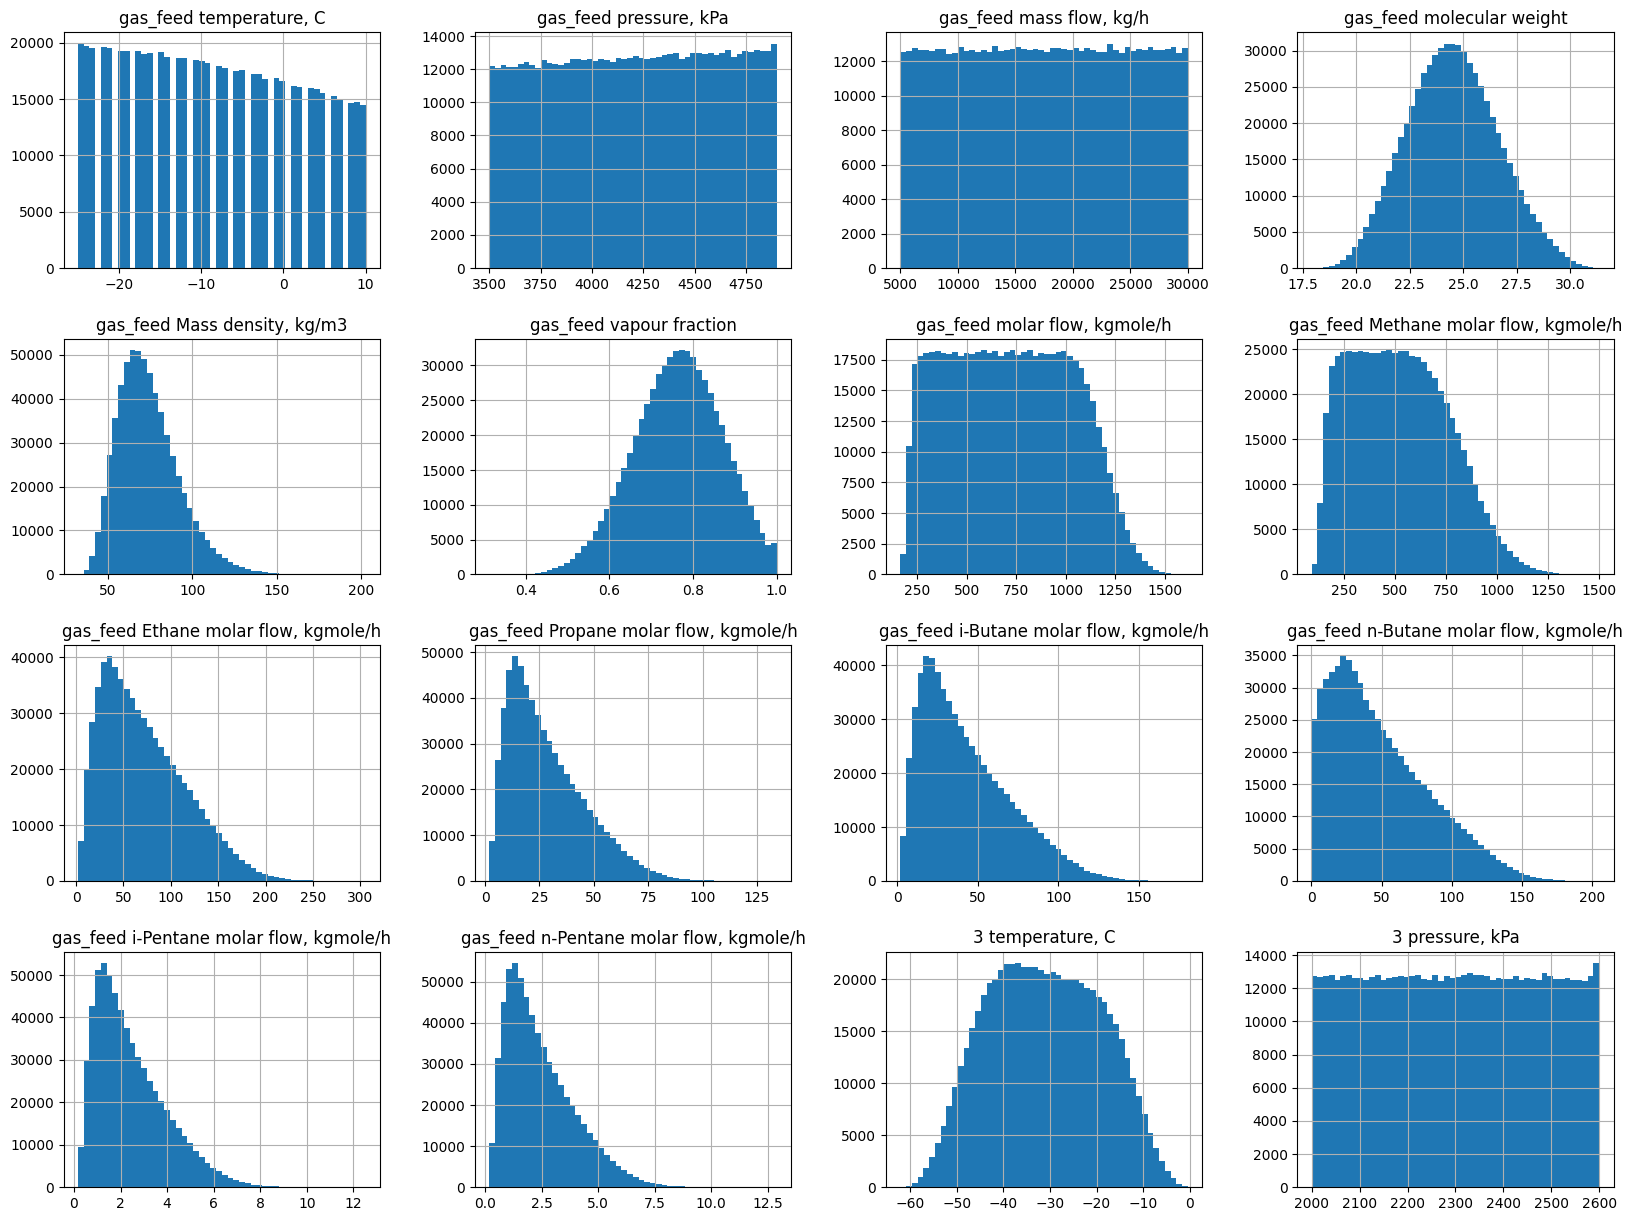

In [139]:
expander_gas_temp_data.hist(bins=50, figsize=(20, 15));

In [140]:
corr_matrix = expander_gas_temp_data.corr()

corr_matrix['3 temperature, C'].sort_values(ascending=False)

3 temperature, C                           1.000000
gas_feed temperature, C                    0.919480
gas_feed vapour fraction                   0.397102
3 pressure, kPa                            0.221330
gas_feed Ethane molar flow, kgmole/h       0.040173
gas_feed molecular weight                  0.022575
gas_feed Propane molar flow, kgmole/h      0.010534
gas_feed i-Butane molar flow, kgmole/h     0.009483
gas_feed mass flow, kg/h                   0.000628
gas_feed molar flow, kgmole/h             -0.004202
gas_feed i-Pentane molar flow, kgmole/h   -0.006372
gas_feed n-Pentane molar flow, kgmole/h   -0.006552
gas_feed n-Butane molar flow, kgmole/h    -0.010015
gas_feed Methane molar flow, kgmole/h     -0.013235
gas_feed pressure, kPa                    -0.311740
gas_feed Mass density, kg/m3              -0.498408
Name: 3 temperature, C, dtype: float64

In [141]:
expander_gas_temp_data_mini = expander_gas_temp_data.sample(frac=0.5)
expander_gas_temp_data_mini.head(10)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3",gas_feed vapour fraction,"gas_feed molar flow, kgmole/h","gas_feed Methane molar flow, kgmole/h","gas_feed Ethane molar flow, kgmole/h","gas_feed Propane molar flow, kgmole/h","gas_feed i-Butane molar flow, kgmole/h","gas_feed n-Butane molar flow, kgmole/h","gas_feed i-Pentane molar flow, kgmole/h","gas_feed n-Pentane molar flow, kgmole/h","3 temperature, C","3 pressure, kPa"
460029,9.0,3679.0,18737.0,25.828219,58.543070,0.813841,725.446849,469.447718,110.477361,46.714405,58.594564,35.787977,2.704792,2.171031,-6.760787,2345.0
60597,-10.0,3780.0,10201.0,23.999725,61.642304,0.800915,425.046530,297.097661,61.626024,23.746058,29.087994,9.981589,2.448276,1.310866,-31.179919,2111.0
378530,3.0,3851.0,20305.0,22.818990,50.673962,0.894287,889.829038,682.023979,81.339063,36.054217,53.005532,33.460992,1.563631,2.779315,-12.693304,2484.0
101446,-15.0,4111.0,10919.0,22.987212,65.244064,0.808347,475.003234,355.906702,55.166524,14.247731,11.453473,36.487472,0.433650,1.534929,-35.542470,2427.0
461214,-12.0,4477.0,23512.0,22.404590,66.632720,0.834793,1049.427812,827.239408,91.041400,13.206723,42.589380,71.977744,2.221131,1.550190,-41.752015,2061.0
532554,-4.0,4715.0,19473.0,25.133639,85.012725,0.732396,774.778381,537.645581,93.921365,28.551608,20.352175,88.364554,2.783832,3.545161,-34.520691,2094.0
584909,-22.0,4354.0,29063.0,23.985714,84.124992,0.714707,1211.679569,857.607381,166.266418,50.237609,68.242305,64.667362,1.775039,3.544718,-45.262167,2407.0
487832,-22.0,3948.0,11556.0,21.630483,58.147249,0.848756,534.246050,430.769895,38.274394,25.020528,18.751524,18.166197,1.962478,1.525503,-45.547554,2139.0
427130,-24.0,3880.0,24586.0,22.726837,63.724232,0.797806,1081.804735,825.446266,124.333132,11.962547,18.579259,95.970059,1.222988,4.763006,-41.559435,2531.0
89583,-15.0,4547.0,17796.0,25.280732,92.692488,0.679288,703.935307,477.209076,97.133311,28.930938,56.291280,38.914822,2.069511,3.768703,-44.000149,2124.0


In [142]:
## Тестовая и обучающая выборки
X = expander_gas_temp_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3',  'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
]]

y = expander_gas_temp_data_mini[[
    '3 temperature, C',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3',  'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 15), (253300, 1))

In [143]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_0_history = expander_gas_temp_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.1819 - mae: 1.1819
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1975 - mae: 0.1975
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1798 - mae: 0.1798
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1638 - mae: 0.1638
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1433 - mae: 0.1433
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1353 - mae: 0.1353
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1340 - mae: 0.1340
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1305 - mae: 0.1305
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1263 - mae: 0.1263
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1252 - mae: 0.1252
Epoch 11/20
7916/7916 [===

In [144]:
expander_gas_temp_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 887us/step - loss: 0.0994 - mae: 0.0994


[0.09937280416488647, 0.09937280416488647]

In [145]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_1_history = expander_gas_temp_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.7149 - mae: 0.7149
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1381 - mae: 0.1381
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1263 - mae: 0.1263
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1147 - mae: 0.1147
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1079 - mae: 0.1079
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1004 - mae: 0.1004
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0998 - mae: 0.0998
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0956 - mae: 0.0956
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.0919 - mae: 0.0919
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.0924 - mae: 0.0924
Epoch 11/20
7916/7916 [====

In [147]:
expander_gas_temp_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 0.0576 - mae: 0.0576


[0.05761738494038582, 0.05761738494038582]

In [146]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_2_history = expander_gas_temp_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.5997 - mae: 0.5997
Epoch 2/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1668 - mae: 0.1668
Epoch 3/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1386 - mae: 0.1386
Epoch 4/20
7916/7916 [==============================] - 12s 1ms/step - loss: 0.1282 - mae: 0.1282
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1172 - mae: 0.1172
Epoch 6/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1122 - mae: 0.1122
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1073 - mae: 0.1073
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1058 - mae: 0.1058
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1034 - mae: 0.1034
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.1000 - mae: 0.1000
Epoch 11/20
7916/79

In [148]:
expander_gas_temp_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 974us/step - loss: 0.0720 - mae: 0.0720


[0.07196277379989624, 0.07196277379989624]

In [149]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_3_history = expander_gas_temp_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 0.6276 - mae: 0.6276
Epoch 2/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1928 - mae: 0.1928
Epoch 3/20
7916/7916 [==============================] - 12s 1ms/step - loss: 0.1746 - mae: 0.1746
Epoch 4/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1658 - mae: 0.1658
Epoch 5/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1549 - mae: 0.1549
Epoch 6/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1457 - mae: 0.1457
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1415 - mae: 0.1415
Epoch 8/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1380 - mae: 0.1380
Epoch 9/20
7916/7916 [==============================] - 11s 1ms/step - loss: 0.1352 - mae: 0.1352
Epoch 10/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1306 - mae: 0.1306
Epoch 11/20
7916/79

In [150]:
expander_gas_temp_model_3.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 0.1144 - mae: 0.1144


[0.11444912105798721, 0.11444912105798721]

In [151]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_4_history = expander_gas_temp_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 12s 1ms/step - loss: 0.5054 - mae: 0.5054
Epoch 2/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.2144 - mae: 0.2144
Epoch 3/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.1910 - mae: 0.1910
Epoch 4/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1751 - mae: 0.1751
Epoch 5/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1672 - mae: 0.1672
Epoch 6/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.1547 - mae: 0.1547
Epoch 7/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1464 - mae: 0.1464
Epoch 8/20
7916/7916 [==============================] - 13s 2ms/step - loss: 0.1436 - mae: 0.1436
Epoch 9/20
7916/7916 [==============================] - 14s 2ms/step - loss: 0.1358 - mae: 0.1358
Epoch 10/20
7916/7916 [==============================] - 12s 2ms/step - loss: 0.1359 - mae: 0.1359
Epoch 11/20
7916/79

In [152]:
expander_gas_temp_model_4.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 1ms/step - loss: 0.1554 - mae: 0.1554


[0.15542647242546082, 0.15542647242546082]

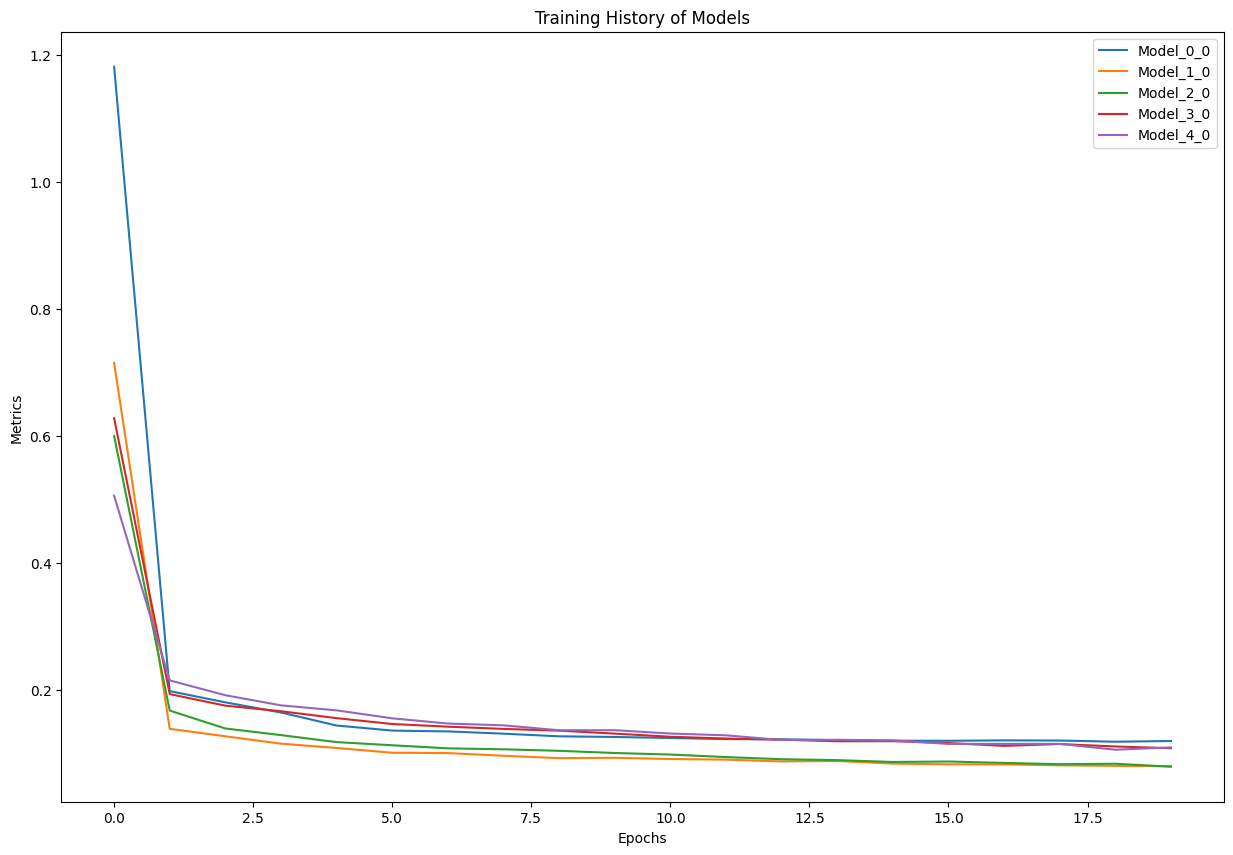

In [153]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(expander_gas_temp_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(expander_gas_temp_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(expander_gas_temp_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(expander_gas_temp_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(expander_gas_temp_4_history.history['loss']).add_prefix('Model_4_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

## Основная модель для определения температуры газа после детандера

In [163]:
## Тестовая и обучающая выборки
X = expander_gas_temp_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3',  'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
]]

y = expander_gas_temp_data[[
    '3 temperature, C',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3',  'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((506600, 15), (506600, 1))

In [164]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_history = expander_gas_temp_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.3696 - mae: 0.3696
Epoch 2/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.1218 - mae: 0.1218
Epoch 3/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.1067 - mae: 0.1067
Epoch 4/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1009 - mae: 0.1009
Epoch 5/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.0976 - mae: 0.0976
Epoch 6/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.0900 - mae: 0.0900
Epoch 7/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.0882 - mae: 0.0882
Epoch 8/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.0879 - mae: 0.0879
Epoch 9/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.0826 - mae: 0.0826
Epoch 10/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.0794 - mae: 0.0794

In [165]:
expander_gas_temp_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 3s 829us/step - loss: 0.0467 - mae: 0.0467


[0.046685315668582916, 0.046685315668582916]

In [166]:
y_pred = expander_gas_temp_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 735us/step


In [167]:
y_pred

array([[-27.073673],
       [-43.577312],
       [-18.860289],
       ...,
       [-24.22681 ],
       [-24.027668],
       [-40.26624 ]], dtype=float32)

In [168]:
y_test

,"3 temperature, C"
340638,-27.072841
314613,-43.578510
219439,-18.806303
374434,-24.309590
313146,-31.993621
...,...
239029,-28.518996
417657,-15.436765
162767,-24.242871
343861,-24.021217


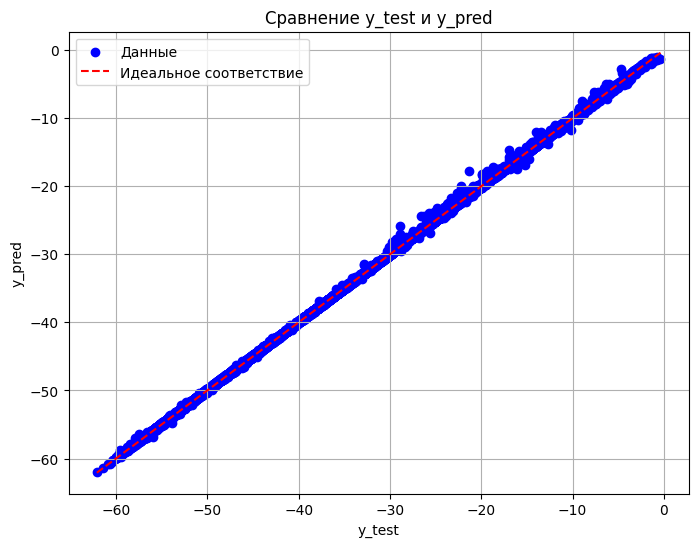

In [169]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [170]:
expander_gas_temp_model.save('./models/low_temp_dist_19_06/expander_gas_temp_model.h5')

# Эксперимент с определением температуры газа после детандера на основе данных исходного газа

In [4]:
experiment_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
     'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 temperature, C', '3 pressure, kPa',
    
]]

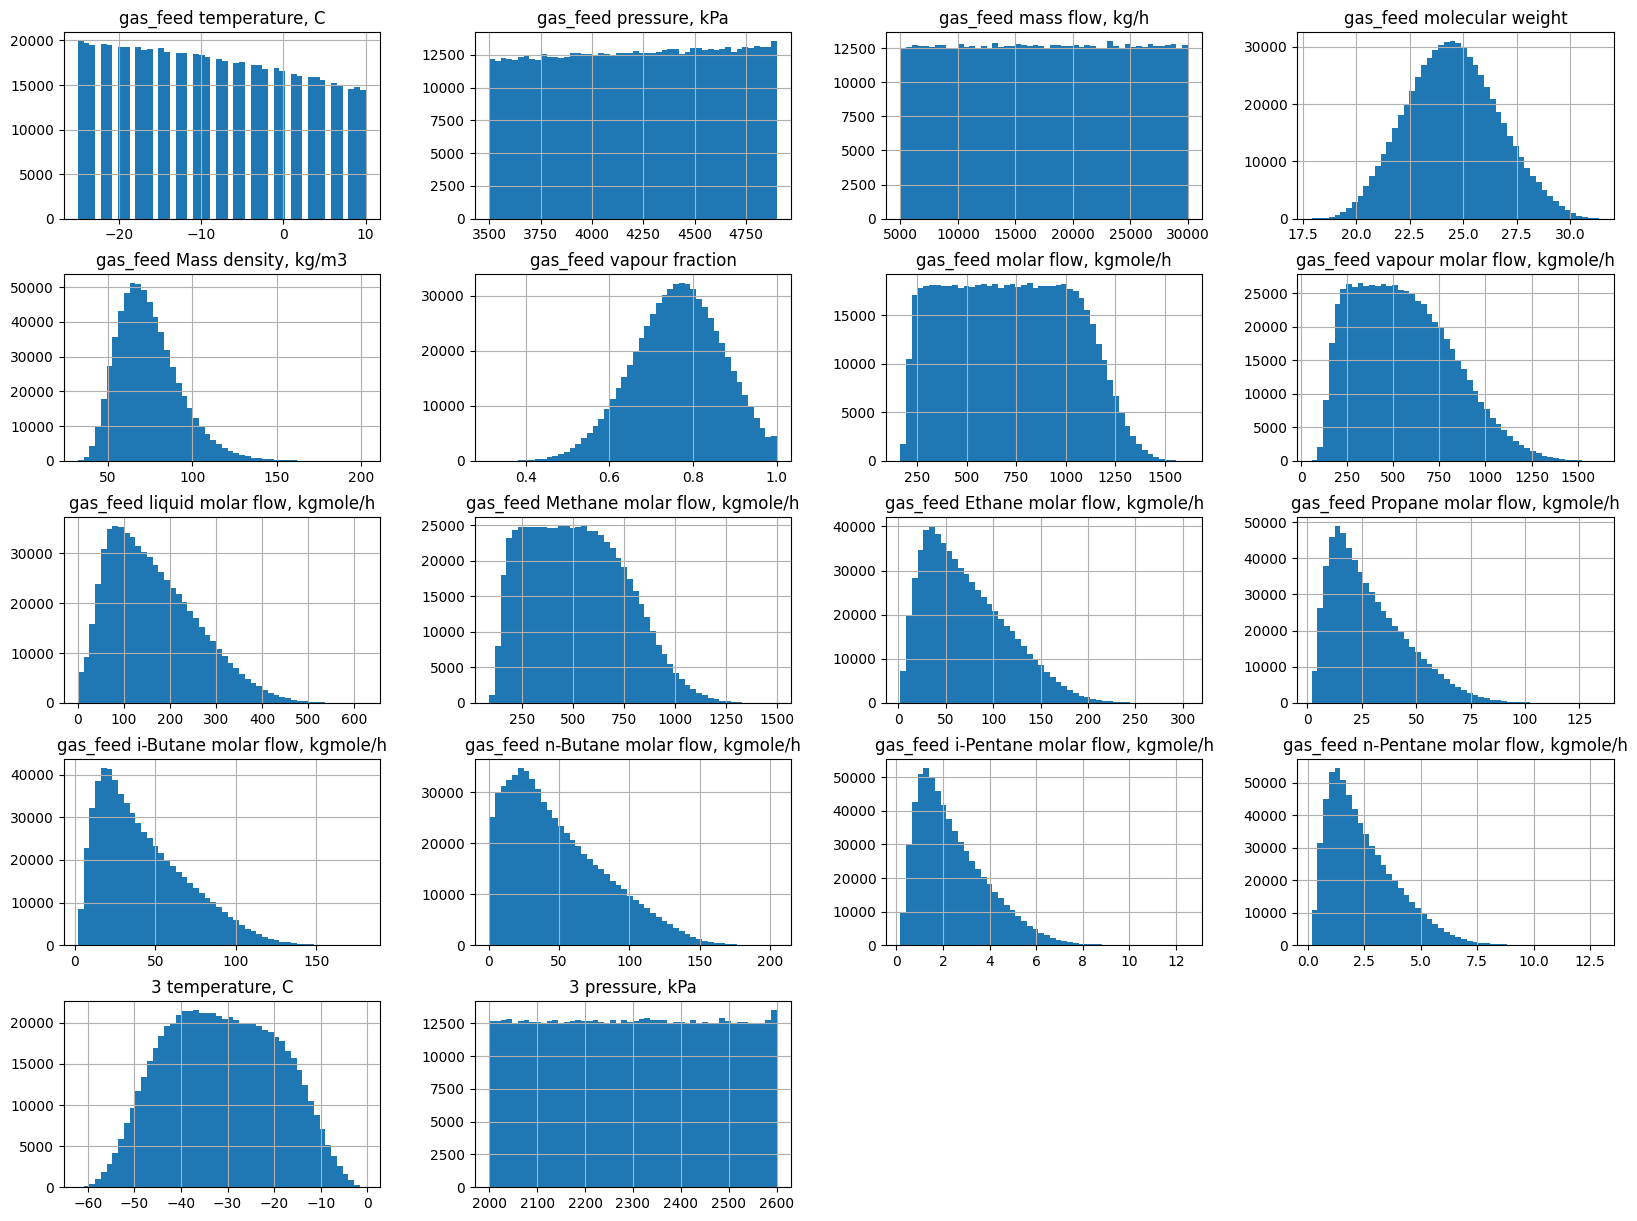

In [5]:
experiment_data.hist(bins=50, figsize=(20, 15));

In [6]:
experimental_data_mini = experiment_data.sample(frac=0.45)

In [7]:
## Тестовая и обучающая выборки
X = experimental_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
     'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
]]

y = experimental_data_mini[[
    '3 temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
     'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/expander_gas_temp_exp.pkl')

X_train_normal.shape, y_train.shape

((227969, 17), (227969, 1))

In [36]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_exp_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_exp_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_exp_0_history = expander_gas_temp_model_exp_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 11s 1ms/step - loss: 1.2919 - mae: 1.2919
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.2653 - mae: 0.2653
Epoch 3/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.2331 - mae: 0.2331
Epoch 4/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.2052 - mae: 0.2052
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1962 - mae: 0.1962
Epoch 6/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1916 - mae: 0.1916
Epoch 7/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1863 - mae: 0.1863
Epoch 8/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1837 - mae: 0.1837
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1799 - mae: 0.1799
Epoch 10/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1655 - mae: 0.1655
Epoch 11/20
7125/7125 [=====

In [37]:
expander_gas_temp_model_exp_0.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 889us/step - loss: 0.1592 - mae: 0.1592


[0.15917834639549255, 0.15917834639549255]

In [38]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_exp_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_exp_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_exp_1_history = expander_gas_temp_model_exp_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.7525 - mae: 0.7525
Epoch 2/20
7125/7125 [==============================] - 7s 1ms/step - loss: 0.1676 - mae: 0.1676
Epoch 3/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1470 - mae: 0.1470
Epoch 4/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1369 - mae: 0.1369
Epoch 5/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1324 - mae: 0.1324
Epoch 6/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1290 - mae: 0.1290
Epoch 7/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1231 - mae: 0.1231
Epoch 8/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1191 - mae: 0.1191
Epoch 9/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1121 - mae: 0.1121
Epoch 10/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1094 - mae: 0.1094
Epoch 11/20
7125/7125 [======

In [39]:
expander_gas_temp_model_exp_1.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 975us/step - loss: 0.2699 - mae: 0.2699


[0.26990100741386414, 0.26990100741386414]

In [40]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_exp_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_exp_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_exp_2_history = expander_gas_temp_model_exp_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.6021 - mae: 0.6021
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1488 - mae: 0.1488
Epoch 3/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1371 - mae: 0.1371
Epoch 4/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1318 - mae: 0.1318
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1226 - mae: 0.1226
Epoch 6/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1157 - mae: 0.1157
Epoch 7/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.1130 - mae: 0.1130
Epoch 8/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1087 - mae: 0.1087
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1079 - mae: 0.1079
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1080 - mae: 0.1080
Epoch 11/20
7125/7125 [======

In [41]:
expander_gas_temp_model_exp_2.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 891us/step - loss: 0.1513 - mae: 0.1513


[0.15130329132080078, 0.15130329132080078]

In [42]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_exp_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_exp_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_exp_3_history = expander_gas_temp_model_exp_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.6898 - mae: 0.6898
Epoch 2/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1979 - mae: 0.1979
Epoch 3/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1800 - mae: 0.1800
Epoch 4/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.1591 - mae: 0.1591
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1537 - mae: 0.1537
Epoch 6/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1501 - mae: 0.1501
Epoch 7/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1414 - mae: 0.1414
Epoch 8/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.1382 - mae: 0.1382
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1372 - mae: 0.1372
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.1300 - mae: 0.1300
Epoch 11/20
7125/7125 [===

In [43]:
expander_gas_temp_model_exp_3.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 3s 2ms/step - loss: 0.0796 - mae: 0.0796


[0.07964666932821274, 0.07964666932821274]

In [44]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_exp_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_exp_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_exp_4_history = expander_gas_temp_model_exp_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.5991 - mae: 0.5991
Epoch 2/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.2430 - mae: 0.2430
Epoch 3/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.2243 - mae: 0.2243
Epoch 4/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.2103 - mae: 0.2103
Epoch 5/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.1925 - mae: 0.1925
Epoch 6/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.1718 - mae: 0.1718
Epoch 7/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.1730 - mae: 0.1730
Epoch 8/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.1601 - mae: 0.1601
Epoch 9/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.1545 - mae: 0.1545
Epoch 10/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.1565 - mae: 0.1565
Epoch 11/20
7125/71

In [45]:
expander_gas_temp_model_exp_4.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 914us/step - loss: 0.1834 - mae: 0.1834


[0.1833641231060028, 0.1833641231060028]

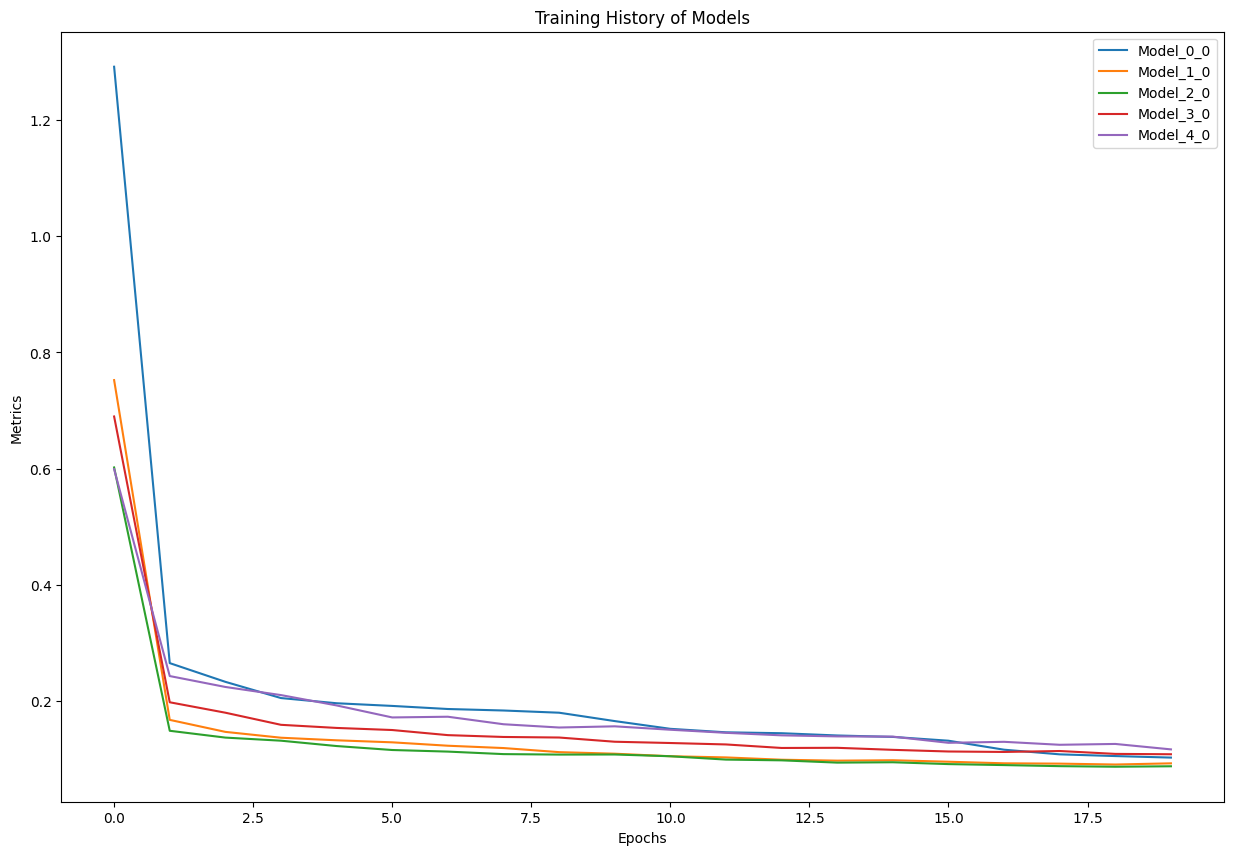

In [46]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(expander_gas_temp_exp_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(expander_gas_temp_exp_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(expander_gas_temp_exp_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(expander_gas_temp_exp_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(expander_gas_temp_exp_4_history.history['loss']).add_prefix('Model_4_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

# Основная модель для определения температуры газа после детандера

In [8]:
## Тестовая и обучающая выборки
X = experiment_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
     'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
]]

y = experiment_data[[
    '3 temperature, C'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
     'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/expander_gas_temp_exp.pkl')

X_train_normal.shape, y_train.shape

((506600, 17), (506600, 1))

In [9]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_gas_temp_model_exp = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_gas_temp_model_exp.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_gas_temp_exp_history = expander_gas_temp_model_exp.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.3966 - mae: 0.3966
Epoch 2/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1251 - mae: 0.1251
Epoch 3/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1120 - mae: 0.1120
Epoch 4/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.1024 - mae: 0.1024
Epoch 5/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.0965 - mae: 0.0965
Epoch 6/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.0907 - mae: 0.0907
Epoch 7/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.0876 - mae: 0.0876
Epoch 8/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.0820 - mae: 0.0820
Epoch 9/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.0817 - mae: 0.0817
Epoch 10/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.0797 - mae: 0.0797

In [10]:
expander_gas_temp_model_exp.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 3s 800us/step - loss: 0.0436 - mae: 0.0436


[0.04358692094683647, 0.04358692094683647]

In [11]:
y_pred = expander_gas_temp_model_exp.predict(X_test_normal)

3958/3958 [==============================] - 3s 620us/step


In [12]:
y_pred

array([[-27.082422],
       [-43.65101 ],
       [-18.733862],
       ...,
       [-24.268042],
       [-23.967443],
       [-40.42871 ]], dtype=float32)

In [13]:
y_test

,"3 temperature, C"
340638,-27.072841
314613,-43.578510
219439,-18.806303
374434,-24.309590
313146,-31.993621
...,...
239029,-28.518996
417657,-15.436765
162767,-24.242871
343861,-24.021217


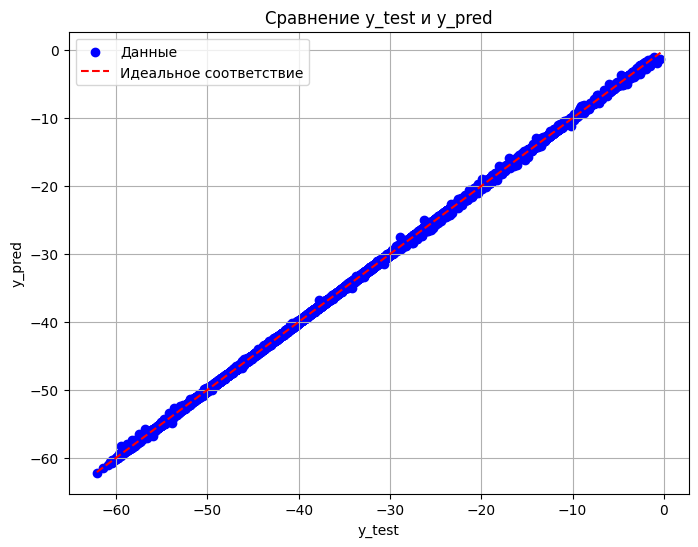

In [14]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
expander_gas_temp_model_exp.save('./models/low_temp_dist_19_06/expander_gas_temp_model_exp.h5')

# Определение мощности детандера

In [16]:
expander_power_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', '3 temperature, C', '3 pressure, kPa',
    'Q-100',
]]

In [17]:
expander_power_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3",gas_feed vapour fraction,"gas_feed molar flow, kgmole/h","gas_feed vapour molar flow, kgmole/h","gas_feed liquid molar flow, kgmole/h","gas_feed Methane molar flow, kgmole/h","gas_feed Ethane molar flow, kgmole/h","gas_feed Propane molar flow, kgmole/h","gas_feed i-Butane molar flow, kgmole/h","gas_feed n-Butane molar flow, kgmole/h","gas_feed i-Pentane molar flow, kgmole/h","gas_feed n-Pentane molar flow, kgmole/h","3 temperature, C","3 pressure, kPa",Q-100
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,0.763452,719.365460,555.003651,164.361809,521.856793,72.068694,28.425303,43.131686,49.303638,2.455704,2.454467,-31.089714,2299.584700,118.925473
std,10.275480,404.079523,7214.000778,2.113006,18.272784,0.104859,303.963663,263.121333,95.856721,235.191165,43.877957,17.573898,27.483898,34.884778,1.511052,1.511232,11.962369,173.374179,62.066795
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,0.312539,164.014283,56.688257,0.000000,89.412526,2.079377,1.909704,2.064457,0.251074,0.173227,0.176087,-62.085922,2000.000000,10.326126
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,0.692753,459.266317,339.657061,88.251201,326.174079,36.782681,14.593052,21.174918,21.462512,1.278634,1.277903,-40.551916,2149.000000,69.971010
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,0.766630,714.255561,528.789015,148.461811,507.099865,63.870318,24.436784,36.925108,41.799937,2.108255,2.106347,-31.359726,2300.000000,109.571746
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,0.838392,969.084648,737.211186,226.409495,694.158344,100.572114,39.032780,60.302306,71.589470,3.347614,3.344023,-21.602613,2450.000000,157.201062
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1.000000,1617.505790,1617.505790,625.241457,1500.604067,305.446234,134.065145,180.561015,204.949783,12.523596,12.909486,-0.384276,2600.000000,491.957005


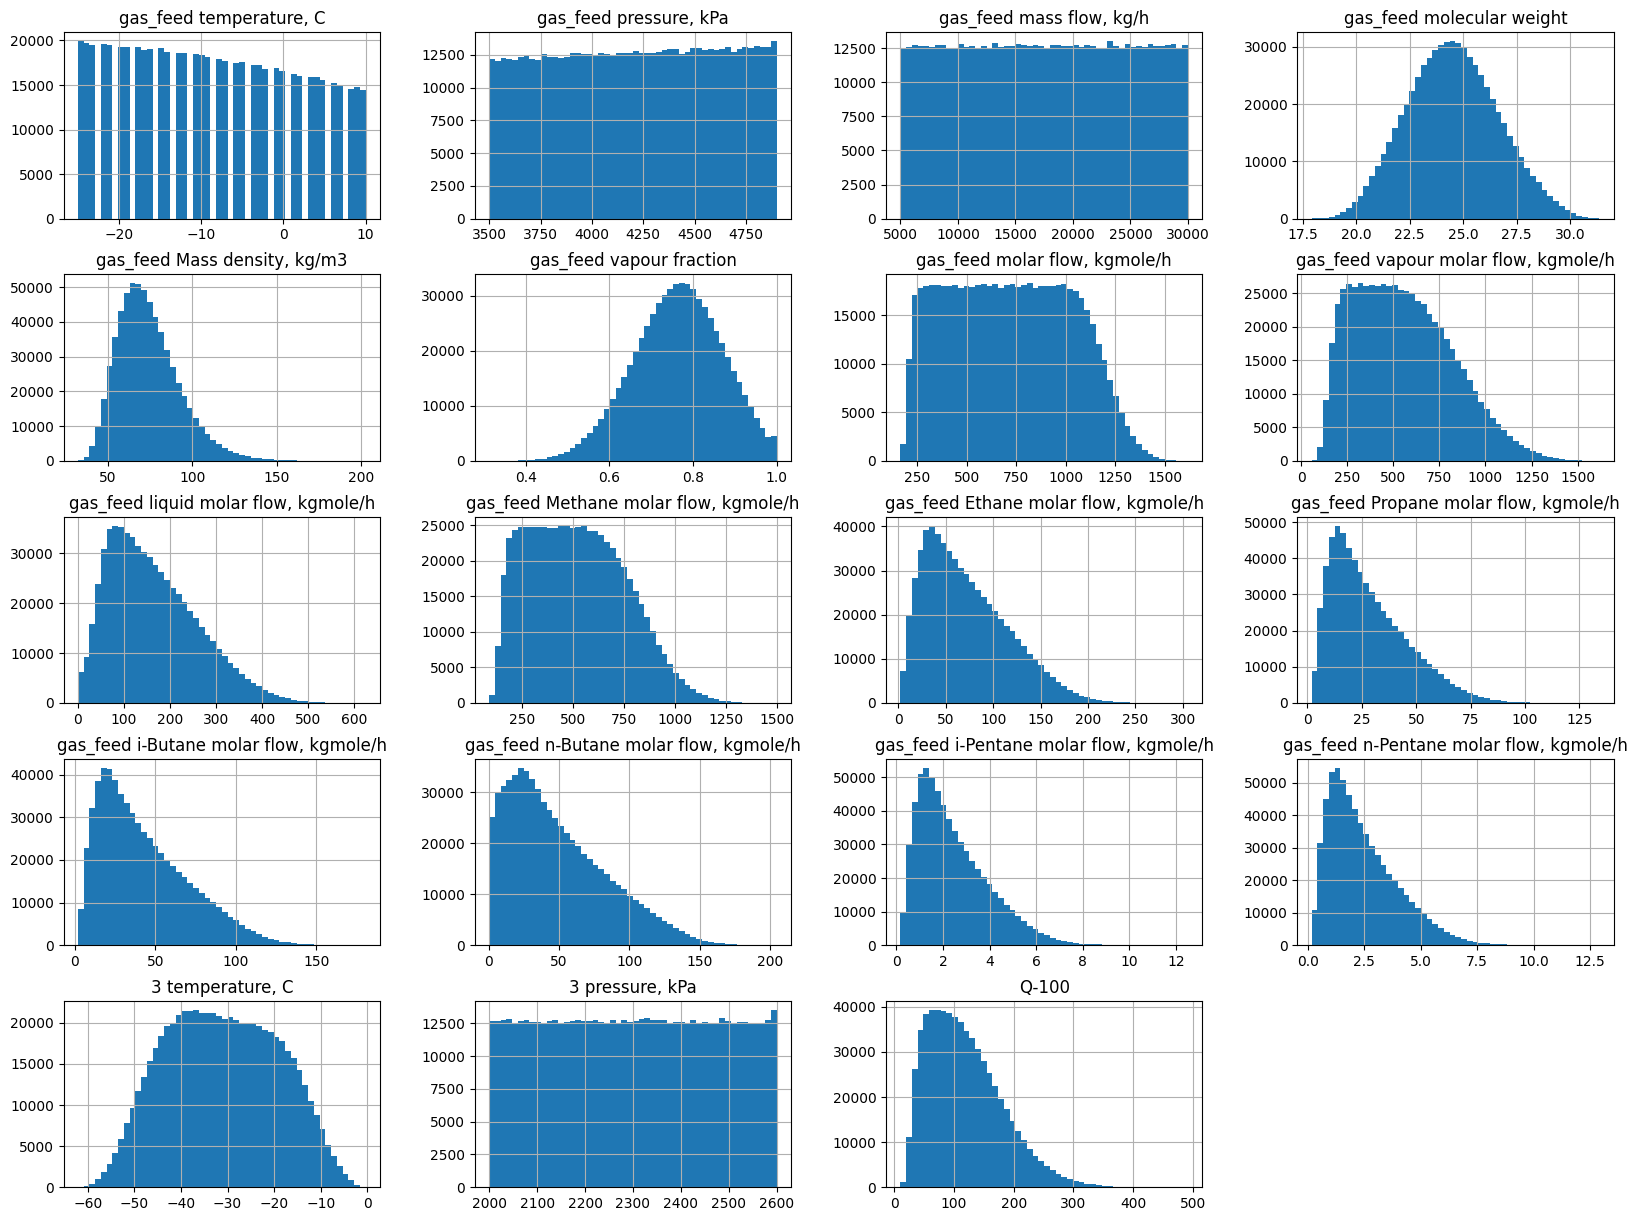

In [18]:
expander_power_data.hist(bins=50, figsize=(20, 15));

In [19]:
expander_power_data_mini = expander_power_data.sample(frac=0.45)

In [20]:
## Тестовая и обучающая выборки
X = expander_power_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', '3 temperature, C', '3 pressure, kPa',
    
]]

y = expander_power_data_mini[[
    'Q-100',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', '3 temperature, C', '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((227969, 18), (227969, 1))

In [76]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_power_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_power_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_power_model_0_history = expander_power_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 9s 1ms/step - loss: 7.3447 - mae: 7.3447
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 1.3014 - mae: 1.3014
Epoch 3/20
7125/7125 [==============================] - 8s 1ms/step - loss: 1.1413 - mae: 1.1413
Epoch 4/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.9636 - mae: 0.9636
Epoch 5/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.8781 - mae: 0.8781
Epoch 6/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.8149 - mae: 0.8149
Epoch 7/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.7750 - mae: 0.7750
Epoch 8/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.7385 - mae: 0.7385
Epoch 9/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.7048 - mae: 0.7048
Epoch 10/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.6799 - mae: 0.6799
Epoch 11/20
7125/7125 [======

In [77]:
expander_power_model_0.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 1s 776us/step - loss: 0.4559 - mae: 0.4559


[0.4558701515197754, 0.4558701515197754]

In [78]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_power_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_power_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_power_model_1_history = expander_power_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 8s 1ms/step - loss: 4.2525 - mae: 4.2525
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.8549 - mae: 0.8549
Epoch 3/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.6843 - mae: 0.6843
Epoch 4/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.5706 - mae: 0.5706
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5101 - mae: 0.5101
Epoch 6/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.4718 - mae: 0.4718
Epoch 7/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.4432 - mae: 0.4432
Epoch 8/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.4284 - mae: 0.4284
Epoch 9/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.4151 - mae: 0.4151
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4075 - mae: 0.4075
Epoch 11/20
7125/7125 [======

In [79]:
expander_power_model_1.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 967us/step - loss: 0.8510 - mae: 0.8510


[0.8510473370552063, 0.8510473370552063]

In [80]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_power_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_power_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_power_model_2_history = expander_power_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 10s 1ms/step - loss: 2.9983 - mae: 2.9983
Epoch 2/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.9524 - mae: 0.9524
Epoch 3/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.8053 - mae: 0.8053
Epoch 4/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.7192 - mae: 0.7192
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.6791 - mae: 0.6791
Epoch 6/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.6203 - mae: 0.6203
Epoch 7/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5953 - mae: 0.5953
Epoch 8/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5668 - mae: 0.5668
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5371 - mae: 0.5371
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5027 - mae: 0.5027
Epoch 11/20
7125/7125 [===

In [81]:
expander_power_model_2.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 937us/step - loss: 0.8572 - mae: 0.8572


[0.8572039008140564, 0.8572039008140564]

In [82]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_power_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_power_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_power_model_3_history = expander_power_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 11s 1ms/step - loss: 2.6489 - mae: 2.6489
Epoch 2/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.8409 - mae: 0.8409
Epoch 3/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.7876 - mae: 0.7876
Epoch 4/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.7100 - mae: 0.7100
Epoch 5/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.6512 - mae: 0.6512
Epoch 6/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.6174 - mae: 0.6174
Epoch 7/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.5895 - mae: 0.5895
Epoch 8/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.5925 - mae: 0.5925
Epoch 9/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.5777 - mae: 0.5777
Epoch 10/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.5674 - mae: 0.5674
Epoch 11/20
7125/71

In [83]:
expander_power_model_3.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 839us/step - loss: 0.4928 - mae: 0.4928


[0.4928138554096222, 0.4928138554096222]

In [84]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_power_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_power_model_4.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_power_model_4_history = expander_power_model_4.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 9s 1ms/step - loss: 3.4650 - mae: 3.4650
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 0.6811 - mae: 0.6811
Epoch 3/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.6163 - mae: 0.6163
Epoch 4/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5794 - mae: 0.5794
Epoch 5/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.5658 - mae: 0.5658
Epoch 6/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.5281 - mae: 0.5281
Epoch 7/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4772 - mae: 0.4772
Epoch 8/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4562 - mae: 0.4562
Epoch 9/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4571 - mae: 0.4571
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.4509 - mae: 0.4509
Epoch 11/20
7125/7125 [=====

In [85]:
expander_power_model_4.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 980us/step - loss: 0.3904 - mae: 0.3904


[0.3904206156730652, 0.3904206156730652]

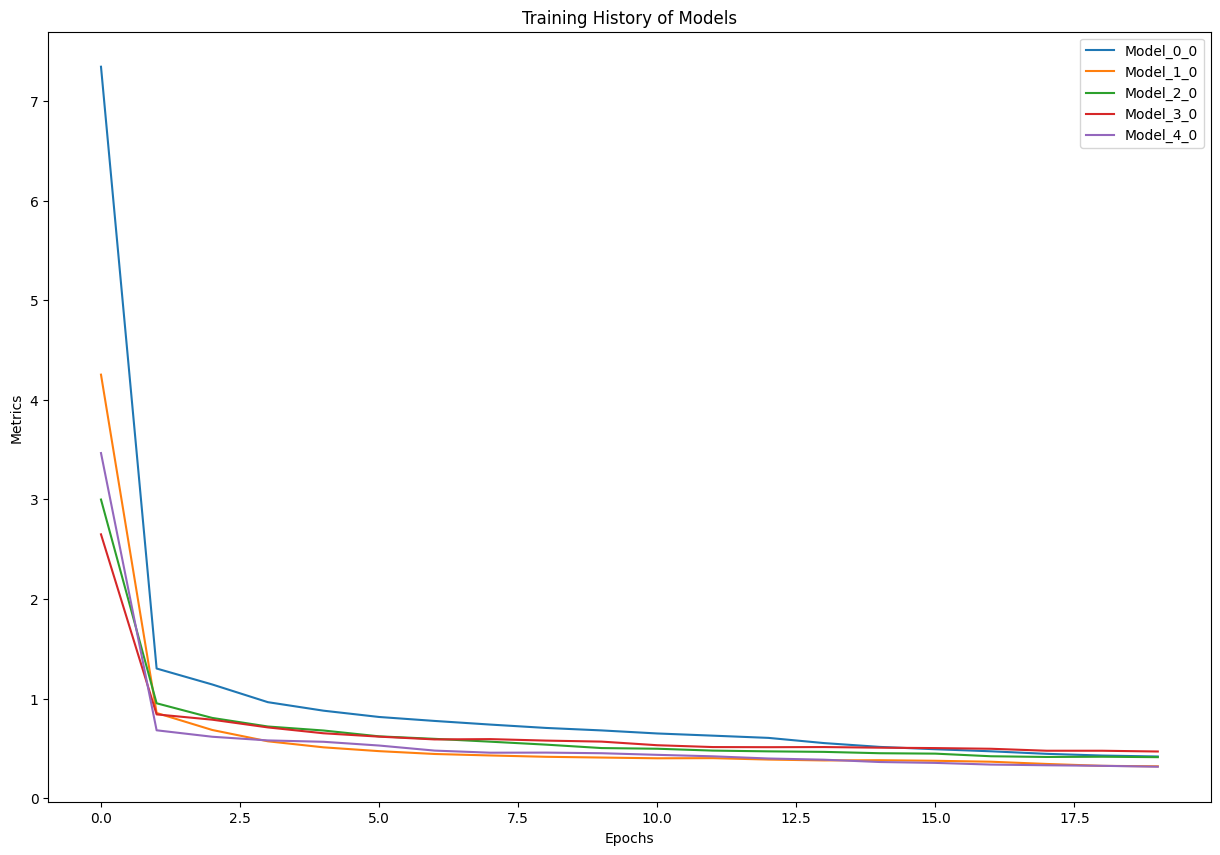

In [86]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(expander_power_model_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(expander_power_model_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(expander_power_model_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(expander_power_model_3_history.history['loss']).add_prefix('Model_3_')
history_4_df = pd.DataFrame(expander_power_model_4_history.history['loss']).add_prefix('Model_4_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df, history_4_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

# Основная модель для определения мощности детандера

In [21]:
## Тестовая и обучающая выборки
X = expander_power_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', '3 temperature, C', '3 pressure, kPa',
    
]]

y = expander_power_data[[
    'Q-100',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', '3 temperature, C', '3 pressure, kPa',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/expander_power_tranformer.pkl')


X_train_normal.shape, y_train.shape

((506600, 18), (506600, 1))

In [22]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
expander_power_model = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
expander_power_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
expander_power_model_history = expander_power_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 16s 1000us/step - loss: 2.1123 - mae: 2.1123
Epoch 2/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.7300 - mae: 0.7300
Epoch 3/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.5456 - mae: 0.5456
Epoch 4/30
15832/15832 [==============================] - 18s 1ms/step - loss: 0.4771 - mae: 0.4771
Epoch 5/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.4543 - mae: 0.4543
Epoch 6/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.4398 - mae: 0.4398
Epoch 7/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.4205 - mae: 0.4205
Epoch 8/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.3965 - mae: 0.3965
Epoch 9/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.3767 - mae: 0.3767
Epoch 10/30
15832/15832 [==============================] - 19s 1ms/step - loss: 0.3608 - mae: 0.3

In [23]:
expander_power_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 3s 858us/step - loss: 0.4955 - mae: 0.4955


[0.49550366401672363, 0.49550366401672363]

In [24]:
y_pred = expander_power_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 697us/step


In [25]:
y_pred

array([[ 75.075905],
       [157.25894 ],
       [110.66654 ],
       ...,
       [ 98.009384],
       [124.47701 ],
       [110.198654]], dtype=float32)

In [26]:
y_test

,Q-100
340638,74.604045
314613,156.649740
219439,110.215694
374434,71.275110
313146,73.419738
...,...
239029,48.122666
417657,282.600578
162767,97.238898
343861,124.253107


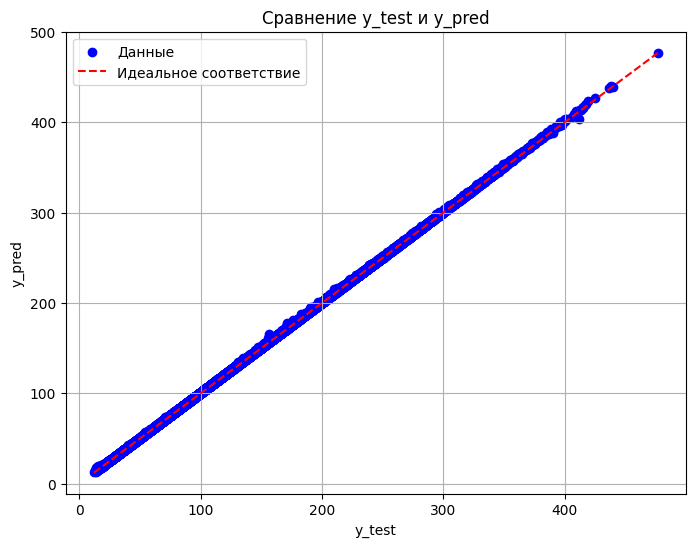

In [27]:
# Диаграмма разброса с линией идеального соответствия

y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Данные')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Идеальное соответствие')
plt.title('Сравнение y_test и y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
expander_power_model.save('./models/low_temp_dist_19_06/expander_power_model.h5')

# Определяем мольные расходы компонентов верхнего продукта колонны

In [113]:
column_top_prod_comp_molar_flow_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction',
    'gas_feed molar flow, kgmole/h', 'Comp Fraction', 'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
    '16 Methane molar flow, kgmole/h', '16 Ethane molar flow, kgmole/h', '16 Propane molar flow, kgmole/h',
    '16 i-Butane molar flow, kgmole/h', '16 n-Butane molar flow, kgmole/h', '16 i-Pentane molar flow, kgmole/h',
    '16 n-Pentane molar flow, kgmole/h',
]]

In [114]:
column_top_prod_comp_molar_flow_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3",gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",Comp Fraction,"gas_feed vapour molar flow, kgmole/h","gas_feed liquid molar flow, kgmole/h",...,"gas_feed n-Butane molar flow, kgmole/h","gas_feed i-Pentane molar flow, kgmole/h","gas_feed n-Pentane molar flow, kgmole/h","16 Methane molar flow, kgmole/h","16 Ethane molar flow, kgmole/h","16 Propane molar flow, kgmole/h","16 i-Butane molar flow, kgmole/h","16 n-Butane molar flow, kgmole/h","16 i-Pentane molar flow, kgmole/h","16 n-Pentane molar flow, kgmole/h"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,...,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,0.763452,719.365460,0.068997,555.003651,164.361809,...,49.303638,2.455704,2.454467,518.234842,59.328740,11.100613,6.930657,4.696735,0.086071,0.053559
std,10.275480,404.079523,7214.000778,2.113006,18.272784,0.104859,303.963663,0.037594,263.121333,95.856721,...,34.884778,1.511052,1.511232,234.026118,39.480371,8.576358,6.198573,4.432537,0.153318,0.110807
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,0.312539,164.014283,0.010000,56.688257,0.000000,...,0.251074,0.173227,0.176087,86.943051,1.146627,0.300626,0.094758,0.009460,0.000000,0.000000
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,0.692753,459.266317,0.037095,339.657061,88.251201,...,21.462512,1.278634,1.277903,323.671631,28.406264,5.021272,2.706814,1.629371,0.017215,0.008998
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,0.766630,714.255561,0.064982,528.789015,148.461811,...,41.799937,2.108255,2.106347,503.199622,50.632009,8.755452,5.038780,3.300410,0.039581,0.021815
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,0.838392,969.084648,0.097895,737.211186,226.409495,...,71.589470,3.347614,3.344023,689.053795,82.669920,14.651331,9.068727,6.291417,0.092947,0.054619
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,1.000000,1617.505790,0.150000,1617.505790,625.241457,...,204.949783,12.523596,12.909486,1498.856254,291.889104,94.177258,90.271427,95.211548,5.481649,6.185272


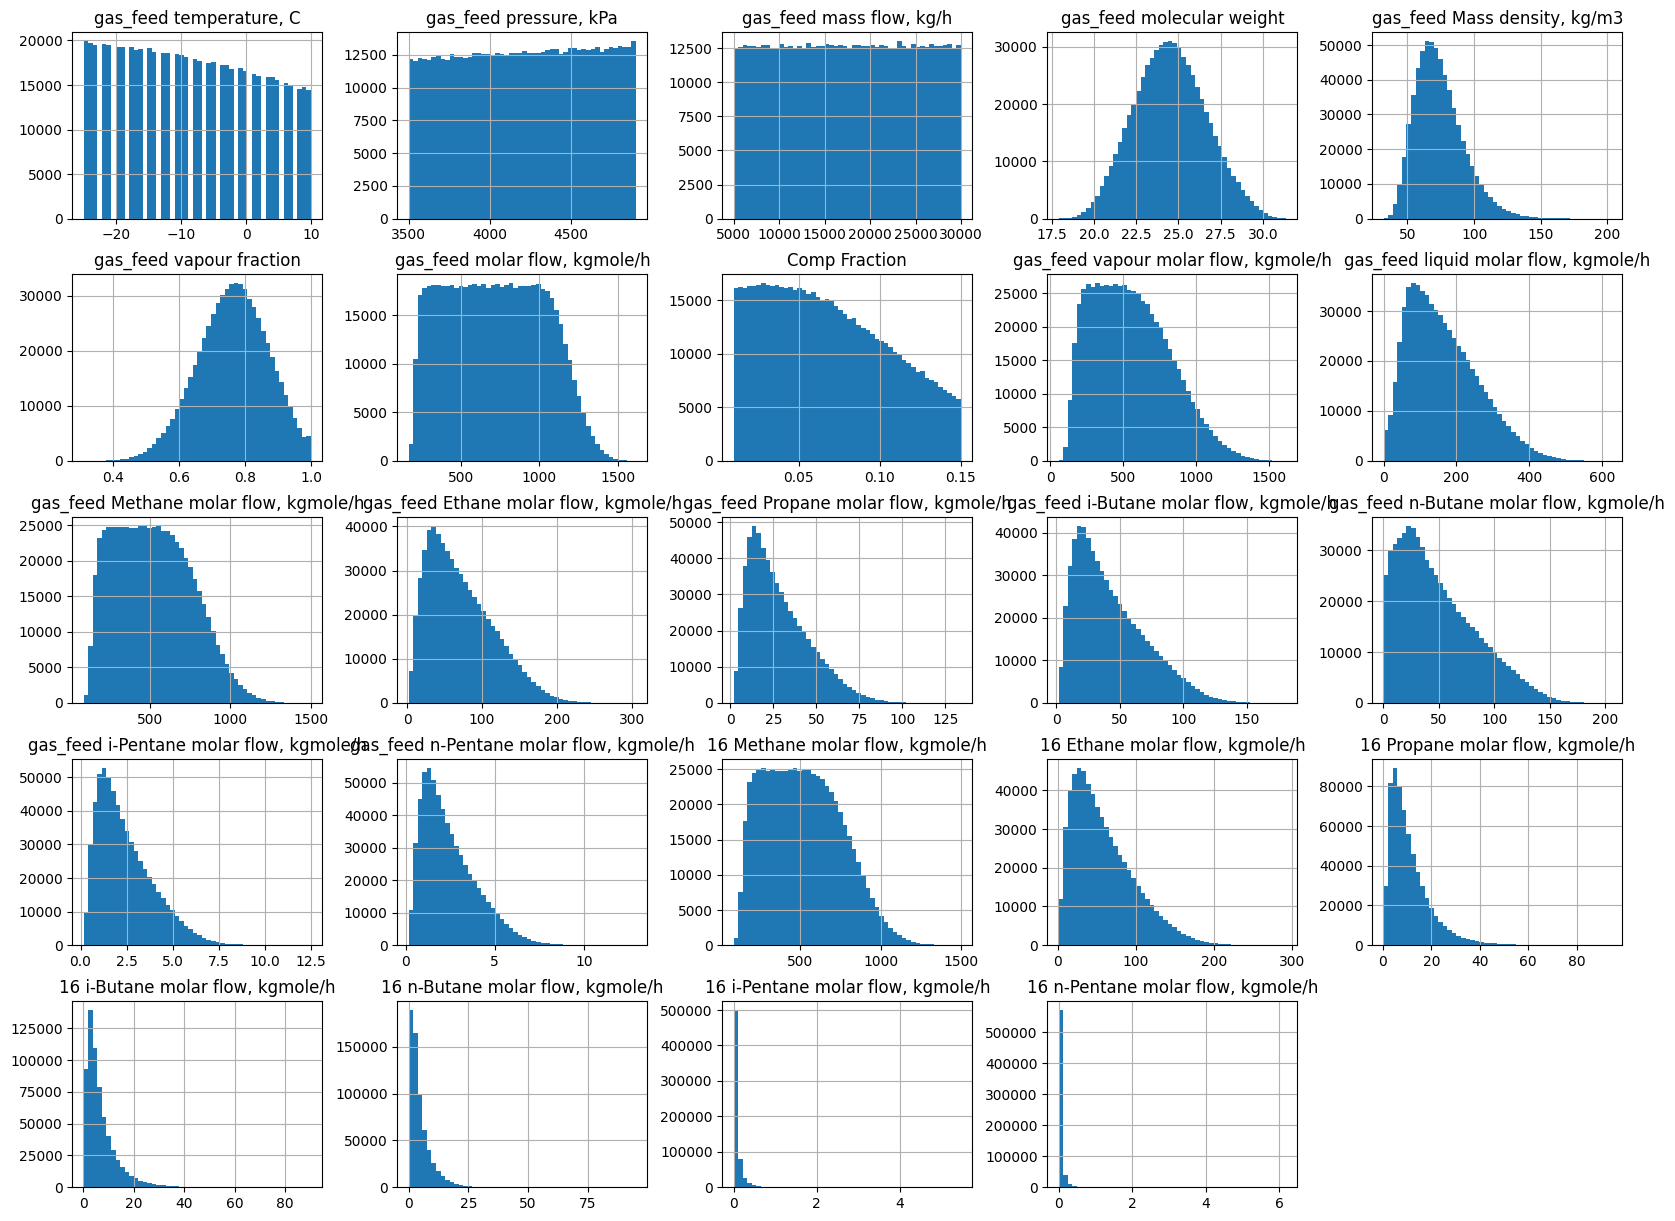

In [115]:
column_top_prod_comp_molar_flow_data.hist(bins=50, figsize=(20, 15));

In [116]:
corr_matrix = column_top_prod_comp_molar_flow_data.corr()

corr_matrix['16 Methane molar flow, kgmole/h'].sort_values(ascending=False)

16 Methane molar flow, kgmole/h            1.000000
gas_feed Methane molar flow, kgmole/h      0.999556
gas_feed vapour molar flow, kgmole/h       0.982594
gas_feed molar flow, kgmole/h              0.978436
gas_feed mass flow, kg/h                   0.911975
gas_feed n-Pentane molar flow, kgmole/h    0.654841
gas_feed i-Pentane molar flow, kgmole/h    0.654671
16 Propane molar flow, kgmole/h            0.607018
gas_feed Propane molar flow, kgmole/h      0.604562
gas_feed Ethane molar flow, kgmole/h       0.566527
16 Ethane molar flow, kgmole/h             0.555158
16 i-Butane molar flow, kgmole/h           0.490621
gas_feed i-Butane molar flow, kgmole/h     0.486408
gas_feed liquid molar flow, kgmole/h       0.405476
16 n-Butane molar flow, kgmole/h           0.380482
16 i-Pentane molar flow, kgmole/h          0.359350
gas_feed n-Butane molar flow, kgmole/h     0.333037
gas_feed vapour fraction                   0.326706
16 n-Pentane molar flow, kgmole/h          0.321366
gas_feed pre

In [117]:
column_top_prod_comp_molar_flow_data_mini = column_top_prod_comp_molar_flow_data.sample(frac=0.45)

In [118]:
## Тестовая и обучающая выборки
X = column_top_prod_comp_molar_flow_data_mini[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction',
    'gas_feed molar flow, kgmole/h', 'Comp Fraction', 'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
]]

y = column_top_prod_comp_molar_flow_data_mini[[
    '16 Methane molar flow, kgmole/h', '16 Ethane molar flow, kgmole/h', '16 Propane molar flow, kgmole/h',
    '16 i-Butane molar flow, kgmole/h', '16 n-Butane molar flow, kgmole/h', '16 i-Pentane molar flow, kgmole/h',
    '16 n-Pentane molar flow, kgmole/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction',
    'gas_feed molar flow, kgmole/h', 'Comp Fraction', 'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

joblib.dump(ct, './column_transformers/low_temp_dist/column_top_prod_comp_molar_flow_transformer.pkl')


X_train_normal.shape, y_train.shape

((227969, 17), (227969, 7))

In [119]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_model_0_history = col_top_prod_comp_molar_flow_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 9s 1ms/step - loss: 5.5520 - mae: 5.5520
Epoch 2/20
7125/7125 [==============================] - 8s 1ms/step - loss: 1.5907 - mae: 1.5907
Epoch 3/20
7125/7125 [==============================] - 8s 1ms/step - loss: 1.2531 - mae: 1.2531
Epoch 4/20
7125/7125 [==============================] - 9s 1ms/step - loss: 1.1549 - mae: 1.1549
Epoch 5/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.9920 - mae: 0.9920
Epoch 6/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.8557 - mae: 0.8557
Epoch 7/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.7806 - mae: 0.7806
Epoch 8/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.7304 - mae: 0.7304
Epoch 9/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.6903 - mae: 0.6903
Epoch 10/20
7125/7125 [==============================] - 9s 1ms/step - loss: 0.6528 - mae: 0.6528
Epoch 11/20
7125/7125 [===

In [120]:
col_top_prod_comp_molar_flow_model_0.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 867us/step - loss: 0.5082 - mae: 0.5082


[0.5081704258918762, 0.5081704258918762]

In [121]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_model_1_history = col_top_prod_comp_molar_flow_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 10s 1ms/step - loss: 5.1812 - mae: 5.1812
Epoch 2/20
7125/7125 [==============================] - 10s 1ms/step - loss: 1.5882 - mae: 1.5882
Epoch 3/20
7125/7125 [==============================] - 13s 2ms/step - loss: 1.2087 - mae: 1.2087
Epoch 4/20
7125/7125 [==============================] - 11s 2ms/step - loss: 1.0565 - mae: 1.0565
Epoch 5/20
7125/7125 [==============================] - 11s 1ms/step - loss: 0.8942 - mae: 0.8942
Epoch 6/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.8103 - mae: 0.8103
Epoch 7/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.7619 - mae: 0.7619
Epoch 8/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.7216 - mae: 0.7216
Epoch 9/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.6914 - mae: 0.6914
Epoch 10/20
7125/7125 [==============================] - 10s 1ms/step - loss: 0.6512 - mae: 0.6512
Epoch 11/20
7125/71

In [122]:
col_top_prod_comp_molar_flow_model_1.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 959us/step - loss: 0.5037 - mae: 0.5037


[0.503670871257782, 0.503670871257782]

In [123]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_model_2_history = col_top_prod_comp_molar_flow_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 13s 2ms/step - loss: 4.5506 - mae: 4.5506
Epoch 2/20
7125/7125 [==============================] - 12s 2ms/step - loss: 1.5900 - mae: 1.5900
Epoch 3/20
7125/7125 [==============================] - 13s 2ms/step - loss: 0.9484 - mae: 0.9484
Epoch 4/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.8798 - mae: 0.8798
Epoch 5/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.8123 - mae: 0.8123
Epoch 6/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.7799 - mae: 0.7799
Epoch 7/20
7125/7125 [==============================] - 11s 2ms/step - loss: 0.7596 - mae: 0.7596
Epoch 8/20
7125/7125 [==============================] - 13s 2ms/step - loss: 0.7270 - mae: 0.7270
Epoch 9/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.7112 - mae: 0.7112
Epoch 10/20
7125/7125 [==============================] - 12s 2ms/step - loss: 0.6818 - mae: 0.6818
Epoch 11/20
7125/71

In [124]:
col_top_prod_comp_molar_flow_model_2.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 1ms/step - loss: 0.8505 - mae: 0.8505


[0.8504825234413147, 0.8504825234413147]

In [125]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model_3.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_model_3_history = col_top_prod_comp_molar_flow_model_3.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7125/7125 [==============================] - 19s 3ms/step - loss: 4.1412 - mae: 4.1412
Epoch 2/20
7125/7125 [==============================] - 18s 3ms/step - loss: 1.5840 - mae: 1.5840
Epoch 3/20
7125/7125 [==============================] - 19s 3ms/step - loss: 1.0008 - mae: 1.0008
Epoch 4/20
7125/7125 [==============================] - 18s 3ms/step - loss: 0.9037 - mae: 0.9037
Epoch 5/20
7125/7125 [==============================] - 18s 3ms/step - loss: 0.8777 - mae: 0.8777
Epoch 6/20
7125/7125 [==============================] - 17s 2ms/step - loss: 0.8164 - mae: 0.8164
Epoch 7/20
7125/7125 [==============================] - 17s 2ms/step - loss: 0.7758 - mae: 0.7758
Epoch 8/20
7125/7125 [==============================] - 17s 2ms/step - loss: 0.7558 - mae: 0.7558
Epoch 9/20
7125/7125 [==============================] - 17s 2ms/step - loss: 0.7297 - mae: 0.7297
Epoch 10/20
7125/7125 [==============================] - 18s 3ms/step - loss: 0.6990 - mae: 0.6990
Epoch 11/20
7125/71

In [126]:
col_top_prod_comp_molar_flow_model_3.evaluate(X_test_normal, y_test)

1782/1782 [==============================] - 2s 1ms/step - loss: 0.5089 - mae: 0.5089


[0.5089358687400818, 0.5089358687400818]

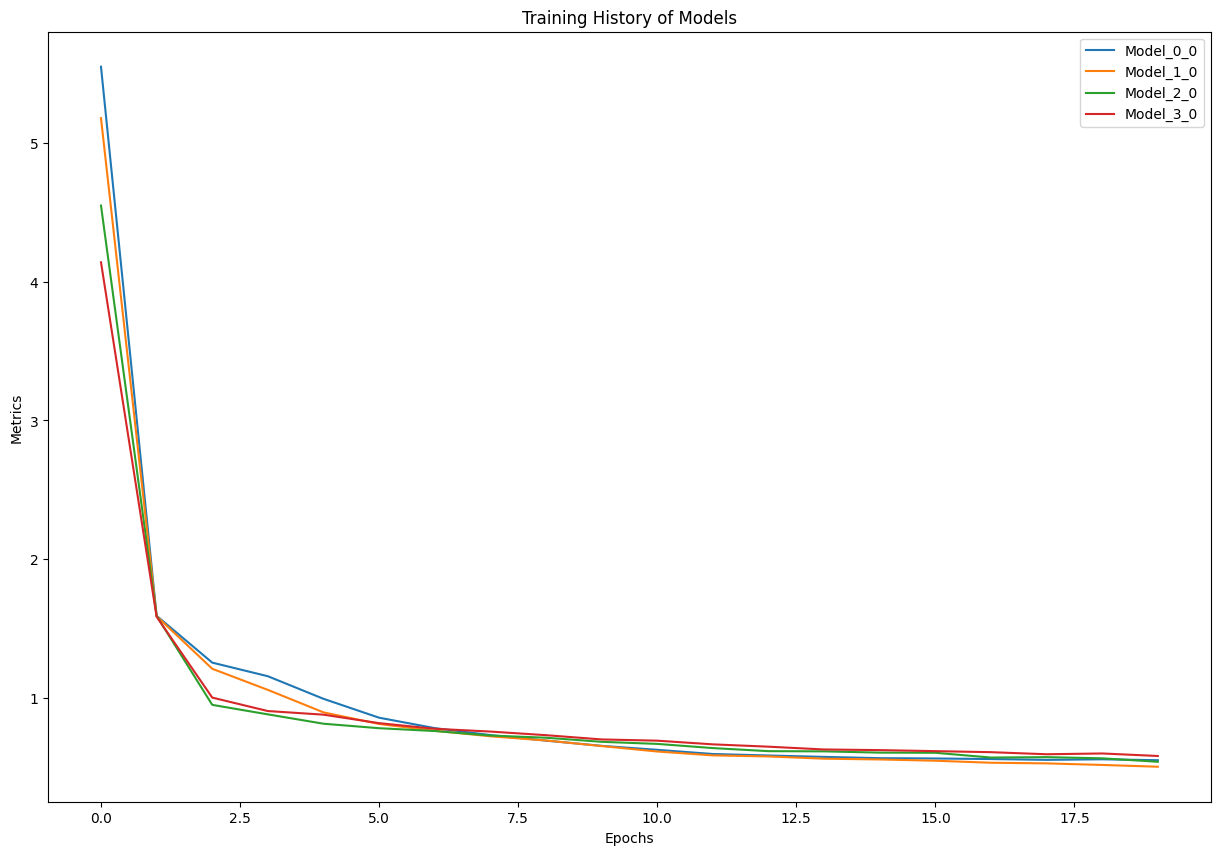

In [127]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(col_top_prod_comp_molar_flow_model_0_history.history['loss']).add_prefix('Model_0_')
history_1_df = pd.DataFrame(col_top_prod_comp_molar_flow_model_1_history.history['loss']).add_prefix('Model_1_')
history_2_df = pd.DataFrame(col_top_prod_comp_molar_flow_model_2_history.history['loss']).add_prefix('Model_2_')
history_3_df = pd.DataFrame(col_top_prod_comp_molar_flow_model_3_history.history['loss']).add_prefix('Model_3_')


# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df, history_3_df], axis=1)

# Построение графика
combined_df.plot(figsize=(15, 10), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

# Основная модель для определения молярных расходов компонентов верхнего продукта разделения колонны

In [129]:
## Тестовая и обучающая выборки
X = column_top_prod_comp_molar_flow_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction',
    'gas_feed molar flow, kgmole/h', 'Comp Fraction', 'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
]]

y = column_top_prod_comp_molar_flow_data[[
    '16 Methane molar flow, kgmole/h', '16 Ethane molar flow, kgmole/h', '16 Propane molar flow, kgmole/h',
    '16 i-Butane molar flow, kgmole/h', '16 n-Butane molar flow, kgmole/h', '16 i-Pentane molar flow, kgmole/h',
    '16 n-Pentane molar flow, kgmole/h'
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction',
    'gas_feed molar flow, kgmole/h', 'Comp Fraction', 'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train_normal.shape, y_train.shape

((506600, 17), (506600, 7))

In [130]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
col_top_prod_comp_molar_flow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7)
])

# 2. Compile the model
col_top_prod_comp_molar_flow_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
col_top_prod_comp_molar_flow_model_history = col_top_prod_comp_molar_flow_model.fit(X_train_normal, y_train, epochs=30)

Epoch 1/30
15832/15832 [==============================] - 20s 1ms/step - loss: 3.4920 - mae: 3.4920
Epoch 2/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.9183 - mae: 0.9183
Epoch 3/30
15832/15832 [==============================] - 20s 1ms/step - loss: 0.7789 - mae: 0.7789
Epoch 4/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.7002 - mae: 0.7002
Epoch 5/30
15832/15832 [==============================] - 21s 1ms/step - loss: 0.6475 - mae: 0.6475
Epoch 6/30
15832/15832 [==============================] - 23s 1ms/step - loss: 0.6211 - mae: 0.6211
Epoch 7/30
15832/15832 [==============================] - 24s 1ms/step - loss: 0.6025 - mae: 0.6025
Epoch 8/30
15832/15832 [==============================] - 23s 1ms/step - loss: 0.5781 - mae: 0.5781
Epoch 9/30
15832/15832 [==============================] - 25s 2ms/step - loss: 0.5599 - mae: 0.5599
Epoch 10/30
15832/15832 [==============================] - 23s 1ms/step - loss: 0.5460 - mae: 0.5460

In [131]:
col_top_prod_comp_molar_flow_model.evaluate(X_test_normal, y_test)

3958/3958 [==============================] - 4s 920us/step - loss: 0.3471 - mae: 0.3471


[0.3470848500728607, 0.3470848500728607]

In [132]:
y_pred = col_top_prod_comp_molar_flow_model.predict(X_test_normal)

3958/3958 [==============================] - 3s 701us/step


In [133]:
x = 687
y_pred[x]

array([ 4.6704065e+02,  1.0546440e+02,  9.4531641e+00,  5.2071457e+00,
        5.0279412e+00, -1.0101883e-01,  1.2633693e-01], dtype=float32)

In [134]:
y_test.iloc[x]

16 Methane molar flow, kgmole/h      467.361070
16 Ethane molar flow, kgmole/h       105.519779
16 Propane molar flow, kgmole/h        9.352620
16 i-Butane molar flow, kgmole/h       5.064399
16 n-Butane molar flow, kgmole/h       5.362915
16 i-Pentane molar flow, kgmole/h      0.010028
16 n-Pentane molar flow, kgmole/h      0.018930
Name: 333279, dtype: float64

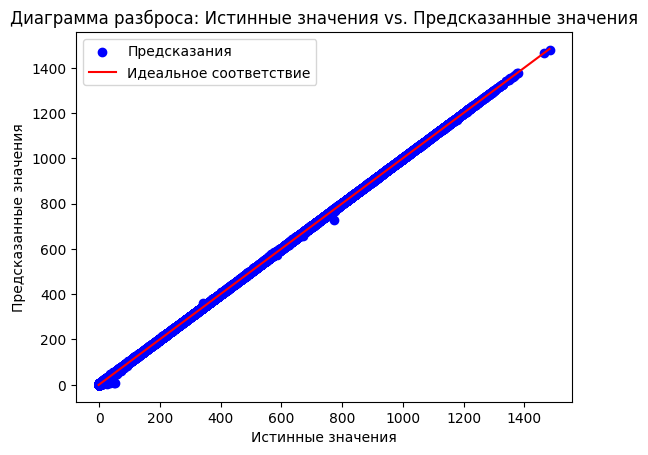

In [135]:
plot_scatter_with_ideal_line(y_pred, np.array(y_test))

In [136]:
col_top_prod_comp_molar_flow_model.save('./models/low_temp_dist_19_06/col_top_prod_comp_molar_flow_model.h5')

# Проверка моделей

In [165]:
input_data = pd.DataFrame({
    'gas_feed temperature, C': [-5],
    'gas_feed pressure, kPa': [4000],
    'gas_feed mass flow, kg/h': [25000],
    'gas_feed Methane mass frac': [0.2792],
    'gas_feed Ethane mass frac': [0.1236],
    'gas_feed Propane mass frac': [0.1820],
    'gas_feed i-Butane mass frac': [0.2253],
    'gas_feed n-Butane mass frac': [0.1820],
    'gas_feed i-Pentane mass frac': [0.0056],
    'gas_feed n-Pentane mass frac': [0.0023],
    'Comp Fraction': [0.02],
    '3 pressure, kPa': [2072]
})

input_data['gas_feed Methane mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] * input_data['gas_feed Methane mass frac']
input_data['gas_feed Ethane mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] * input_data['gas_feed Ethane mass frac']
input_data['gas_feed Propane mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] * input_data['gas_feed Propane mass frac']
input_data['gas_feed i-Butane mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] * input_data['gas_feed i-Butane mass frac']
input_data['gas_feed n-Butane mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] * input_data['gas_feed n-Butane mass frac']
input_data['gas_feed i-Pentane mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] * input_data['gas_feed i-Pentane mass frac']
input_data['gas_feed n-Pentane mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] * input_data['gas_feed n-Pentane mass frac']

input_data['gas_feed Methane molar flow, kgmole/h'] = input_data['gas_feed Methane mass flow, kg/h'] / 16.04
input_data['gas_feed Ethane molar flow, kgmole/h'] = input_data['gas_feed Ethane mass flow, kg/h'] / 30
input_data['gas_feed Propane molar flow, kgmole/h'] = input_data['gas_feed Propane mass flow, kg/h'] / 44
input_data['gas_feed i-Butane molar flow, kgmole/h'] = input_data['gas_feed i-Butane mass flow, kg/h'] / 58.12
input_data['gas_feed n-Butane molar flow, kgmole/h'] = input_data['gas_feed n-Butane mass flow, kg/h'] / 58.12
input_data['gas_feed i-Pentane molar flow, kgmole/h'] = input_data['gas_feed i-Pentane mass flow, kg/h'] / 72.15
input_data['gas_feed n-Pentane molar flow, kgmole/h'] = input_data['gas_feed n-Pentane mass flow, kg/h'] / 72.15

input_data['gas_feed molar flow, kgmole/h'] = input_data['gas_feed Methane molar flow, kgmole/h'] + input_data['gas_feed Ethane molar flow, kgmole/h'] + input_data['gas_feed Propane molar flow, kgmole/h'] + input_data['gas_feed i-Butane molar flow, kgmole/h'] + input_data['gas_feed n-Butane molar flow, kgmole/h'] + input_data['gas_feed i-Pentane molar flow, kgmole/h'] + input_data['gas_feed n-Pentane molar flow, kgmole/h']

input_data['gas_feed molecular weight'] = input_data['gas_feed mass flow, kg/h'] / input_data['gas_feed molar flow, kgmole/h']

In [166]:
# Определяем плотность сырьевого потока

gas_feed_dens_model = tf.keras.models.load_model('./models/low_temp_dist_19_06/gas_feed_dens_model.h5')

gas_feed_dens_data = input_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

gas_feed_dens_transformer = joblib.load('./column_transformers/low_temp_dist/gas_feed_dens_transformer.pkl')

gas_feed_dens_data_norm = gas_feed_dens_transformer.transform(gas_feed_dens_data)

gas_feed_dens = gas_feed_dens_model.predict(gas_feed_dens_data_norm)

input_data['gas_feed Mass density, kg/m3'] = gas_feed_dens

1/1 [==============================] - 0s 44ms/step


In [167]:
# Определяем долю пара в сырьевом потоке

gas_feed_vap_fr_model = tf.keras.models.load_model('./models/low_temp_dist_19_06/gas_feed_vap_fr_model.h5')

gas_feed_vap_fr_data = input_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

gas_feed_vap_fr_transformer = joblib.load('./column_transformers/low_temp_dist/gas_feed_vap_fr_transformer.pkl')

gas_feed_vap_fr_data_norm = gas_feed_vap_fr_transformer.transform(gas_feed_vap_fr_data)

gas_feed_vap_fr = gas_feed_vap_fr_model.predict(gas_feed_vap_fr_data_norm)

input_data['gas_feed vapour fraction'] = gas_feed_vap_fr

input_data['gas_feed vapour molar flow, kgmole/h'] = input_data['gas_feed vapour fraction'] * input_data['gas_feed molar flow, kgmole/h']
input_data['gas_feed liquid molar flow, kgmole/h'] = input_data['gas_feed molar flow, kgmole/h'] - input_data['gas_feed vapour molar flow, kgmole/h']

1/1 [==============================] - 0s 31ms/step


In [168]:
# Определяем мольные и массовые расходы компонентов в паровом продукте сепаратора
sep_vap_comp_molar_flow_model = tf.keras.models.load_model('./models/low_temp_dist_19_06/sep_vap_comp_molar_flow_model.h5')

sep_vap_comp_molar_flow_data = input_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac', 
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane mass flow, kg/h',
    'gas_feed Ethane mass flow, kg/h', 'gas_feed Propane mass flow, kg/h', 'gas_feed i-Butane mass flow, kg/h',
    'gas_feed n-Butane mass flow, kg/h', 'gas_feed i-Pentane mass flow, kg/h', 'gas_feed n-Pentane mass flow, kg/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', 
]]

sep_vap_comp_molar_flow_transformer = joblib.load('./column_transformers/low_temp_dist/sep_vap_comp_molar_transformer.pkl')

sep_vap_comp_molar_flow_norm = sep_vap_comp_molar_flow_transformer.transform(sep_vap_comp_molar_flow_data)

sep_vap_comp_molar_flow = sep_vap_comp_molar_flow_model.predict(sep_vap_comp_molar_flow_norm)

sep_vap_comp_molar_flow[sep_vap_comp_molar_flow < 0] = 0

input_data['1 Methane molar flow, kgmole/h'] = sep_vap_comp_molar_flow[0][0]
input_data['1 Ethane molar flow, kgmole/h'] = sep_vap_comp_molar_flow[0][1]
input_data['1 Propane molar flow, kgmole/h'] = sep_vap_comp_molar_flow[0][2]
input_data['1 i-Butane molar flow, kgmole/h'] = sep_vap_comp_molar_flow[0][3]
input_data['1 n-Butane molar flow, kgmole/h'] = sep_vap_comp_molar_flow[0][4]
input_data['1 i-Pentane molar flow, kgmole/h'] = sep_vap_comp_molar_flow[0][5]
input_data['1 n-Pentane molar flow, kgmole/h'] = sep_vap_comp_molar_flow[0][6]

input_data['1 Methane mass flow, kg/h'] = input_data['1 Methane molar flow, kgmole/h'] * 16.04
input_data['1 Ethane mass flow, kg/h'] = input_data['1 Ethane molar flow, kgmole/h'] * 30
input_data['1 Propane mass flow, kg/h'] = input_data['1 Propane molar flow, kgmole/h'] * 44
input_data['1 i-Butane mass flow, kg/h'] = input_data['1 i-Butane molar flow, kgmole/h'] * 58.12
input_data['1 n-Butane mass flow, kg/h'] = input_data['1 n-Butane molar flow, kgmole/h'] * 58.12
input_data['1 i-Pentane mass flow, kg/h'] = input_data['1 i-Pentane molar flow, kgmole/h'] * 72.15
input_data['1 n-Pentane mass flow, kg/h'] = input_data['1 n-Pentane molar flow, kgmole/h'] * 72.15

1/1 [==============================] - 0s 33ms/step


In [169]:
# Мольные и массовые расходы компонентов нижнего продукта сепратора

input_data['2 Methane molar flow, kgmole/h'] = input_data['gas_feed Methane molar flow, kgmole/h'] - input_data['1 Methane molar flow, kgmole/h']
input_data['2 Ethane molar flow, kgmole/h'] = input_data['gas_feed Ethane molar flow, kgmole/h'] - input_data['1 Ethane molar flow, kgmole/h']
input_data['2 Propane molar flow, kgmole/h'] = input_data['gas_feed Propane molar flow, kgmole/h'] - input_data['1 Propane molar flow, kgmole/h']
input_data['2 i-Butane molar flow, kgmole/h'] = input_data['gas_feed i-Butane molar flow, kgmole/h'] - input_data['1 i-Butane molar flow, kgmole/h']
input_data['2 n-Butane molar flow, kgmole/h'] = input_data['gas_feed n-Butane molar flow, kgmole/h'] - input_data['1 n-Butane molar flow, kgmole/h']
input_data['2 i-Pentane molar flow, kgmole/h'] = input_data['gas_feed i-Pentane molar flow, kgmole/h'] - input_data['1 i-Pentane molar flow, kgmole/h']
input_data['2 n-Pentane molar flow, kgmole/h'] = input_data['gas_feed n-Pentane molar flow, kgmole/h'] - input_data['1 n-Pentane molar flow, kgmole/h']

input_data['2 Methane mass flow, kg/h'] = input_data['gas_feed Methane mass flow, kg/h'] - input_data['1 Methane mass flow, kg/h']
input_data['2 Ethane mass flow, kg/h'] = input_data['gas_feed Ethane mass flow, kg/h'] - input_data['1 Ethane mass flow, kg/h']
input_data['2 Propane mass flow, kg/h'] = input_data['gas_feed Propane mass flow, kg/h'] - input_data['1 Propane mass flow, kg/h']
input_data['2 i-Butane mass flow, kg/h'] = input_data['gas_feed i-Butane mass flow, kg/h'] - input_data['1 i-Butane mass flow, kg/h']
input_data['2 n-Butane mass flow, kg/h'] = input_data['gas_feed n-Butane mass flow, kg/h'] - input_data['1 n-Butane mass flow, kg/h']
input_data['2 i-Pentane mass flow, kg/h'] = input_data['gas_feed i-Pentane mass flow, kg/h'] - input_data['1 i-Pentane mass flow, kg/h']
input_data['2 n-Pentane mass flow, kg/h'] = input_data['gas_feed n-Pentane mass flow, kg/h'] - input_data['1 n-Pentane mass flow, kg/h']


In [170]:
# Мольные и массовые расходы продуктов разделения сепаратора

cols_1_mass_flow = [
    '1 Methane mass flow, kg/h', '1 Ethane mass flow, kg/h', '1 Propane mass flow, kg/h', '1 i-Butane mass flow, kg/h',
    '1 n-Butane mass flow, kg/h', '1 i-Pentane mass flow, kg/h', '1 n-Pentane mass flow, kg/h'
]
cols_1_molar_flow = [
    '1 Methane molar flow, kgmole/h', '1 Ethane molar flow, kgmole/h', '1 Propane molar flow, kgmole/h',
    '1 i-Butane molar flow, kgmole/h', '1 n-Butane molar flow, kgmole/h', '1 i-Pentane molar flow, kgmole/h',
    '1 n-Pentane molar flow, kgmole/h'
]

input_data['1 mass flow, kg/h'] = input_data[cols_1_mass_flow].sum(axis=1)
input_data['1 molar flow, kgmole/h'] = input_data[cols_1_molar_flow].sum(axis=1)
input_data['2 mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] - input_data['1 mass flow, kg/h']
input_data['2 molar flow, kgmole/h'] = input_data['gas_feed molar flow, kgmole/h'] - input_data['1 molar flow, kgmole/h']

In [171]:
# Определение температуры газа после детандера
expander_gas_temp_model = tf.keras.models.load_model('./models/low_temp_dist_19_06/expander_gas_temp_model_exp.h5')
expander_gas_temp_data = input_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
     '3 pressure, kPa',
]]

expander_gas_temp_transformer = joblib.load('./column_transformers/low_temp_dist/expander_gas_temp_exp.pkl')

expander_gas_temp_data_norm = expander_gas_temp_transformer.transform(expander_gas_temp_data)

expander_gas_temp = expander_gas_temp_model.predict(expander_gas_temp_data_norm)

input_data['3 temperature, C'] = expander_gas_temp

1/1 [==============================] - 0s 35ms/step


In [172]:
# Определение мощности детандера
expander_power_model = tf.keras.models.load_model('./models/low_temp_dist_19_06/expander_power_model.h5')
expander_power_data = input_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction', 'gas_feed molar flow, kgmole/h',
    'gas_feed vapour molar flow, kgmole/h', 'gas_feed liquid molar flow, kgmole/h',
    'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h', '3 temperature, C', '3 pressure, kPa',
]]

expander_power_transformer = joblib.load('./column_transformers/low_temp_dist/expander_power_tranformer.pkl')

expander_power_data_norm = expander_power_transformer.transform(expander_power_data)

expander_power = expander_power_model.predict(expander_power_data_norm)
input_data['Q-100'] = expander_power

1/1 [==============================] - 0s 40ms/step


In [173]:
# Определение мольных и массовых расходов компонентов верхнего продукта колонны
col_top_prod_comp_molar_flow_model = tf.keras.models.load_model('./models/low_temp_dist_19_06/col_top_prod_comp_molar_flow_model.h5')
col_top_prod_comp_molar_flow_data = input_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed vapour fraction',
    'gas_feed molar flow, kgmole/h', 'Comp Fraction', 'gas_feed vapour molar flow, kgmole/h',
    'gas_feed liquid molar flow, kgmole/h', 'gas_feed Methane molar flow, kgmole/h', 'gas_feed Ethane molar flow, kgmole/h',
    'gas_feed Propane molar flow, kgmole/h', 'gas_feed i-Butane molar flow, kgmole/h',
    'gas_feed n-Butane molar flow, kgmole/h', 'gas_feed i-Pentane molar flow, kgmole/h',
    'gas_feed n-Pentane molar flow, kgmole/h',
]]

col_top_prod_comp_molar_flow_transformer = joblib.load('./column_transformers/low_temp_dist/column_top_prod_comp_molar_flow_transformer.pkl')

col_top_prod_comp_molar_flow_data_norm = col_top_prod_comp_molar_flow_transformer.transform(col_top_prod_comp_molar_flow_data)

col_top_prod_comp_molar_flow = col_top_prod_comp_molar_flow_model.predict(col_top_prod_comp_molar_flow_data_norm)

col_top_prod_comp_molar_flow = np.abs(col_top_prod_comp_molar_flow)

input_data['16 Methane molar flow, kgmole/h'] = col_top_prod_comp_molar_flow[0][0]
input_data['16 Ethane molar flow, kgmole/h'] = col_top_prod_comp_molar_flow[0][1]
input_data['16 Propane molar flow, kgmole/h'] = col_top_prod_comp_molar_flow[0][2]
input_data['16 i-Butane molar flow, kgmole/h'] = col_top_prod_comp_molar_flow[0][3]
input_data['16 n-Butane molar flow, kgmole/h'] = col_top_prod_comp_molar_flow[0][4]
input_data['16 i-Pentane molar flow, kgmole/h'] = col_top_prod_comp_molar_flow[0][5]
input_data['16 n-Pentane molar flow, kgmole/h'] = col_top_prod_comp_molar_flow[0][6]

input_data['16 Methane mass flow, kg/h'] = input_data['16 Methane molar flow, kgmole/h'] * 16.04
input_data['16 Ethane mass flow, kg/h'] = input_data['16 Ethane molar flow, kgmole/h'] * 30
input_data['16 Propane mass flow, kg/h'] = input_data['16 Propane molar flow, kgmole/h'] * 44
input_data['16 i-Butane mass flow, kg/h'] = input_data['16 i-Butane molar flow, kgmole/h'] * 58.12
input_data['16 n-Butane mass flow, kg/h'] = input_data['16 n-Butane molar flow, kgmole/h'] * 58.12
input_data['16 i-Pentane mass flow, kg/h'] = input_data['16 i-Pentane molar flow, kgmole/h'] * 72.15
input_data['16 n-Pentane mass flow, kg/h'] = input_data['16 n-Pentane molar flow, kgmole/h'] * 72.15

1/1 [==============================] - 0s 55ms/step


In [183]:
example_cols = ['16 Methane mass flow, kg/h', '16 Ethane mass flow, kg/h', '16 Propane mass flow, kg/h', '16 i-Butane mass flow, kg/h',
    '16 n-Butane mass flow, kg/h', '16 i-Pentane mass flow, kg/h', '16 n-Pentane mass flow, kg/h']

example_data = input_data[example_cols]

summ = example_data[example_cols].sum(axis=1)

mass_frac = np.array(example_data) / summ[0]

mass_frac

array([[0.5818846 , 0.23113774, 0.11171412, 0.04836467, 0.02545012,
        0.0007506 , 0.00069807]], dtype=float32)

In [176]:
(summ * 100) / 12040

0    101.271957
dtype: float32

In [185]:
# Определяем расходы компонентов нижнего продукта разделения колонны
input_data['17 Methane molar flow, kgmole/h'] = input_data['gas_feed Methane molar flow, kgmole/h'] - input_data['16 Methane molar flow, kgmole/h']
input_data['17 Ethane molar flow, kgmole/h'] = input_data['gas_feed Ethane molar flow, kgmole/h'] - input_data['16 Ethane molar flow, kgmole/h']
input_data['17 Propane molar flow, kgmole/h'] = input_data['gas_feed Propane molar flow, kgmole/h'] - input_data['16 Propane molar flow, kgmole/h']
input_data['17 i-Butane molar flow, kgmole/h'] = input_data['gas_feed i-Butane molar flow, kgmole/h'] - input_data['16 i-Butane molar flow, kgmole/h']
input_data['17 n-Butane molar flow, kgmole/h'] = input_data['gas_feed n-Butane molar flow, kgmole/h'] - input_data['16 n-Butane molar flow, kgmole/h']
input_data['17 i-Pentane molar flow, kgmole/h'] = input_data['gas_feed i-Pentane molar flow, kgmole/h'] - input_data['16 i-Pentane molar flow, kgmole/h']
input_data['17 n-Pentane molar flow, kgmole/h'] = input_data['gas_feed n-Pentane molar flow, kgmole/h'] - input_data['16 n-Pentane molar flow, kgmole/h']


input_data['17 Methane mass flow, kg/h'] = input_data['17 Methane molar flow, kgmole/h'] * 16.04
input_data['17 Ethane mass flow, kg/h'] = input_data['17 Ethane molar flow, kgmole/h'] * 30
input_data['17 Propane mass flow, kg/h'] = input_data['17 Propane molar flow, kgmole/h'] * 44
input_data['17 i-Butane mass flow, kg/h'] = input_data['17 i-Butane molar flow, kgmole/h'] * 58.12
input_data['17 n-Butane mass flow, kg/h'] = input_data['17 n-Butane molar flow, kgmole/h'] * 58.12
input_data['17 i-Pentane mass flow, kg/h'] = input_data['17 i-Pentane molar flow, kgmole/h'] * 72.15
input_data['17 n-Pentane mass flow, kg/h'] = input_data['17 n-Pentane molar flow, kgmole/h'] * 72.15

In [186]:
# Мольные и массовые расходы продуктов разделения сепаратора

cols_16_mass_flow = [
    '16 Methane mass flow, kg/h', '16 Ethane mass flow, kg/h', '16 Propane mass flow, kg/h', '16 i-Butane mass flow, kg/h',
    '16 n-Butane mass flow, kg/h', '16 i-Pentane mass flow, kg/h', '16 n-Pentane mass flow, kg/h'
]
cols_16_molar_flow = [
    '16 Methane molar flow, kgmole/h', '16 Ethane molar flow, kgmole/h', '16 Propane molar flow, kgmole/h',
    '16 i-Butane molar flow, kgmole/h', '16 n-Butane molar flow, kgmole/h', '16 i-Pentane molar flow, kgmole/h',
    '16 n-Pentane molar flow, kgmole/h'
]

input_data['16 mass flow, kg/h'] = input_data[cols_16_mass_flow].sum(axis=1)
input_data['16 molar flow, kgmole/h'] = input_data[cols_16_molar_flow].sum(axis=1)
input_data['17 mass flow, kg/h'] = input_data['gas_feed mass flow, kg/h'] - input_data['16 mass flow, kg/h']
input_data['17 molar flow, kgmole/h'] = input_data['gas_feed molar flow, kgmole/h'] - input_data['16 molar flow, kgmole/h']

In [187]:
input_data['16 mass flow, kg/h']

0    12193.143555
Name: 16 mass flow, kg/h, dtype: float32